<a href="https://colab.research.google.com/github/aharoncooper/immune-cell-classification/blob/main/testing_new_classification_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
# Install Kaggle API
!pip install kaggle

# Set up Kaggle credentials (ensure you have uploaded `kaggle.json`)
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download dataset directly to Colab
!kaggle datasets download masoudnickparvar/white-blood-cells-dataset --unzip -p /content/white_blood_cells

# Verify the dataset
import os
files = os.listdir("/content/white_blood_cells")
print("Files in dataset directory:", files)


mv: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/white-blood-cells-dataset
License(s): copyright-authors
 99% 493M/499M [00:05<00:00, 111MB/s]
100% 499M/499M [00:05<00:00, 94.9MB/s]
Files in dataset directory: ['Test-B', 'Train', 'Test-A']


In [10]:
import os

# Specify the path where the folders are located
base_path = "/content/white_blood_cells"  # Change this to your actual path if needed

# Define the old and new folder names
old_name_a = os.path.join(base_path, "Test-A")
new_name_a = os.path.join(base_path, "Valid")

old_name_b = os.path.join(base_path, "Test-B")
new_name_b = os.path.join(base_path, "Test")

# Rename the folders
os.rename(old_name_a, new_name_a)
os.rename(old_name_b, new_name_b)

print("Folders renamed successfully.")


Folders renamed successfully.


In [11]:
import os
import shutil

# Define the paths for the folders
valid_path = "/content/white_blood_cells/Valid/Basophil"
test_path = "/content/white_blood_cells/Test/Basophil"

# Create the Basophil folder in the test directory if it doesn't exist
os.makedirs(test_path, exist_ok=True)

# List all images in the valid/Basophil folder
basophil_images = os.listdir(valid_path)

# Sort the images (optional, if you want to pick them in a specific order)
basophil_images.sort()

# Move the first 45 images from valid/Basophil to test/Basophil
for image in basophil_images[:45]:
    source = os.path.join(valid_path, image)
    destination = os.path.join(test_path, image)
    shutil.move(source, destination)

print("45 Basophil images moved to the Test folder.")


45 Basophil images moved to the Test folder.


In [12]:
import os
import shutil

# Define the paths for the folders
valid_path = "/content/white_blood_cells/Valid/Eosinophil"
test_path = "/content/white_blood_cells/Test/Eosinophil"

# Create the Eosinophil folder in the test directory if it doesn't exist
os.makedirs(test_path, exist_ok=True)

# List all images in the valid/Eosinophil folder
eosinophil_images = os.listdir(valid_path)

# Check if there are at least 160 images in valid/Eosinophil
if len(eosinophil_images) >= 160:
    # Move the first 160 images from valid/Eosinophil to test/Eosinophil
    for image in eosinophil_images[:160]:
        source = os.path.join(valid_path, image)
        destination = os.path.join(test_path, image)
        shutil.move(source, destination)
    print("160 Eosinophil images moved to the Test folder.")
else:
    print("Error: Not enough images in valid/Eosinophil to move 160 images.")


160 Eosinophil images moved to the Test folder.


In [13]:
import os
import shutil

# Define the paths for the folders
valid_path = "/content/white_blood_cells/Valid/Monocyte"
test_path = "/content/white_blood_cells/Test/Monocyte"

# Create the Monocyte folder in the test directory if it doesn't exist
os.makedirs(test_path, exist_ok=True)

# List all images in the valid/Monocyte folder
monocyte_images = os.listdir(valid_path)

# Check if there are at least 167 images in valid/Monocyte
if len(monocyte_images) >= 167:
    # Move the first 167 images from valid/Monocyte to test/Monocyte
    for image in monocyte_images[:167]:
        source = os.path.join(valid_path, image)
        destination = os.path.join(test_path, image)
        shutil.move(source, destination)
    print("167 Monocyte images moved to the Test folder.")
else:
    print("Error: Not enough images in valid/Monocyte to move 167 images.")


167 Monocyte images moved to the Test folder.


In [14]:
# Install fastai
!pip install fastai

In [8]:
from google.colab import files

# Upload the model file (adjust filename if necessary)
uploaded = files.upload()


Saving best_model.pth.pth to best_model.pth.pth


In [16]:
from fastai.vision.all import *

# Path to the trained model
model_path = '/content/best_model.pth'

# Recreate the DataLoaders object just to load the correct architecture (we won't use it for inference)
dls = ImageDataLoaders.from_folder(
    '/content',  # This is just a placeholder; we won't use it for inference
    valid_pct=0.2,  # You can ignore this for prediction
    item_tfms=Resize(224),
    bs=32
)

# Load the model architecture and weights
model = vision_learner(dls, resnet18, metrics=[accuracy])
model.load(model_path)
print("Model loaded successfully!")


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:01<00:00, 45.1MB/s]
/usr/local/lib/python3.10/dist-packages/fastai/learner.py:53: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't hav

Model loaded successfully!


In [18]:
!pip install tqdm


Predicting:   0%|          | 0/2491 [00:00<?, ?image/s]

Predicting:   0%|          | 1/2491 [00:00<05:27,  7.61image/s]

Predicting:   0%|          | 2/2491 [00:00<05:20,  7.76image/s]

Predicting:   0%|          | 3/2491 [00:00<05:30,  7.53image/s]

Predicting:   0%|          | 4/2491 [00:00<05:24,  7.67image/s]

Predicting:   0%|          | 5/2491 [00:00<05:33,  7.45image/s]

Predicting:   0%|          | 6/2491 [00:00<05:52,  7.04image/s]

Predicting:   0%|          | 7/2491 [00:00<05:43,  7.24image/s]

Predicting:   0%|          | 8/2491 [00:01<05:37,  7.35image/s]

Predicting:   0%|          | 9/2491 [00:01<05:32,  7.46image/s]

Predicting:   0%|          | 10/2491 [00:01<05:35,  7.40image/s]

Predicting:   0%|          | 11/2491 [00:01<05:28,  7.56image/s]

Predicting:   0%|          | 12/2491 [00:01<05:27,  7.57image/s]

Predicting:   1%|          | 13/2491 [00:01<05:54,  7.00image/s]

Predicting:   1%|          | 14/2491 [00:01<06:01,  6.85image/s]

Predicting:   1%|          | 15/2491 [00:02<05:51,  7.04image/s]

Predicting:   1%|          | 16/2491 [00:02<05:41,  7.25image/s]

Predicting:   1%|          | 17/2491 [00:02<05:39,  7.29image/s]

Predicting:   1%|          | 18/2491 [00:02<05:40,  7.27image/s]

Predicting:   1%|          | 19/2491 [00:02<05:36,  7.35image/s]

Predicting:   1%|          | 20/2491 [00:02<06:08,  6.71image/s]

Predicting:   1%|          | 21/2491 [00:02<06:07,  6.72image/s]

Predicting:   1%|          | 22/2491 [00:03<05:58,  6.89image/s]

Predicting:   1%|          | 23/2491 [00:03<05:51,  7.02image/s]

Predicting:   1%|          | 24/2491 [00:03<05:48,  7.08image/s]

Predicting:   1%|          | 25/2491 [00:03<05:50,  7.03image/s]

Predicting:   1%|          | 26/2491 [00:03<05:43,  7.18image/s]

Predicting:   1%|          | 27/2491 [00:03<06:11,  6.63image/s]

Predicting:   1%|          | 28/2491 [00:03<06:10,  6.64image/s]

Predicting:   1%|          | 29/2491 [00:04<05:57,  6.89image/s]

Predicting:   1%|          | 30/2491 [00:04<05:46,  7.10image/s]

Predicting:   1%|          | 31/2491 [00:04<05:38,  7.26image/s]

Predicting:   1%|▏         | 32/2491 [00:04<05:45,  7.12image/s]

Predicting:   1%|▏         | 33/2491 [00:04<05:39,  7.23image/s]

Predicting:   1%|▏         | 34/2491 [00:04<06:00,  6.82image/s]

Predicting:   1%|▏         | 35/2491 [00:04<05:58,  6.85image/s]

Predicting:   1%|▏         | 36/2491 [00:05<05:47,  7.06image/s]

Predicting:   1%|▏         | 37/2491 [00:05<05:48,  7.05image/s]

Predicting:   2%|▏         | 38/2491 [00:05<05:42,  7.16image/s]

Predicting:   2%|▏         | 39/2491 [00:05<05:38,  7.24image/s]

Predicting:   2%|▏         | 40/2491 [00:05<05:46,  7.08image/s]

Predicting:   2%|▏         | 41/2491 [00:05<06:02,  6.75image/s]

Predicting:   2%|▏         | 42/2491 [00:05<06:09,  6.63image/s]

Predicting:   2%|▏         | 43/2491 [00:06<05:53,  6.92image/s]

Predicting:   2%|▏         | 44/2491 [00:06<05:46,  7.06image/s]

Predicting:   2%|▏         | 45/2491 [00:06<05:42,  7.14image/s]

Predicting:   2%|▏         | 46/2491 [00:06<05:33,  7.33image/s]

Predicting:   2%|▏         | 47/2491 [00:06<05:41,  7.15image/s]

Predicting:   2%|▏         | 48/2491 [00:06<06:02,  6.75image/s]

Predicting:   2%|▏         | 49/2491 [00:06<06:07,  6.65image/s]

Predicting:   2%|▏         | 50/2491 [00:07<05:53,  6.91image/s]

Predicting:   2%|▏         | 51/2491 [00:07<05:49,  6.98image/s]

Predicting:   2%|▏         | 52/2491 [00:07<05:42,  7.13image/s]

Predicting:   2%|▏         | 53/2491 [00:07<05:35,  7.26image/s]

Predicting:   2%|▏         | 54/2491 [00:07<05:45,  7.05image/s]

Predicting:   2%|▏         | 55/2491 [00:07<06:06,  6.64image/s]

Predicting:   2%|▏         | 56/2491 [00:07<06:37,  6.13image/s]

Predicting:   2%|▏         | 57/2491 [00:08<07:08,  5.68image/s]

Predicting:   2%|▏         | 58/2491 [00:08<07:18,  5.54image/s]

Predicting:   2%|▏         | 59/2491 [00:08<07:20,  5.52image/s]

Predicting:   2%|▏         | 60/2491 [00:08<07:43,  5.25image/s]

Predicting:   2%|▏         | 61/2491 [00:08<07:52,  5.14image/s]

Predicting:   2%|▏         | 62/2491 [00:09<07:40,  5.28image/s]

Predicting:   3%|▎         | 63/2491 [00:09<07:36,  5.32image/s]

Predicting:   3%|▎         | 64/2491 [00:09<07:35,  5.33image/s]

Predicting:   3%|▎         | 65/2491 [00:09<08:01,  5.04image/s]

Predicting:   3%|▎         | 66/2491 [00:09<07:58,  5.07image/s]

Predicting:   3%|▎         | 67/2491 [00:10<07:54,  5.10image/s]

Predicting:   3%|▎         | 68/2491 [00:10<07:49,  5.16image/s]

Predicting:   3%|▎         | 69/2491 [00:10<07:53,  5.12image/s]

Predicting:   3%|▎         | 70/2491 [00:10<08:14,  4.90image/s]

Predicting:   3%|▎         | 71/2491 [00:10<08:13,  4.90image/s]

Predicting:   3%|▎         | 72/2491 [00:11<08:06,  4.97image/s]

Predicting:   3%|▎         | 73/2491 [00:11<07:51,  5.13image/s]

Predicting:   3%|▎         | 74/2491 [00:11<07:45,  5.19image/s]

Predicting:   3%|▎         | 75/2491 [00:11<07:52,  5.11image/s]

Predicting:   3%|▎         | 76/2491 [00:11<07:56,  5.07image/s]

Predicting:   3%|▎         | 77/2491 [00:12<07:50,  5.13image/s]

Predicting:   3%|▎         | 78/2491 [00:12<07:52,  5.11image/s]

Predicting:   3%|▎         | 79/2491 [00:12<07:50,  5.13image/s]

Predicting:   3%|▎         | 80/2491 [00:12<07:53,  5.09image/s]

Predicting:   3%|▎         | 81/2491 [00:12<07:52,  5.10image/s]

Predicting:   3%|▎         | 82/2491 [00:13<07:49,  5.13image/s]

Predicting:   3%|▎         | 83/2491 [00:13<07:43,  5.20image/s]

Predicting:   3%|▎         | 84/2491 [00:13<07:08,  5.62image/s]

Predicting:   3%|▎         | 85/2491 [00:13<06:34,  6.10image/s]

Predicting:   3%|▎         | 86/2491 [00:13<06:36,  6.06image/s]

Predicting:   3%|▎         | 87/2491 [00:13<06:37,  6.05image/s]

Predicting:   4%|▎         | 88/2491 [00:14<06:23,  6.26image/s]

Predicting:   4%|▎         | 89/2491 [00:14<06:09,  6.51image/s]

Predicting:   4%|▎         | 90/2491 [00:14<05:55,  6.76image/s]

Predicting:   4%|▎         | 91/2491 [00:14<05:46,  6.92image/s]

Predicting:   4%|▎         | 92/2491 [00:14<05:38,  7.08image/s]

Predicting:   4%|▎         | 93/2491 [00:14<05:59,  6.67image/s]

Predicting:   4%|▍         | 94/2491 [00:14<06:05,  6.56image/s]

Predicting:   4%|▍         | 95/2491 [00:15<06:00,  6.65image/s]

Predicting:   4%|▍         | 96/2491 [00:15<05:51,  6.81image/s]

Predicting:   4%|▍         | 97/2491 [00:15<05:47,  6.89image/s]

Predicting:   4%|▍         | 98/2491 [00:15<05:37,  7.09image/s]

Predicting:   4%|▍         | 99/2491 [00:15<05:39,  7.05image/s]

Predicting:   4%|▍         | 100/2491 [00:15<05:53,  6.77image/s]

Predicting:   4%|▍         | 101/2491 [00:15<05:52,  6.77image/s]

Predicting:   4%|▍         | 102/2491 [00:16<05:58,  6.67image/s]

Predicting:   4%|▍         | 103/2491 [00:16<05:46,  6.88image/s]

Predicting:   4%|▍         | 104/2491 [00:16<05:42,  6.97image/s]

Predicting:   4%|▍         | 105/2491 [00:16<05:35,  7.10image/s]

Predicting:   4%|▍         | 106/2491 [00:16<05:37,  7.07image/s]

Predicting:   4%|▍         | 107/2491 [00:16<06:03,  6.56image/s]

Predicting:   4%|▍         | 108/2491 [00:16<06:02,  6.57image/s]

Predicting:   4%|▍         | 109/2491 [00:17<06:06,  6.51image/s]

Predicting:   4%|▍         | 110/2491 [00:17<05:58,  6.64image/s]

Predicting:   4%|▍         | 111/2491 [00:17<05:51,  6.78image/s]

Predicting:   4%|▍         | 112/2491 [00:17<05:44,  6.91image/s]

Predicting:   5%|▍         | 113/2491 [00:17<05:55,  6.68image/s]

Predicting:   5%|▍         | 114/2491 [00:17<06:07,  6.47image/s]

Predicting:   5%|▍         | 115/2491 [00:18<06:00,  6.59image/s]

Predicting:   5%|▍         | 116/2491 [00:18<05:57,  6.64image/s]

Predicting:   5%|▍         | 117/2491 [00:18<05:46,  6.86image/s]

Predicting:   5%|▍         | 118/2491 [00:18<05:47,  6.83image/s]

Predicting:   5%|▍         | 119/2491 [00:18<05:42,  6.92image/s]

Predicting:   5%|▍         | 120/2491 [00:18<06:03,  6.53image/s]

Predicting:   5%|▍         | 121/2491 [00:18<06:04,  6.50image/s]

Predicting:   5%|▍         | 122/2491 [00:19<05:52,  6.71image/s]

Predicting:   5%|▍         | 123/2491 [00:19<05:57,  6.63image/s]

Predicting:   5%|▍         | 124/2491 [00:19<05:47,  6.81image/s]

Predicting:   5%|▌         | 125/2491 [00:19<05:44,  6.86image/s]

Predicting:   5%|▌         | 126/2491 [00:19<05:42,  6.90image/s]

Predicting:   5%|▌         | 127/2491 [00:19<06:11,  6.36image/s]

Predicting:   5%|▌         | 128/2491 [00:19<06:08,  6.41image/s]

Predicting:   5%|▌         | 129/2491 [00:20<06:02,  6.52image/s]

Predicting:   5%|▌         | 130/2491 [00:20<06:00,  6.55image/s]

Predicting:   5%|▌         | 131/2491 [00:20<05:51,  6.72image/s]

Predicting:   5%|▌         | 132/2491 [00:20<05:50,  6.73image/s]

Predicting:   5%|▌         | 133/2491 [00:20<06:00,  6.54image/s]

Predicting:   5%|▌         | 134/2491 [00:20<06:20,  6.19image/s]

Predicting:   5%|▌         | 135/2491 [00:21<06:05,  6.44image/s]

Predicting:   5%|▌         | 136/2491 [00:21<06:03,  6.48image/s]

Predicting:   5%|▌         | 137/2491 [00:21<05:59,  6.54image/s]

Predicting:   6%|▌         | 138/2491 [00:21<05:55,  6.62image/s]

Predicting:   6%|▌         | 139/2491 [00:21<05:51,  6.70image/s]

Predicting:   6%|▌         | 140/2491 [00:21<06:13,  6.29image/s]

Predicting:   6%|▌         | 141/2491 [00:21<06:10,  6.35image/s]

Predicting:   6%|▌         | 142/2491 [00:22<06:05,  6.42image/s]

Predicting:   6%|▌         | 143/2491 [00:22<06:00,  6.52image/s]

Predicting:   6%|▌         | 144/2491 [00:22<05:56,  6.59image/s]

Predicting:   6%|▌         | 145/2491 [00:22<05:55,  6.59image/s]

Predicting:   6%|▌         | 146/2491 [00:22<06:03,  6.45image/s]

Predicting:   6%|▌         | 147/2491 [00:22<06:11,  6.31image/s]

Predicting:   6%|▌         | 148/2491 [00:23<06:00,  6.49image/s]

Predicting:   6%|▌         | 149/2491 [00:23<05:57,  6.55image/s]

Predicting:   6%|▌         | 150/2491 [00:23<06:01,  6.48image/s]

Predicting:   6%|▌         | 151/2491 [00:23<06:26,  6.05image/s]

Predicting:   6%|▌         | 152/2491 [00:23<07:00,  5.56image/s]

Predicting:   6%|▌         | 153/2491 [00:23<07:29,  5.21image/s]

Predicting:   6%|▌         | 154/2491 [00:24<07:28,  5.21image/s]

Predicting:   6%|▌         | 155/2491 [00:24<07:22,  5.28image/s]

Predicting:   6%|▋         | 156/2491 [00:24<07:37,  5.10image/s]

Predicting:   6%|▋         | 157/2491 [00:24<07:44,  5.03image/s]

Predicting:   6%|▋         | 158/2491 [00:24<07:47,  4.99image/s]

Predicting:   6%|▋         | 159/2491 [00:25<07:53,  4.92image/s]

Predicting:   6%|▋         | 160/2491 [00:25<07:52,  4.93image/s]

Predicting:   6%|▋         | 161/2491 [00:25<07:50,  4.96image/s]

Predicting:   7%|▋         | 162/2491 [00:25<08:00,  4.85image/s]

Predicting:   7%|▋         | 163/2491 [00:25<07:56,  4.89image/s]

Predicting:   7%|▋         | 164/2491 [00:26<07:44,  5.01image/s]

Predicting:   7%|▋         | 165/2491 [00:26<07:43,  5.02image/s]

Predicting:   7%|▋         | 166/2491 [00:26<07:50,  4.95image/s]

Predicting:   7%|▋         | 167/2491 [00:26<08:02,  4.81image/s]

Predicting:   7%|▋         | 168/2491 [00:27<08:20,  4.64image/s]

Predicting:   7%|▋         | 169/2491 [00:27<08:02,  4.81image/s]

Predicting:   7%|▋         | 170/2491 [00:27<07:55,  4.88image/s]

Predicting:   7%|▋         | 171/2491 [00:27<07:52,  4.91image/s]

Predicting:   7%|▋         | 172/2491 [00:27<08:09,  4.74image/s]

Predicting:   7%|▋         | 173/2491 [00:28<08:01,  4.81image/s]

Predicting:   7%|▋         | 174/2491 [00:28<07:48,  4.94image/s]

Predicting:   7%|▋         | 175/2491 [00:28<07:42,  5.01image/s]

Predicting:   7%|▋         | 176/2491 [00:28<07:53,  4.89image/s]

Predicting:   7%|▋         | 177/2491 [00:28<08:06,  4.76image/s]

Predicting:   7%|▋         | 178/2491 [00:29<07:59,  4.83image/s]

Predicting:   7%|▋         | 179/2491 [00:29<07:17,  5.29image/s]

Predicting:   7%|▋         | 180/2491 [00:29<06:58,  5.52image/s]

Predicting:   7%|▋         | 181/2491 [00:29<06:31,  5.90image/s]

Predicting:   7%|▋         | 182/2491 [00:29<06:38,  5.80image/s]

Predicting:   7%|▋         | 183/2491 [00:29<06:32,  5.88image/s]

Predicting:   7%|▋         | 184/2491 [00:30<06:19,  6.08image/s]

Predicting:   7%|▋         | 185/2491 [00:30<06:12,  6.18image/s]

Predicting:   7%|▋         | 186/2491 [00:30<06:01,  6.38image/s]

Predicting:   8%|▊         | 187/2491 [00:30<05:56,  6.46image/s]

Predicting:   8%|▊         | 188/2491 [00:30<05:55,  6.48image/s]

Predicting:   8%|▊         | 189/2491 [00:30<06:20,  6.05image/s]

Predicting:   8%|▊         | 190/2491 [00:30<06:16,  6.11image/s]

Predicting:   8%|▊         | 191/2491 [00:31<06:01,  6.36image/s]

Predicting:   8%|▊         | 192/2491 [00:31<05:57,  6.43image/s]

Predicting:   8%|▊         | 193/2491 [00:31<05:54,  6.47image/s]

Predicting:   8%|▊         | 194/2491 [00:31<05:52,  6.51image/s]

Predicting:   8%|▊         | 195/2491 [00:31<06:13,  6.14image/s]

Predicting:   8%|▊         | 196/2491 [00:31<06:18,  6.06image/s]

Predicting:   8%|▊         | 197/2491 [00:32<06:06,  6.26image/s]

Predicting:   8%|▊         | 198/2491 [00:32<06:03,  6.31image/s]

Predicting:   8%|▊         | 199/2491 [00:32<05:52,  6.49image/s]

Predicting:   8%|▊         | 200/2491 [00:32<05:53,  6.48image/s]

Predicting:   8%|▊         | 201/2491 [00:32<06:01,  6.33image/s]

Predicting:   8%|▊         | 202/2491 [00:32<06:15,  6.10image/s]

Predicting:   8%|▊         | 203/2491 [00:33<06:05,  6.27image/s]

Predicting:   8%|▊         | 204/2491 [00:33<06:06,  6.24image/s]

Predicting:   8%|▊         | 205/2491 [00:33<05:56,  6.40image/s]

Predicting:   8%|▊         | 206/2491 [00:33<05:58,  6.38image/s]

Predicting:   8%|▊         | 207/2491 [00:33<05:57,  6.38image/s]

Predicting:   8%|▊         | 208/2491 [00:33<06:15,  6.08image/s]

Predicting:   8%|▊         | 209/2491 [00:34<06:23,  5.95image/s]

Predicting:   8%|▊         | 210/2491 [00:34<06:13,  6.11image/s]

Predicting:   8%|▊         | 211/2491 [00:34<06:08,  6.19image/s]

Predicting:   9%|▊         | 212/2491 [00:34<06:00,  6.32image/s]

Predicting:   9%|▊         | 213/2491 [00:34<05:54,  6.42image/s]

Predicting:   9%|▊         | 214/2491 [00:34<06:14,  6.08image/s]

Predicting:   9%|▊         | 215/2491 [00:34<06:20,  5.98image/s]

Predicting:   9%|▊         | 216/2491 [00:35<06:13,  6.09image/s]

Predicting:   9%|▊         | 217/2491 [00:35<06:09,  6.15image/s]

Predicting:   9%|▉         | 218/2491 [00:35<05:57,  6.36image/s]

Predicting:   9%|▉         | 219/2491 [00:35<05:55,  6.39image/s]

Predicting:   9%|▉         | 220/2491 [00:35<06:14,  6.07image/s]

Predicting:   9%|▉         | 221/2491 [00:35<06:07,  6.17image/s]

Predicting:   9%|▉         | 222/2491 [00:36<06:10,  6.13image/s]

Predicting:   9%|▉         | 223/2491 [00:36<06:02,  6.26image/s]

Predicting:   9%|▉         | 224/2491 [00:36<05:55,  6.38image/s]

Predicting:   9%|▉         | 225/2491 [00:36<05:52,  6.43image/s]

Predicting:   9%|▉         | 226/2491 [00:36<06:07,  6.16image/s]

Predicting:   9%|▉         | 227/2491 [00:36<06:09,  6.13image/s]

Predicting:   9%|▉         | 228/2491 [00:37<06:06,  6.18image/s]

Predicting:   9%|▉         | 229/2491 [00:37<06:03,  6.22image/s]

Predicting:   9%|▉         | 230/2491 [00:37<06:02,  6.24image/s]

Predicting:   9%|▉         | 231/2491 [00:37<05:57,  6.33image/s]

Predicting:   9%|▉         | 232/2491 [00:37<06:02,  6.23image/s]

Predicting:   9%|▉         | 233/2491 [00:37<06:12,  6.07image/s]

Predicting:   9%|▉         | 234/2491 [00:38<06:08,  6.13image/s]

Predicting:   9%|▉         | 235/2491 [00:38<06:09,  6.11image/s]

Predicting:   9%|▉         | 236/2491 [00:38<06:07,  6.14image/s]

Predicting:  10%|▉         | 237/2491 [00:38<06:03,  6.21image/s]

Predicting:  10%|▉         | 238/2491 [00:38<06:10,  6.08image/s]

Predicting:  10%|▉         | 239/2491 [00:38<06:19,  5.94image/s]

Predicting:  10%|▉         | 240/2491 [00:39<06:08,  6.10image/s]

Predicting:  10%|▉         | 241/2491 [00:39<06:45,  5.55image/s]

Predicting:  10%|▉         | 242/2491 [00:39<07:03,  5.31image/s]

Predicting:  10%|▉         | 243/2491 [00:39<07:11,  5.21image/s]

Predicting:  10%|▉         | 244/2491 [00:39<07:37,  4.91image/s]

Predicting:  10%|▉         | 245/2491 [00:40<07:48,  4.79image/s]

Predicting:  10%|▉         | 246/2491 [00:40<08:03,  4.64image/s]

Predicting:  10%|▉         | 247/2491 [00:40<07:56,  4.71image/s]

Predicting:  10%|▉         | 248/2491 [00:40<07:43,  4.83image/s]

Predicting:  10%|▉         | 249/2491 [00:40<08:05,  4.62image/s]

Predicting:  10%|█         | 250/2491 [00:41<07:41,  4.86image/s]

Predicting:  10%|█         | 251/2491 [00:41<07:28,  5.00image/s]

Predicting:  10%|█         | 252/2491 [00:41<07:25,  5.03image/s]

Predicting:  10%|█         | 253/2491 [00:41<07:47,  4.79image/s]

Predicting:  10%|█         | 254/2491 [00:42<08:13,  4.53image/s]

Predicting:  10%|█         | 255/2491 [00:42<07:41,  4.84image/s]

Predicting:  10%|█         | 256/2491 [00:42<07:30,  4.96image/s]

Predicting:  10%|█         | 257/2491 [00:42<07:17,  5.10image/s]

Predicting:  10%|█         | 258/2491 [00:42<07:39,  4.86image/s]

Predicting:  10%|█         | 259/2491 [00:43<07:58,  4.66image/s]

Predicting:  10%|█         | 260/2491 [00:43<08:01,  4.63image/s]

Predicting:  10%|█         | 261/2491 [00:43<08:12,  4.52image/s]

Predicting:  11%|█         | 262/2491 [00:43<08:01,  4.63image/s]

Predicting:  11%|█         | 263/2491 [00:43<08:02,  4.62image/s]

Predicting:  11%|█         | 264/2491 [00:44<08:17,  4.48image/s]

Predicting:  11%|█         | 265/2491 [00:44<08:05,  4.59image/s]

Predicting:  11%|█         | 266/2491 [00:44<07:55,  4.68image/s]

Predicting:  11%|█         | 267/2491 [00:44<08:24,  4.41image/s]

Predicting:  11%|█         | 268/2491 [00:45<08:32,  4.33image/s]

Predicting:  11%|█         | 269/2491 [00:45<08:22,  4.42image/s]

Predicting:  11%|█         | 270/2491 [00:45<07:33,  4.90image/s]

Predicting:  11%|█         | 271/2491 [00:45<07:09,  5.17image/s]

Predicting:  11%|█         | 272/2491 [00:45<07:16,  5.08image/s]

Predicting:  11%|█         | 273/2491 [00:45<07:11,  5.14image/s]

Predicting:  11%|█         | 274/2491 [00:46<09:59,  3.70image/s]

Predicting:  11%|█         | 275/2491 [00:46<08:47,  4.20image/s]

Predicting:  11%|█         | 276/2491 [00:46<08:16,  4.46image/s]

Predicting:  11%|█         | 277/2491 [00:47<08:27,  4.36image/s]

Predicting:  11%|█         | 278/2491 [00:47<10:23,  3.55image/s]

Predicting:  11%|█         | 279/2491 [00:47<09:11,  4.01image/s]

Predicting:  11%|█         | 280/2491 [00:47<08:25,  4.37image/s]

Predicting:  11%|█▏        | 281/2491 [00:47<07:48,  4.72image/s]

Predicting:  11%|█▏        | 282/2491 [00:48<07:13,  5.10image/s]

Predicting:  11%|█▏        | 283/2491 [00:48<06:50,  5.38image/s]

Predicting:  11%|█▏        | 284/2491 [00:48<06:31,  5.63image/s]

Predicting:  11%|█▏        | 285/2491 [00:48<06:22,  5.77image/s]

Predicting:  11%|█▏        | 286/2491 [00:48<06:40,  5.51image/s]

Predicting:  12%|█▏        | 287/2491 [00:48<06:39,  5.52image/s]

Predicting:  12%|█▏        | 288/2491 [00:49<06:21,  5.77image/s]

Predicting:  12%|█▏        | 289/2491 [00:49<06:08,  5.97image/s]

Predicting:  12%|█▏        | 290/2491 [00:49<06:02,  6.07image/s]

Predicting:  12%|█▏        | 291/2491 [00:49<06:03,  6.05image/s]

Predicting:  12%|█▏        | 292/2491 [00:49<06:25,  5.70image/s]

Predicting:  12%|█▏        | 293/2491 [00:49<06:27,  5.67image/s]

Predicting:  12%|█▏        | 294/2491 [00:50<06:40,  5.48image/s]

Predicting:  12%|█▏        | 295/2491 [00:50<06:59,  5.23image/s]

Predicting:  12%|█▏        | 296/2491 [00:50<07:10,  5.10image/s]

Predicting:  12%|█▏        | 297/2491 [00:50<07:16,  5.02image/s]

Predicting:  12%|█▏        | 298/2491 [00:50<07:05,  5.15image/s]

Predicting:  12%|█▏        | 299/2491 [00:51<07:07,  5.13image/s]

Predicting:  12%|█▏        | 300/2491 [00:51<07:01,  5.20image/s]

Predicting:  12%|█▏        | 301/2491 [00:51<07:06,  5.14image/s]

Predicting:  12%|█▏        | 302/2491 [00:51<07:10,  5.09image/s]

Predicting:  12%|█▏        | 303/2491 [00:51<06:53,  5.29image/s]

Predicting:  12%|█▏        | 304/2491 [00:52<07:11,  5.07image/s]

Predicting:  12%|█▏        | 305/2491 [00:52<06:54,  5.27image/s]

Predicting:  12%|█▏        | 306/2491 [00:52<06:46,  5.38image/s]

Predicting:  12%|█▏        | 307/2491 [00:52<06:44,  5.40image/s]

Predicting:  12%|█▏        | 308/2491 [00:52<06:41,  5.43image/s]

Predicting:  12%|█▏        | 309/2491 [00:53<06:33,  5.54image/s]

Predicting:  12%|█▏        | 310/2491 [00:53<06:55,  5.25image/s]

Predicting:  12%|█▏        | 311/2491 [00:53<06:48,  5.34image/s]

Predicting:  13%|█▎        | 312/2491 [00:53<06:40,  5.44image/s]

Predicting:  13%|█▎        | 313/2491 [00:53<06:43,  5.40image/s]

Predicting:  13%|█▎        | 314/2491 [00:53<06:35,  5.50image/s]

Predicting:  13%|█▎        | 315/2491 [00:54<06:27,  5.61image/s]

Predicting:  13%|█▎        | 316/2491 [00:54<06:42,  5.41image/s]

Predicting:  13%|█▎        | 317/2491 [00:54<07:03,  5.14image/s]

Predicting:  13%|█▎        | 318/2491 [00:54<07:36,  4.76image/s]

Predicting:  13%|█▎        | 319/2491 [00:54<07:16,  4.97image/s]

Predicting:  13%|█▎        | 320/2491 [00:55<07:06,  5.09image/s]

Predicting:  13%|█▎        | 321/2491 [00:55<07:20,  4.93image/s]

Predicting:  13%|█▎        | 322/2491 [00:55<07:19,  4.94image/s]

Predicting:  13%|█▎        | 323/2491 [00:55<07:25,  4.87image/s]

Predicting:  13%|█▎        | 324/2491 [00:56<07:23,  4.88image/s]

Predicting:  13%|█▎        | 325/2491 [00:56<07:27,  4.85image/s]

Predicting:  13%|█▎        | 326/2491 [00:56<07:38,  4.73image/s]

Predicting:  13%|█▎        | 327/2491 [00:56<07:55,  4.55image/s]

Predicting:  13%|█▎        | 328/2491 [00:56<07:44,  4.66image/s]

Predicting:  13%|█▎        | 329/2491 [00:57<07:29,  4.81image/s]

Predicting:  13%|█▎        | 330/2491 [00:57<07:21,  4.89image/s]

Predicting:  13%|█▎        | 331/2491 [00:57<07:00,  5.13image/s]

Predicting:  13%|█▎        | 332/2491 [00:57<07:05,  5.08image/s]

Predicting:  13%|█▎        | 333/2491 [00:57<07:01,  5.12image/s]

Predicting:  13%|█▎        | 334/2491 [00:58<06:49,  5.26image/s]

Predicting:  13%|█▎        | 335/2491 [00:58<07:07,  5.05image/s]

Predicting:  13%|█▎        | 336/2491 [00:58<06:57,  5.16image/s]

Predicting:  14%|█▎        | 337/2491 [00:58<06:53,  5.21image/s]

Predicting:  14%|█▎        | 338/2491 [00:58<06:59,  5.13image/s]

Predicting:  14%|█▎        | 339/2491 [00:58<06:46,  5.29image/s]

Predicting:  14%|█▎        | 340/2491 [00:59<06:35,  5.44image/s]

Predicting:  14%|█▎        | 341/2491 [00:59<06:58,  5.14image/s]

Predicting:  14%|█▎        | 342/2491 [00:59<07:13,  4.96image/s]

Predicting:  14%|█▍        | 343/2491 [00:59<07:26,  4.81image/s]

Predicting:  14%|█▍        | 344/2491 [01:00<07:28,  4.78image/s]

Predicting:  14%|█▍        | 345/2491 [01:00<07:16,  4.91image/s]

Predicting:  14%|█▍        | 346/2491 [01:00<07:06,  5.02image/s]

Predicting:  14%|█▍        | 347/2491 [01:00<07:02,  5.07image/s]

Predicting:  14%|█▍        | 348/2491 [01:00<07:35,  4.70image/s]

Predicting:  14%|█▍        | 349/2491 [01:01<07:29,  4.76image/s]

Predicting:  14%|█▍        | 350/2491 [01:01<07:31,  4.74image/s]

Predicting:  14%|█▍        | 351/2491 [01:01<07:32,  4.73image/s]

Predicting:  14%|█▍        | 352/2491 [01:01<07:40,  4.65image/s]

Predicting:  14%|█▍        | 353/2491 [01:01<07:49,  4.56image/s]

Predicting:  14%|█▍        | 354/2491 [01:02<07:43,  4.61image/s]

Predicting:  14%|█▍        | 355/2491 [01:02<07:37,  4.67image/s]

Predicting:  14%|█▍        | 356/2491 [01:02<07:39,  4.65image/s]

Predicting:  14%|█▍        | 357/2491 [01:02<07:56,  4.48image/s]

Predicting:  14%|█▍        | 358/2491 [01:03<08:01,  4.43image/s]

Predicting:  14%|█▍        | 359/2491 [01:03<07:57,  4.47image/s]

Predicting:  14%|█▍        | 360/2491 [01:03<07:29,  4.74image/s]

Predicting:  14%|█▍        | 361/2491 [01:03<07:14,  4.90image/s]

Predicting:  15%|█▍        | 362/2491 [01:03<07:24,  4.78image/s]

Predicting:  15%|█▍        | 363/2491 [01:04<07:19,  4.84image/s]

Predicting:  15%|█▍        | 364/2491 [01:04<07:36,  4.66image/s]

Predicting:  15%|█▍        | 365/2491 [01:04<07:23,  4.79image/s]

Predicting:  15%|█▍        | 366/2491 [01:04<07:25,  4.77image/s]

Predicting:  15%|█▍        | 367/2491 [01:04<07:15,  4.88image/s]

Predicting:  15%|█▍        | 368/2491 [01:05<07:36,  4.65image/s]

Predicting:  15%|█▍        | 369/2491 [01:05<07:37,  4.64image/s]

Predicting:  15%|█▍        | 370/2491 [01:05<07:38,  4.63image/s]

Predicting:  15%|█▍        | 371/2491 [01:05<07:30,  4.71image/s]

Predicting:  15%|█▍        | 372/2491 [01:05<07:17,  4.85image/s]

Predicting:  15%|█▍        | 373/2491 [01:06<07:08,  4.94image/s]

Predicting:  15%|█▌        | 374/2491 [01:06<07:01,  5.02image/s]

Predicting:  15%|█▌        | 375/2491 [01:06<07:06,  4.96image/s]

Predicting:  15%|█▌        | 376/2491 [01:06<07:05,  4.97image/s]

Predicting:  15%|█▌        | 377/2491 [01:06<07:11,  4.90image/s]

Predicting:  15%|█▌        | 378/2491 [01:07<07:05,  4.96image/s]

Predicting:  15%|█▌        | 379/2491 [01:07<06:54,  5.10image/s]

Predicting:  15%|█▌        | 380/2491 [01:07<07:00,  5.02image/s]

Predicting:  15%|█▌        | 381/2491 [01:07<07:00,  5.02image/s]

Predicting:  15%|█▌        | 382/2491 [01:07<07:24,  4.75image/s]

Predicting:  15%|█▌        | 383/2491 [01:08<07:18,  4.81image/s]

Predicting:  15%|█▌        | 384/2491 [01:08<07:05,  4.96image/s]

Predicting:  15%|█▌        | 385/2491 [01:08<06:57,  5.04image/s]

Predicting:  15%|█▌        | 386/2491 [01:08<06:59,  5.02image/s]

Predicting:  16%|█▌        | 387/2491 [01:08<06:47,  5.17image/s]

Predicting:  16%|█▌        | 388/2491 [01:09<06:36,  5.31image/s]

Predicting:  16%|█▌        | 389/2491 [01:09<06:27,  5.42image/s]

Predicting:  16%|█▌        | 390/2491 [01:09<06:20,  5.52image/s]

Predicting:  16%|█▌        | 391/2491 [01:09<06:33,  5.34image/s]

Predicting:  16%|█▌        | 392/2491 [01:09<06:41,  5.23image/s]

Predicting:  16%|█▌        | 393/2491 [01:10<06:37,  5.28image/s]

Predicting:  16%|█▌        | 394/2491 [01:10<06:36,  5.28image/s]

Predicting:  16%|█▌        | 395/2491 [01:10<06:29,  5.37image/s]

Predicting:  16%|█▌        | 396/2491 [01:10<06:26,  5.42image/s]

Predicting:  16%|█▌        | 397/2491 [01:10<06:58,  5.00image/s]

Predicting:  16%|█▌        | 398/2491 [01:11<06:53,  5.06image/s]

Predicting:  16%|█▌        | 399/2491 [01:11<06:46,  5.15image/s]

Predicting:  16%|█▌        | 400/2491 [01:11<06:38,  5.25image/s]

Predicting:  16%|█▌        | 401/2491 [01:11<06:35,  5.28image/s]

Predicting:  16%|█▌        | 402/2491 [01:11<06:53,  5.05image/s]

Predicting:  16%|█▌        | 403/2491 [01:11<06:44,  5.16image/s]

Predicting:  16%|█▌        | 404/2491 [01:12<06:32,  5.31image/s]

Predicting:  16%|█▋        | 405/2491 [01:12<06:32,  5.32image/s]

Predicting:  16%|█▋        | 406/2491 [01:12<06:30,  5.34image/s]

Predicting:  16%|█▋        | 407/2491 [01:12<06:52,  5.06image/s]

Predicting:  16%|█▋        | 408/2491 [01:12<06:54,  5.03image/s]

Predicting:  16%|█▋        | 409/2491 [01:13<06:44,  5.15image/s]

Predicting:  16%|█▋        | 410/2491 [01:13<06:36,  5.25image/s]

Predicting:  16%|█▋        | 411/2491 [01:13<06:32,  5.30image/s]

Predicting:  17%|█▋        | 412/2491 [01:13<06:33,  5.28image/s]

Predicting:  17%|█▋        | 413/2491 [01:13<06:50,  5.07image/s]

Predicting:  17%|█▋        | 414/2491 [01:14<06:44,  5.14image/s]

Predicting:  17%|█▋        | 415/2491 [01:14<06:39,  5.19image/s]

Predicting:  17%|█▋        | 416/2491 [01:14<06:30,  5.32image/s]

Predicting:  17%|█▋        | 417/2491 [01:14<06:34,  5.26image/s]

Predicting:  17%|█▋        | 418/2491 [01:14<06:42,  5.15image/s]

Predicting:  17%|█▋        | 419/2491 [01:15<06:48,  5.07image/s]

Predicting:  17%|█▋        | 420/2491 [01:15<06:39,  5.19image/s]

Predicting:  17%|█▋        | 421/2491 [01:15<06:37,  5.21image/s]

Predicting:  17%|█▋        | 422/2491 [01:15<06:45,  5.10image/s]

Predicting:  17%|█▋        | 423/2491 [01:15<07:00,  4.91image/s]

Predicting:  17%|█▋        | 424/2491 [01:16<07:32,  4.57image/s]

Predicting:  17%|█▋        | 425/2491 [01:16<07:23,  4.66image/s]

Predicting:  17%|█▋        | 426/2491 [01:16<07:06,  4.84image/s]

Predicting:  17%|█▋        | 427/2491 [01:16<07:09,  4.81image/s]

Predicting:  17%|█▋        | 428/2491 [01:16<07:02,  4.89image/s]

Predicting:  17%|█▋        | 429/2491 [01:17<06:56,  4.95image/s]

Predicting:  17%|█▋        | 430/2491 [01:17<07:06,  4.83image/s]

Predicting:  17%|█▋        | 431/2491 [01:17<07:02,  4.88image/s]

Predicting:  17%|█▋        | 432/2491 [01:17<06:50,  5.02image/s]

Predicting:  17%|█▋        | 433/2491 [01:17<06:41,  5.13image/s]

Predicting:  17%|█▋        | 434/2491 [01:18<06:59,  4.90image/s]

Predicting:  17%|█▋        | 435/2491 [01:18<07:10,  4.78image/s]

Predicting:  18%|█▊        | 436/2491 [01:18<07:05,  4.83image/s]

Predicting:  18%|█▊        | 437/2491 [01:18<07:36,  4.50image/s]

Predicting:  18%|█▊        | 438/2491 [01:19<07:34,  4.51image/s]

Predicting:  18%|█▊        | 439/2491 [01:19<07:23,  4.63image/s]

Predicting:  18%|█▊        | 440/2491 [01:19<07:22,  4.64image/s]

Predicting:  18%|█▊        | 441/2491 [01:19<07:17,  4.68image/s]

Predicting:  18%|█▊        | 442/2491 [01:19<07:30,  4.55image/s]

Predicting:  18%|█▊        | 443/2491 [01:20<07:33,  4.51image/s]

Predicting:  18%|█▊        | 444/2491 [01:20<07:29,  4.56image/s]

Predicting:  18%|█▊        | 445/2491 [01:20<07:22,  4.62image/s]

Predicting:  18%|█▊        | 446/2491 [01:20<07:47,  4.37image/s]

Predicting:  18%|█▊        | 447/2491 [01:21<07:45,  4.39image/s]

Predicting:  18%|█▊        | 448/2491 [01:21<07:32,  4.51image/s]

Predicting:  18%|█▊        | 449/2491 [01:21<07:17,  4.67image/s]

Predicting:  18%|█▊        | 450/2491 [01:21<07:19,  4.65image/s]

Predicting:  18%|█▊        | 451/2491 [01:21<07:11,  4.72image/s]

Predicting:  18%|█▊        | 452/2491 [01:22<14:58,  2.27image/s]

Predicting:  18%|█▊        | 453/2491 [01:23<19:49,  1.71image/s]

Predicting:  18%|█▊        | 454/2491 [01:23<16:05,  2.11image/s]

Predicting:  18%|█▊        | 455/2491 [01:24<13:11,  2.57image/s]

Predicting:  18%|█▊        | 456/2491 [01:24<11:05,  3.06image/s]

Predicting:  18%|█▊        | 457/2491 [01:24<09:36,  3.53image/s]

Predicting:  18%|█▊        | 458/2491 [01:24<08:41,  3.90image/s]

Predicting:  18%|█▊        | 459/2491 [01:24<08:02,  4.21image/s]

Predicting:  18%|█▊        | 460/2491 [01:25<07:25,  4.56image/s]

Predicting:  19%|█▊        | 461/2491 [01:25<07:07,  4.75image/s]

Predicting:  19%|█▊        | 462/2491 [01:25<06:50,  4.94image/s]

Predicting:  19%|█▊        | 463/2491 [01:25<06:38,  5.08image/s]

Predicting:  19%|█▊        | 464/2491 [01:25<07:06,  4.75image/s]

Predicting:  19%|█▊        | 465/2491 [01:26<06:55,  4.87image/s]

Predicting:  19%|█▊        | 466/2491 [01:26<06:45,  5.00image/s]

Predicting:  19%|█▊        | 467/2491 [01:26<06:34,  5.14image/s]

Predicting:  19%|█▉        | 468/2491 [01:26<06:35,  5.11image/s]

Predicting:  19%|█▉        | 469/2491 [01:26<06:35,  5.11image/s]

Predicting:  19%|█▉        | 470/2491 [01:27<06:25,  5.24image/s]

Predicting:  19%|█▉        | 471/2491 [01:27<06:18,  5.33image/s]

Predicting:  19%|█▉        | 472/2491 [01:27<06:15,  5.38image/s]

Predicting:  19%|█▉        | 473/2491 [01:27<06:09,  5.46image/s]

Predicting:  19%|█▉        | 474/2491 [01:27<06:13,  5.39image/s]

Predicting:  19%|█▉        | 475/2491 [01:27<06:19,  5.31image/s]

Predicting:  19%|█▉        | 476/2491 [01:28<06:11,  5.43image/s]

Predicting:  19%|█▉        | 477/2491 [01:28<06:08,  5.47image/s]

Predicting:  19%|█▉        | 478/2491 [01:28<06:10,  5.43image/s]

Predicting:  19%|█▉        | 479/2491 [01:28<06:11,  5.42image/s]

Predicting:  19%|█▉        | 480/2491 [01:28<06:14,  5.37image/s]

Predicting:  19%|█▉        | 481/2491 [01:29<06:22,  5.26image/s]

Predicting:  19%|█▉        | 482/2491 [01:29<06:17,  5.33image/s]

Predicting:  19%|█▉        | 483/2491 [01:29<06:10,  5.42image/s]

Predicting:  19%|█▉        | 484/2491 [01:29<06:08,  5.45image/s]

Predicting:  19%|█▉        | 485/2491 [01:29<06:13,  5.38image/s]

Predicting:  20%|█▉        | 486/2491 [01:29<06:08,  5.45image/s]

Predicting:  20%|█▉        | 487/2491 [01:30<06:14,  5.35image/s]

Predicting:  20%|█▉        | 488/2491 [01:30<06:07,  5.45image/s]

Predicting:  20%|█▉        | 489/2491 [01:30<06:06,  5.46image/s]

Predicting:  20%|█▉        | 490/2491 [01:30<06:06,  5.46image/s]

Predicting:  20%|█▉        | 491/2491 [01:30<06:09,  5.41image/s]

Predicting:  20%|█▉        | 492/2491 [01:31<06:05,  5.47image/s]

Predicting:  20%|█▉        | 493/2491 [01:31<06:14,  5.33image/s]

Predicting:  20%|█▉        | 494/2491 [01:31<06:23,  5.20image/s]

Predicting:  20%|█▉        | 495/2491 [01:31<06:27,  5.15image/s]

Predicting:  20%|█▉        | 496/2491 [01:31<06:38,  5.01image/s]

Predicting:  20%|█▉        | 497/2491 [01:32<06:28,  5.13image/s]

Predicting:  20%|█▉        | 498/2491 [01:32<06:34,  5.05image/s]

Predicting:  20%|██        | 499/2491 [01:32<06:23,  5.19image/s]

Predicting:  20%|██        | 500/2491 [01:32<06:20,  5.24image/s]

Predicting:  20%|██        | 501/2491 [01:32<06:40,  4.97image/s]

Predicting:  20%|██        | 502/2491 [01:33<06:29,  5.10image/s]

Predicting:  20%|██        | 503/2491 [01:33<06:35,  5.03image/s]

Predicting:  20%|██        | 504/2491 [01:33<06:25,  5.16image/s]

Predicting:  20%|██        | 505/2491 [01:33<06:58,  4.74image/s]

Predicting:  20%|██        | 506/2491 [01:34<10:30,  3.15image/s]

Predicting:  20%|██        | 507/2491 [01:34<12:22,  2.67image/s]

Predicting:  20%|██        | 508/2491 [01:35<13:17,  2.49image/s]

Predicting:  20%|██        | 509/2491 [01:35<15:10,  2.18image/s]

Predicting:  20%|██        | 510/2491 [01:36<17:44,  1.86image/s]

Predicting:  21%|██        | 511/2491 [01:37<18:39,  1.77image/s]

Predicting:  21%|██        | 512/2491 [01:37<19:25,  1.70image/s]

Predicting:  21%|██        | 513/2491 [01:38<18:13,  1.81image/s]

Predicting:  21%|██        | 514/2491 [01:38<18:02,  1.83image/s]

Predicting:  21%|██        | 515/2491 [01:39<16:23,  2.01image/s]

Predicting:  21%|██        | 516/2491 [01:39<18:42,  1.76image/s]

Predicting:  21%|██        | 517/2491 [01:40<18:13,  1.81image/s]

Predicting:  21%|██        | 518/2491 [01:40<15:22,  2.14image/s]

Predicting:  21%|██        | 519/2491 [01:40<13:18,  2.47image/s]

Predicting:  21%|██        | 520/2491 [01:41<14:31,  2.26image/s]

Predicting:  21%|██        | 521/2491 [01:41<13:19,  2.46image/s]

Predicting:  21%|██        | 522/2491 [01:42<12:53,  2.55image/s]

Predicting:  21%|██        | 523/2491 [01:42<12:27,  2.63image/s]

Predicting:  21%|██        | 524/2491 [01:42<12:10,  2.69image/s]

Predicting:  21%|██        | 525/2491 [01:43<12:10,  2.69image/s]

Predicting:  21%|██        | 526/2491 [01:43<10:32,  3.11image/s]

Predicting:  21%|██        | 527/2491 [01:43<09:10,  3.56image/s]

Predicting:  21%|██        | 528/2491 [01:43<08:15,  3.96image/s]

Predicting:  21%|██        | 529/2491 [01:44<07:38,  4.28image/s]

Predicting:  21%|██▏       | 530/2491 [01:44<07:05,  4.61image/s]

Predicting:  21%|██▏       | 531/2491 [01:44<06:44,  4.85image/s]

Predicting:  21%|██▏       | 532/2491 [01:44<06:25,  5.08image/s]

Predicting:  21%|██▏       | 533/2491 [01:44<06:25,  5.08image/s]

Predicting:  21%|██▏       | 534/2491 [01:44<06:14,  5.23image/s]

Predicting:  21%|██▏       | 535/2491 [01:45<06:15,  5.21image/s]

Predicting:  22%|██▏       | 536/2491 [01:45<06:12,  5.24image/s]

Predicting:  22%|██▏       | 537/2491 [01:45<06:06,  5.34image/s]

Predicting:  22%|██▏       | 538/2491 [01:45<06:00,  5.41image/s]

Predicting:  22%|██▏       | 539/2491 [01:45<06:01,  5.40image/s]

Predicting:  22%|██▏       | 540/2491 [01:46<06:01,  5.40image/s]

Predicting:  22%|██▏       | 541/2491 [01:46<06:02,  5.37image/s]

Predicting:  22%|██▏       | 542/2491 [01:46<06:01,  5.39image/s]

Predicting:  22%|██▏       | 543/2491 [01:46<06:03,  5.36image/s]

Predicting:  22%|██▏       | 544/2491 [01:46<06:20,  5.12image/s]

Predicting:  22%|██▏       | 545/2491 [01:47<06:19,  5.13image/s]

Predicting:  22%|██▏       | 546/2491 [01:47<06:19,  5.13image/s]

Predicting:  22%|██▏       | 547/2491 [01:47<06:13,  5.21image/s]

Predicting:  22%|██▏       | 548/2491 [01:47<06:06,  5.31image/s]

Predicting:  22%|██▏       | 549/2491 [01:47<06:05,  5.31image/s]

Predicting:  22%|██▏       | 550/2491 [01:47<06:22,  5.08image/s]

Predicting:  22%|██▏       | 551/2491 [01:48<06:11,  5.22image/s]

Predicting:  22%|██▏       | 552/2491 [01:48<06:10,  5.24image/s]

Predicting:  22%|██▏       | 553/2491 [01:48<06:04,  5.31image/s]

Predicting:  22%|██▏       | 554/2491 [01:48<06:03,  5.32image/s]

Predicting:  22%|██▏       | 555/2491 [01:48<05:57,  5.41image/s]

Predicting:  22%|██▏       | 556/2491 [01:49<05:50,  5.52image/s]

Predicting:  22%|██▏       | 557/2491 [01:49<05:45,  5.60image/s]

Predicting:  22%|██▏       | 558/2491 [01:49<06:00,  5.37image/s]

Predicting:  22%|██▏       | 559/2491 [01:49<05:59,  5.37image/s]

Predicting:  22%|██▏       | 560/2491 [01:49<06:11,  5.20image/s]

Predicting:  23%|██▎       | 561/2491 [01:50<06:08,  5.23image/s]

Predicting:  23%|██▎       | 562/2491 [01:50<06:04,  5.30image/s]

Predicting:  23%|██▎       | 563/2491 [01:50<06:10,  5.21image/s]

Predicting:  23%|██▎       | 564/2491 [01:50<06:07,  5.25image/s]

Predicting:  23%|██▎       | 565/2491 [01:50<06:14,  5.15image/s]

Predicting:  23%|██▎       | 566/2491 [01:51<06:14,  5.14image/s]

Predicting:  23%|██▎       | 567/2491 [01:51<06:29,  4.94image/s]

Predicting:  23%|██▎       | 568/2491 [01:51<06:30,  4.93image/s]

Predicting:  23%|██▎       | 569/2491 [01:51<06:41,  4.79image/s]

Predicting:  23%|██▎       | 570/2491 [01:51<06:33,  4.88image/s]

Predicting:  23%|██▎       | 571/2491 [01:52<06:37,  4.83image/s]

Predicting:  23%|██▎       | 572/2491 [01:52<06:32,  4.89image/s]

Predicting:  23%|██▎       | 573/2491 [01:52<06:14,  5.12image/s]

Predicting:  23%|██▎       | 574/2491 [01:52<06:20,  5.03image/s]

Predicting:  23%|██▎       | 575/2491 [01:52<06:24,  4.99image/s]

Predicting:  23%|██▎       | 576/2491 [01:53<06:19,  5.04image/s]

Predicting:  23%|██▎       | 577/2491 [01:53<06:16,  5.08image/s]

Predicting:  23%|██▎       | 578/2491 [01:53<06:24,  4.98image/s]

Predicting:  23%|██▎       | 579/2491 [01:53<06:38,  4.80image/s]

Predicting:  23%|██▎       | 580/2491 [01:53<06:52,  4.63image/s]

Predicting:  23%|██▎       | 581/2491 [01:54<06:34,  4.84image/s]

Predicting:  23%|██▎       | 582/2491 [01:54<06:12,  5.12image/s]

Predicting:  23%|██▎       | 583/2491 [01:54<05:58,  5.33image/s]

Predicting:  23%|██▎       | 584/2491 [01:54<05:49,  5.46image/s]

Predicting:  23%|██▎       | 585/2491 [01:54<06:14,  5.09image/s]

Predicting:  24%|██▎       | 586/2491 [01:55<06:26,  4.93image/s]

Predicting:  24%|██▎       | 587/2491 [01:55<06:26,  4.92image/s]

Predicting:  24%|██▎       | 588/2491 [01:55<06:13,  5.09image/s]

Predicting:  24%|██▎       | 589/2491 [01:55<06:18,  5.03image/s]

Predicting:  24%|██▎       | 590/2491 [01:55<06:42,  4.73image/s]

Predicting:  24%|██▎       | 591/2491 [01:56<06:44,  4.70image/s]

Predicting:  24%|██▍       | 592/2491 [01:56<06:42,  4.72image/s]

Predicting:  24%|██▍       | 593/2491 [01:56<06:48,  4.65image/s]

Predicting:  24%|██▍       | 594/2491 [01:56<06:37,  4.77image/s]

Predicting:  24%|██▍       | 595/2491 [01:56<06:36,  4.78image/s]

Predicting:  24%|██▍       | 596/2491 [01:57<06:29,  4.87image/s]

Predicting:  24%|██▍       | 597/2491 [01:57<06:34,  4.80image/s]

Predicting:  24%|██▍       | 598/2491 [01:57<06:34,  4.80image/s]

Predicting:  24%|██▍       | 599/2491 [01:57<06:38,  4.75image/s]

Predicting:  24%|██▍       | 600/2491 [01:57<06:26,  4.89image/s]

Predicting:  24%|██▍       | 601/2491 [01:58<06:35,  4.78image/s]

Predicting:  24%|██▍       | 602/2491 [01:58<06:33,  4.80image/s]

Predicting:  24%|██▍       | 603/2491 [01:58<06:40,  4.71image/s]

Predicting:  24%|██▍       | 604/2491 [01:58<06:31,  4.82image/s]

Predicting:  24%|██▍       | 605/2491 [01:58<06:18,  4.98image/s]

Predicting:  24%|██▍       | 606/2491 [01:59<06:14,  5.03image/s]

Predicting:  24%|██▍       | 607/2491 [01:59<06:01,  5.21image/s]

Predicting:  24%|██▍       | 608/2491 [01:59<05:52,  5.34image/s]

Predicting:  24%|██▍       | 609/2491 [01:59<06:00,  5.22image/s]

Predicting:  24%|██▍       | 610/2491 [01:59<06:13,  5.04image/s]

Predicting:  25%|██▍       | 611/2491 [02:00<06:04,  5.16image/s]

Predicting:  25%|██▍       | 612/2491 [02:00<06:03,  5.17image/s]

Predicting:  25%|██▍       | 613/2491 [02:00<05:56,  5.27image/s]

Predicting:  25%|██▍       | 614/2491 [02:00<05:48,  5.38image/s]

Predicting:  25%|██▍       | 615/2491 [02:00<05:55,  5.28image/s]

Predicting:  25%|██▍       | 616/2491 [02:01<05:49,  5.36image/s]

Predicting:  25%|██▍       | 617/2491 [02:01<05:52,  5.31image/s]

Predicting:  25%|██▍       | 618/2491 [02:01<05:49,  5.35image/s]

Predicting:  25%|██▍       | 619/2491 [02:01<05:48,  5.38image/s]

Predicting:  25%|██▍       | 620/2491 [02:01<05:56,  5.25image/s]

Predicting:  25%|██▍       | 621/2491 [02:02<05:56,  5.25image/s]

Predicting:  25%|██▍       | 622/2491 [02:02<06:02,  5.16image/s]

Predicting:  25%|██▌       | 623/2491 [02:02<06:04,  5.13image/s]

Predicting:  25%|██▌       | 624/2491 [02:02<05:57,  5.22image/s]

Predicting:  25%|██▌       | 625/2491 [02:02<05:55,  5.24image/s]

Predicting:  25%|██▌       | 626/2491 [02:02<05:46,  5.38image/s]

Predicting:  25%|██▌       | 627/2491 [02:03<05:38,  5.50image/s]

Predicting:  25%|██▌       | 628/2491 [02:03<05:33,  5.59image/s]

Predicting:  25%|██▌       | 629/2491 [02:03<05:38,  5.49image/s]

Predicting:  25%|██▌       | 630/2491 [02:03<05:46,  5.37image/s]

Predicting:  25%|██▌       | 631/2491 [02:03<05:46,  5.37image/s]

Predicting:  25%|██▌       | 632/2491 [02:04<05:44,  5.40image/s]

Predicting:  25%|██▌       | 633/2491 [02:04<05:44,  5.40image/s]

Predicting:  25%|██▌       | 634/2491 [02:04<05:47,  5.34image/s]

Predicting:  25%|██▌       | 635/2491 [02:04<05:50,  5.29image/s]

Predicting:  26%|██▌       | 636/2491 [02:04<06:16,  4.93image/s]

Predicting:  26%|██▌       | 637/2491 [02:05<06:11,  4.99image/s]

Predicting:  26%|██▌       | 638/2491 [02:05<06:01,  5.13image/s]

Predicting:  26%|██▌       | 639/2491 [02:05<05:46,  5.34image/s]

Predicting:  26%|██▌       | 640/2491 [02:05<05:47,  5.33image/s]

Predicting:  26%|██▌       | 641/2491 [02:05<05:55,  5.20image/s]

Predicting:  26%|██▌       | 642/2491 [02:05<05:57,  5.17image/s]

Predicting:  26%|██▌       | 643/2491 [02:06<05:49,  5.29image/s]

Predicting:  26%|██▌       | 644/2491 [02:06<05:44,  5.35image/s]

Predicting:  26%|██▌       | 645/2491 [02:06<05:39,  5.44image/s]

Predicting:  26%|██▌       | 646/2491 [02:06<05:45,  5.35image/s]

Predicting:  26%|██▌       | 647/2491 [02:06<05:38,  5.44image/s]

Predicting:  26%|██▌       | 648/2491 [02:07<05:33,  5.53image/s]

Predicting:  26%|██▌       | 649/2491 [02:07<05:34,  5.50image/s]

Predicting:  26%|██▌       | 650/2491 [02:07<05:32,  5.53image/s]

Predicting:  26%|██▌       | 651/2491 [02:07<05:42,  5.37image/s]

Predicting:  26%|██▌       | 652/2491 [02:07<06:04,  5.05image/s]

Predicting:  26%|██▌       | 653/2491 [02:08<05:55,  5.17image/s]

Predicting:  26%|██▋       | 654/2491 [02:08<05:53,  5.20image/s]

Predicting:  26%|██▋       | 655/2491 [02:08<05:46,  5.30image/s]

Predicting:  26%|██▋       | 656/2491 [02:08<05:45,  5.31image/s]

Predicting:  26%|██▋       | 657/2491 [02:08<06:00,  5.09image/s]

Predicting:  26%|██▋       | 658/2491 [02:08<05:51,  5.21image/s]

Predicting:  26%|██▋       | 659/2491 [02:09<05:59,  5.09image/s]

Predicting:  26%|██▋       | 660/2491 [02:09<05:49,  5.25image/s]

Predicting:  27%|██▋       | 661/2491 [02:09<05:50,  5.22image/s]

Predicting:  27%|██▋       | 662/2491 [02:09<05:44,  5.31image/s]

Predicting:  27%|██▋       | 663/2491 [02:09<05:49,  5.23image/s]

Predicting:  27%|██▋       | 664/2491 [02:10<05:44,  5.30image/s]

Predicting:  27%|██▋       | 665/2491 [02:10<05:44,  5.31image/s]

Predicting:  27%|██▋       | 666/2491 [02:10<05:37,  5.41image/s]

Predicting:  27%|██▋       | 667/2491 [02:10<05:43,  5.31image/s]

Predicting:  27%|██▋       | 668/2491 [02:10<05:51,  5.18image/s]

Predicting:  27%|██▋       | 669/2491 [02:11<05:43,  5.30image/s]

Predicting:  27%|██▋       | 670/2491 [02:11<05:38,  5.38image/s]

Predicting:  27%|██▋       | 671/2491 [02:11<05:31,  5.49image/s]

Predicting:  27%|██▋       | 672/2491 [02:11<05:26,  5.58image/s]

Predicting:  27%|██▋       | 673/2491 [02:11<05:32,  5.47image/s]

Predicting:  27%|██▋       | 674/2491 [02:11<05:33,  5.45image/s]

Predicting:  27%|██▋       | 675/2491 [02:12<05:37,  5.38image/s]

Predicting:  27%|██▋       | 676/2491 [02:12<05:26,  5.56image/s]

Predicting:  27%|██▋       | 677/2491 [02:12<05:20,  5.66image/s]

Predicting:  27%|██▋       | 678/2491 [02:12<05:20,  5.66image/s]

Predicting:  27%|██▋       | 679/2491 [02:12<05:25,  5.57image/s]

Predicting:  27%|██▋       | 680/2491 [02:13<05:25,  5.57image/s]

Predicting:  27%|██▋       | 681/2491 [02:13<05:47,  5.20image/s]

Predicting:  27%|██▋       | 682/2491 [02:13<05:58,  5.05image/s]

Predicting:  27%|██▋       | 683/2491 [02:13<06:09,  4.90image/s]

Predicting:  27%|██▋       | 684/2491 [02:13<06:03,  4.97image/s]

Predicting:  27%|██▋       | 685/2491 [02:14<06:03,  4.96image/s]

Predicting:  28%|██▊       | 686/2491 [02:14<06:18,  4.77image/s]

Predicting:  28%|██▊       | 687/2491 [02:14<06:15,  4.81image/s]

Predicting:  28%|██▊       | 688/2491 [02:14<06:22,  4.71image/s]

Predicting:  28%|██▊       | 689/2491 [02:14<06:14,  4.81image/s]

Predicting:  28%|██▊       | 690/2491 [02:15<05:59,  5.01image/s]

Predicting:  28%|██▊       | 691/2491 [02:15<05:51,  5.12image/s]

Predicting:  28%|██▊       | 692/2491 [02:15<05:49,  5.14image/s]

Predicting:  28%|██▊       | 693/2491 [02:15<05:57,  5.03image/s]

Predicting:  28%|██▊       | 694/2491 [02:15<06:06,  4.90image/s]

Predicting:  28%|██▊       | 695/2491 [02:16<06:05,  4.92image/s]

Predicting:  28%|██▊       | 696/2491 [02:16<06:08,  4.87image/s]

Predicting:  28%|██▊       | 697/2491 [02:16<06:10,  4.84image/s]

Predicting:  28%|██▊       | 698/2491 [02:16<06:07,  4.88image/s]

Predicting:  28%|██▊       | 699/2491 [02:16<06:03,  4.92image/s]

Predicting:  28%|██▊       | 700/2491 [02:17<05:50,  5.11image/s]

Predicting:  28%|██▊       | 701/2491 [02:17<05:44,  5.19image/s]

Predicting:  28%|██▊       | 702/2491 [02:17<05:43,  5.21image/s]

Predicting:  28%|██▊       | 703/2491 [02:17<05:44,  5.20image/s]

Predicting:  28%|██▊       | 704/2491 [02:17<05:41,  5.24image/s]

Predicting:  28%|██▊       | 705/2491 [02:18<05:35,  5.32image/s]

Predicting:  28%|██▊       | 706/2491 [02:18<05:31,  5.39image/s]

Predicting:  28%|██▊       | 707/2491 [02:18<05:31,  5.37image/s]

Predicting:  28%|██▊       | 708/2491 [02:18<05:34,  5.33image/s]

Predicting:  28%|██▊       | 709/2491 [02:18<05:40,  5.23image/s]

Predicting:  29%|██▊       | 710/2491 [02:19<05:38,  5.27image/s]

Predicting:  29%|██▊       | 711/2491 [02:19<05:35,  5.30image/s]

Predicting:  29%|██▊       | 712/2491 [02:19<05:37,  5.27image/s]

Predicting:  29%|██▊       | 713/2491 [02:19<05:36,  5.29image/s]

Predicting:  29%|██▊       | 714/2491 [02:19<05:41,  5.20image/s]

Predicting:  29%|██▊       | 715/2491 [02:19<05:35,  5.29image/s]

Predicting:  29%|██▊       | 716/2491 [02:20<05:29,  5.39image/s]

Predicting:  29%|██▉       | 717/2491 [02:20<05:24,  5.47image/s]

Predicting:  29%|██▉       | 718/2491 [02:20<05:18,  5.56image/s]

Predicting:  29%|██▉       | 719/2491 [02:20<05:42,  5.18image/s]

Predicting:  29%|██▉       | 720/2491 [02:20<05:38,  5.24image/s]

Predicting:  29%|██▉       | 721/2491 [02:21<05:39,  5.21image/s]

Predicting:  29%|██▉       | 722/2491 [02:21<05:36,  5.25image/s]

Predicting:  29%|██▉       | 723/2491 [02:21<05:29,  5.36image/s]

Predicting:  29%|██▉       | 724/2491 [02:21<05:35,  5.27image/s]

Predicting:  29%|██▉       | 725/2491 [02:21<06:00,  4.90image/s]

Predicting:  29%|██▉       | 726/2491 [02:22<05:56,  4.95image/s]

Predicting:  29%|██▉       | 727/2491 [02:22<05:49,  5.04image/s]

Predicting:  29%|██▉       | 728/2491 [02:22<05:36,  5.25image/s]

Predicting:  29%|██▉       | 729/2491 [02:22<05:36,  5.23image/s]

Predicting:  29%|██▉       | 730/2491 [02:22<05:46,  5.09image/s]

Predicting:  29%|██▉       | 731/2491 [02:23<05:32,  5.29image/s]

Predicting:  29%|██▉       | 732/2491 [02:23<05:28,  5.36image/s]

Predicting:  29%|██▉       | 733/2491 [02:23<05:20,  5.48image/s]

Predicting:  29%|██▉       | 734/2491 [02:23<05:15,  5.56image/s]

Predicting:  30%|██▉       | 735/2491 [02:23<05:26,  5.38image/s]

Predicting:  30%|██▉       | 736/2491 [02:23<05:33,  5.27image/s]

Predicting:  30%|██▉       | 737/2491 [02:24<05:28,  5.34image/s]

Predicting:  30%|██▉       | 738/2491 [02:24<05:21,  5.44image/s]

Predicting:  30%|██▉       | 739/2491 [02:24<05:19,  5.48image/s]

Predicting:  30%|██▉       | 740/2491 [02:24<05:21,  5.45image/s]

Predicting:  30%|██▉       | 741/2491 [02:24<05:45,  5.07image/s]

Predicting:  30%|██▉       | 742/2491 [02:25<05:44,  5.07image/s]

Predicting:  30%|██▉       | 743/2491 [02:25<05:35,  5.20image/s]

Predicting:  30%|██▉       | 744/2491 [02:25<05:28,  5.32image/s]

Predicting:  30%|██▉       | 745/2491 [02:25<05:26,  5.35image/s]

Predicting:  30%|██▉       | 746/2491 [02:25<05:29,  5.29image/s]

Predicting:  30%|██▉       | 747/2491 [02:26<05:27,  5.32image/s]

Predicting:  30%|███       | 748/2491 [02:26<05:22,  5.41image/s]

Predicting:  30%|███       | 749/2491 [02:26<05:18,  5.48image/s]

Predicting:  30%|███       | 750/2491 [02:26<05:15,  5.52image/s]

Predicting:  30%|███       | 751/2491 [02:26<05:18,  5.46image/s]

Predicting:  30%|███       | 752/2491 [02:26<05:19,  5.45image/s]

Predicting:  30%|███       | 753/2491 [02:27<05:38,  5.13image/s]

Predicting:  30%|███       | 754/2491 [02:27<05:34,  5.19image/s]

Predicting:  30%|███       | 755/2491 [02:27<05:40,  5.10image/s]

Predicting:  30%|███       | 756/2491 [02:27<05:34,  5.19image/s]

Predicting:  30%|███       | 757/2491 [02:27<05:28,  5.27image/s]

Predicting:  30%|███       | 758/2491 [02:28<05:24,  5.35image/s]

Predicting:  30%|███       | 759/2491 [02:28<05:25,  5.33image/s]

Predicting:  31%|███       | 760/2491 [02:28<05:30,  5.24image/s]

Predicting:  31%|███       | 761/2491 [02:28<05:31,  5.21image/s]

Predicting:  31%|███       | 762/2491 [02:28<05:25,  5.32image/s]

Predicting:  31%|███       | 763/2491 [02:29<05:16,  5.47image/s]

Predicting:  31%|███       | 764/2491 [02:29<05:20,  5.39image/s]

Predicting:  31%|███       | 765/2491 [02:29<05:25,  5.30image/s]

Predicting:  31%|███       | 766/2491 [02:29<05:18,  5.42image/s]

Predicting:  31%|███       | 767/2491 [02:29<05:21,  5.36image/s]

Predicting:  31%|███       | 768/2491 [02:29<05:15,  5.46image/s]

Predicting:  31%|███       | 769/2491 [02:30<05:08,  5.58image/s]

Predicting:  31%|███       | 770/2491 [02:30<05:09,  5.55image/s]

Predicting:  31%|███       | 771/2491 [02:30<05:11,  5.52image/s]

Predicting:  31%|███       | 772/2491 [02:30<05:12,  5.50image/s]

Predicting:  31%|███       | 773/2491 [02:30<05:10,  5.53image/s]

Predicting:  31%|███       | 774/2491 [02:31<05:15,  5.43image/s]

Predicting:  31%|███       | 775/2491 [02:31<05:30,  5.20image/s]

Predicting:  31%|███       | 776/2491 [02:31<05:43,  4.99image/s]

Predicting:  31%|███       | 777/2491 [02:31<05:51,  4.88image/s]

Predicting:  31%|███       | 778/2491 [02:31<06:16,  4.55image/s]

Predicting:  31%|███▏      | 779/2491 [02:32<06:07,  4.65image/s]

Predicting:  31%|███▏      | 780/2491 [02:32<06:15,  4.56image/s]

Predicting:  31%|███▏      | 781/2491 [02:32<06:18,  4.52image/s]

Predicting:  31%|███▏      | 782/2491 [02:32<06:17,  4.53image/s]

Predicting:  31%|███▏      | 783/2491 [02:33<06:01,  4.72image/s]

Predicting:  31%|███▏      | 784/2491 [02:33<05:54,  4.82image/s]

Predicting:  32%|███▏      | 785/2491 [02:33<05:44,  4.96image/s]

Predicting:  32%|███▏      | 786/2491 [02:33<05:49,  4.88image/s]

Predicting:  32%|███▏      | 787/2491 [02:33<05:46,  4.92image/s]

Predicting:  32%|███▏      | 788/2491 [02:33<05:34,  5.09image/s]

Predicting:  32%|███▏      | 789/2491 [02:34<05:30,  5.15image/s]

Predicting:  32%|███▏      | 790/2491 [02:34<05:24,  5.24image/s]

Predicting:  32%|███▏      | 791/2491 [02:34<05:22,  5.28image/s]

Predicting:  32%|███▏      | 792/2491 [02:34<05:28,  5.17image/s]

Predicting:  32%|███▏      | 793/2491 [02:34<05:43,  4.95image/s]

Predicting:  32%|███▏      | 794/2491 [02:35<05:47,  4.88image/s]

Predicting:  32%|███▏      | 795/2491 [02:35<05:58,  4.73image/s]

Predicting:  32%|███▏      | 796/2491 [02:35<05:44,  4.92image/s]

Predicting:  32%|███▏      | 797/2491 [02:35<05:44,  4.91image/s]

Predicting:  32%|███▏      | 798/2491 [02:35<05:37,  5.01image/s]

Predicting:  32%|███▏      | 799/2491 [02:36<05:30,  5.13image/s]

Predicting:  32%|███▏      | 800/2491 [02:36<05:23,  5.23image/s]

Predicting:  32%|███▏      | 801/2491 [02:36<05:18,  5.30image/s]

Predicting:  32%|███▏      | 802/2491 [02:36<05:32,  5.08image/s]

Predicting:  32%|███▏      | 803/2491 [02:36<05:42,  4.93image/s]

Predicting:  32%|███▏      | 804/2491 [02:37<05:36,  5.02image/s]

Predicting:  32%|███▏      | 805/2491 [02:37<05:27,  5.14image/s]

Predicting:  32%|███▏      | 806/2491 [02:37<05:21,  5.23image/s]

Predicting:  32%|███▏      | 807/2491 [02:37<05:22,  5.22image/s]

Predicting:  32%|███▏      | 808/2491 [02:37<05:14,  5.35image/s]

Predicting:  32%|███▏      | 809/2491 [02:38<05:13,  5.36image/s]

Predicting:  33%|███▎      | 810/2491 [02:38<05:06,  5.48image/s]

Predicting:  33%|███▎      | 811/2491 [02:38<05:01,  5.57image/s]

Predicting:  33%|███▎      | 812/2491 [02:38<04:59,  5.61image/s]

Predicting:  33%|███▎      | 813/2491 [02:38<05:02,  5.55image/s]

Predicting:  33%|███▎      | 814/2491 [02:38<04:57,  5.64image/s]

Predicting:  33%|███▎      | 815/2491 [02:39<05:03,  5.51image/s]

Predicting:  33%|███▎      | 816/2491 [02:39<05:01,  5.55image/s]

Predicting:  33%|███▎      | 817/2491 [02:39<04:59,  5.60image/s]

Predicting:  33%|███▎      | 818/2491 [02:39<04:54,  5.68image/s]

Predicting:  33%|███▎      | 819/2491 [02:39<04:59,  5.59image/s]

Predicting:  33%|███▎      | 820/2491 [02:40<04:54,  5.67image/s]

Predicting:  33%|███▎      | 821/2491 [02:40<05:02,  5.52image/s]

Predicting:  33%|███▎      | 822/2491 [02:40<05:00,  5.55image/s]

Predicting:  33%|███▎      | 823/2491 [02:40<05:01,  5.53image/s]

Predicting:  33%|███▎      | 824/2491 [02:40<05:05,  5.45image/s]

Predicting:  33%|███▎      | 825/2491 [02:40<05:01,  5.53image/s]

Predicting:  33%|███▎      | 826/2491 [02:41<04:57,  5.60image/s]

Predicting:  33%|███▎      | 827/2491 [02:41<05:04,  5.47image/s]

Predicting:  33%|███▎      | 828/2491 [02:41<04:59,  5.55image/s]

Predicting:  33%|███▎      | 829/2491 [02:41<04:57,  5.59image/s]

Predicting:  33%|███▎      | 830/2491 [02:41<04:58,  5.57image/s]

Predicting:  33%|███▎      | 831/2491 [02:42<04:54,  5.64image/s]

Predicting:  33%|███▎      | 832/2491 [02:42<04:50,  5.71image/s]

Predicting:  33%|███▎      | 833/2491 [02:42<04:59,  5.54image/s]

Predicting:  33%|███▎      | 834/2491 [02:42<04:54,  5.63image/s]

Predicting:  34%|███▎      | 835/2491 [02:42<04:55,  5.61image/s]

Predicting:  34%|███▎      | 836/2491 [02:42<04:53,  5.64image/s]

Predicting:  34%|███▎      | 837/2491 [02:43<04:49,  5.72image/s]

Predicting:  34%|███▎      | 838/2491 [02:43<04:50,  5.70image/s]

Predicting:  34%|███▎      | 839/2491 [02:43<04:56,  5.57image/s]

Predicting:  34%|███▎      | 840/2491 [02:43<04:51,  5.66image/s]

Predicting:  34%|███▍      | 841/2491 [02:43<04:53,  5.63image/s]

Predicting:  34%|███▍      | 842/2491 [02:43<04:58,  5.52image/s]

Predicting:  34%|███▍      | 843/2491 [02:44<04:57,  5.55image/s]

Predicting:  34%|███▍      | 844/2491 [02:44<05:06,  5.37image/s]

Predicting:  34%|███▍      | 845/2491 [02:44<05:01,  5.47image/s]

Predicting:  34%|███▍      | 846/2491 [02:44<05:05,  5.39image/s]

Predicting:  34%|███▍      | 847/2491 [02:44<05:04,  5.41image/s]

Predicting:  34%|███▍      | 848/2491 [02:45<05:01,  5.46image/s]

Predicting:  34%|███▍      | 849/2491 [02:45<05:02,  5.44image/s]

Predicting:  34%|███▍      | 850/2491 [02:45<05:08,  5.32image/s]

Predicting:  34%|███▍      | 851/2491 [02:45<05:16,  5.18image/s]

Predicting:  34%|███▍      | 852/2491 [02:45<05:15,  5.20image/s]

Predicting:  34%|███▍      | 853/2491 [02:46<05:15,  5.19image/s]

Predicting:  34%|███▍      | 854/2491 [02:46<05:22,  5.07image/s]

Predicting:  34%|███▍      | 855/2491 [02:46<05:10,  5.28image/s]

Predicting:  34%|███▍      | 856/2491 [02:46<05:06,  5.33image/s]

Predicting:  34%|███▍      | 857/2491 [02:46<05:03,  5.38image/s]

Predicting:  34%|███▍      | 858/2491 [02:46<04:55,  5.53image/s]

Predicting:  34%|███▍      | 859/2491 [02:47<04:58,  5.47image/s]

Predicting:  35%|███▍      | 860/2491 [02:47<04:59,  5.45image/s]

Predicting:  35%|███▍      | 861/2491 [02:47<04:53,  5.56image/s]

Predicting:  35%|███▍      | 862/2491 [02:47<05:05,  5.34image/s]

Predicting:  35%|███▍      | 863/2491 [02:47<04:57,  5.47image/s]

Predicting:  35%|███▍      | 864/2491 [02:48<04:52,  5.56image/s]

Predicting:  35%|███▍      | 865/2491 [02:48<04:57,  5.46image/s]

Predicting:  35%|███▍      | 866/2491 [02:48<04:59,  5.42image/s]

Predicting:  35%|███▍      | 867/2491 [02:48<05:03,  5.35image/s]

Predicting:  35%|███▍      | 868/2491 [02:48<05:06,  5.30image/s]

Predicting:  35%|███▍      | 869/2491 [02:49<04:59,  5.42image/s]

Predicting:  35%|███▍      | 870/2491 [02:49<05:18,  5.09image/s]

Predicting:  35%|███▍      | 871/2491 [02:49<05:12,  5.19image/s]

Predicting:  35%|███▌      | 872/2491 [02:49<05:28,  4.92image/s]

Predicting:  35%|███▌      | 873/2491 [02:49<05:54,  4.56image/s]

Predicting:  35%|███▌      | 874/2491 [02:50<05:55,  4.55image/s]

Predicting:  35%|███▌      | 875/2491 [02:50<05:36,  4.80image/s]

Predicting:  35%|███▌      | 876/2491 [02:50<05:35,  4.82image/s]

Predicting:  35%|███▌      | 877/2491 [02:50<05:52,  4.58image/s]

Predicting:  35%|███▌      | 878/2491 [02:50<05:57,  4.51image/s]

Predicting:  35%|███▌      | 879/2491 [02:51<06:01,  4.45image/s]

Predicting:  35%|███▌      | 880/2491 [02:51<05:51,  4.59image/s]

Predicting:  35%|███▌      | 881/2491 [02:51<05:38,  4.76image/s]

Predicting:  35%|███▌      | 882/2491 [02:51<05:53,  4.56image/s]

Predicting:  35%|███▌      | 883/2491 [02:52<05:45,  4.65image/s]

Predicting:  35%|███▌      | 884/2491 [02:52<05:54,  4.53image/s]

Predicting:  36%|███▌      | 885/2491 [02:52<05:39,  4.73image/s]

Predicting:  36%|███▌      | 886/2491 [02:52<05:50,  4.58image/s]

Predicting:  36%|███▌      | 887/2491 [02:52<05:49,  4.59image/s]

Predicting:  36%|███▌      | 888/2491 [02:53<05:42,  4.67image/s]

Predicting:  36%|███▌      | 889/2491 [02:53<05:23,  4.94image/s]

Predicting:  36%|███▌      | 890/2491 [02:53<05:10,  5.16image/s]

Predicting:  36%|███▌      | 891/2491 [02:53<05:13,  5.11image/s]

Predicting:  36%|███▌      | 892/2491 [02:53<05:17,  5.04image/s]

Predicting:  36%|███▌      | 893/2491 [02:54<05:13,  5.10image/s]

Predicting:  36%|███▌      | 894/2491 [02:54<05:02,  5.29image/s]

Predicting:  36%|███▌      | 895/2491 [02:54<04:56,  5.38image/s]

Predicting:  36%|███▌      | 896/2491 [02:54<04:51,  5.47image/s]

Predicting:  36%|███▌      | 897/2491 [02:54<04:54,  5.41image/s]

Predicting:  36%|███▌      | 898/2491 [02:54<04:48,  5.53image/s]

Predicting:  36%|███▌      | 899/2491 [02:55<04:48,  5.52image/s]

Predicting:  36%|███▌      | 900/2491 [02:55<04:46,  5.55image/s]

Predicting:  36%|███▌      | 901/2491 [02:55<04:45,  5.57image/s]

Predicting:  36%|███▌      | 902/2491 [02:55<04:45,  5.56image/s]

Predicting:  36%|███▋      | 903/2491 [02:55<04:46,  5.55image/s]

Predicting:  36%|███▋      | 904/2491 [02:56<04:41,  5.63image/s]

Predicting:  36%|███▋      | 905/2491 [02:56<04:50,  5.45image/s]

Predicting:  36%|███▋      | 906/2491 [02:56<04:43,  5.59image/s]

Predicting:  36%|███▋      | 907/2491 [02:56<04:42,  5.61image/s]

Predicting:  36%|███▋      | 908/2491 [02:56<04:44,  5.56image/s]

Predicting:  36%|███▋      | 909/2491 [02:56<04:41,  5.63image/s]

Predicting:  37%|███▋      | 910/2491 [02:57<04:38,  5.68image/s]

Predicting:  37%|███▋      | 911/2491 [02:57<04:51,  5.42image/s]

Predicting:  37%|███▋      | 912/2491 [02:57<04:47,  5.50image/s]

Predicting:  37%|███▋      | 913/2491 [02:57<04:44,  5.55image/s]

Predicting:  37%|███▋      | 914/2491 [02:57<04:43,  5.57image/s]

Predicting:  37%|███▋      | 915/2491 [02:58<04:39,  5.63image/s]

Predicting:  37%|███▋      | 916/2491 [02:58<04:38,  5.65image/s]

Predicting:  37%|███▋      | 917/2491 [02:58<04:52,  5.37image/s]

Predicting:  37%|███▋      | 918/2491 [02:58<04:48,  5.45image/s]

Predicting:  37%|███▋      | 919/2491 [02:58<04:47,  5.47image/s]

Predicting:  37%|███▋      | 920/2491 [02:58<04:42,  5.56image/s]

Predicting:  37%|███▋      | 921/2491 [02:59<04:39,  5.62image/s]

Predicting:  37%|███▋      | 922/2491 [02:59<04:35,  5.69image/s]

Predicting:  37%|███▋      | 923/2491 [02:59<04:41,  5.57image/s]

Predicting:  37%|███▋      | 924/2491 [02:59<04:40,  5.59image/s]

Predicting:  37%|███▋      | 925/2491 [02:59<04:42,  5.54image/s]

Predicting:  37%|███▋      | 926/2491 [02:59<04:37,  5.64image/s]

Predicting:  37%|███▋      | 927/2491 [03:00<04:34,  5.70image/s]

Predicting:  37%|███▋      | 928/2491 [03:00<04:34,  5.70image/s]

Predicting:  37%|███▋      | 929/2491 [03:00<04:41,  5.55image/s]

Predicting:  37%|███▋      | 930/2491 [03:00<04:43,  5.50image/s]

Predicting:  37%|███▋      | 931/2491 [03:00<04:39,  5.57image/s]

Predicting:  37%|███▋      | 932/2491 [03:01<04:34,  5.68image/s]

Predicting:  37%|███▋      | 933/2491 [03:01<04:34,  5.67image/s]

Predicting:  37%|███▋      | 934/2491 [03:01<04:33,  5.70image/s]

Predicting:  38%|███▊      | 935/2491 [03:01<04:42,  5.50image/s]

Predicting:  38%|███▊      | 936/2491 [03:01<04:49,  5.38image/s]

Predicting:  38%|███▊      | 937/2491 [03:01<04:44,  5.46image/s]

Predicting:  38%|███▊      | 938/2491 [03:02<04:41,  5.51image/s]

Predicting:  38%|███▊      | 939/2491 [03:02<04:36,  5.61image/s]

Predicting:  38%|███▊      | 940/2491 [03:02<04:32,  5.69image/s]

Predicting:  38%|███▊      | 941/2491 [03:02<04:44,  5.44image/s]

Predicting:  38%|███▊      | 942/2491 [03:02<04:40,  5.52image/s]

Predicting:  38%|███▊      | 943/2491 [03:03<04:37,  5.58image/s]

Predicting:  38%|███▊      | 944/2491 [03:03<04:40,  5.52image/s]

Predicting:  38%|███▊      | 945/2491 [03:03<04:47,  5.38image/s]

Predicting:  38%|███▊      | 946/2491 [03:03<05:04,  5.07image/s]

Predicting:  38%|███▊      | 947/2491 [03:03<05:02,  5.11image/s]

Predicting:  38%|███▊      | 948/2491 [03:04<05:09,  4.98image/s]

Predicting:  38%|███▊      | 949/2491 [03:04<04:54,  5.23image/s]

Predicting:  38%|███▊      | 950/2491 [03:04<05:14,  4.90image/s]

Predicting:  38%|███▊      | 951/2491 [03:05<11:54,  2.16image/s]

Predicting:  38%|███▊      | 952/2491 [03:06<13:52,  1.85image/s]

Predicting:  38%|███▊      | 953/2491 [03:06<11:22,  2.25image/s]

Predicting:  38%|███▊      | 954/2491 [03:06<09:31,  2.69image/s]

Predicting:  38%|███▊      | 955/2491 [03:06<08:23,  3.05image/s]

Predicting:  38%|███▊      | 956/2491 [03:07<07:22,  3.47image/s]

Predicting:  38%|███▊      | 957/2491 [03:07<06:39,  3.84image/s]

Predicting:  38%|███▊      | 958/2491 [03:07<06:05,  4.20image/s]

Predicting:  38%|███▊      | 959/2491 [03:07<05:55,  4.31image/s]

Predicting:  39%|███▊      | 960/2491 [03:07<05:52,  4.34image/s]

Predicting:  39%|███▊      | 961/2491 [03:08<05:49,  4.38image/s]

Predicting:  39%|███▊      | 962/2491 [03:08<05:34,  4.57image/s]

Predicting:  39%|███▊      | 963/2491 [03:08<05:44,  4.44image/s]

Predicting:  39%|███▊      | 964/2491 [03:08<05:50,  4.35image/s]

Predicting:  39%|███▊      | 965/2491 [03:08<05:26,  4.67image/s]

Predicting:  39%|███▉      | 966/2491 [03:09<05:29,  4.62image/s]

Predicting:  39%|███▉      | 967/2491 [03:09<05:27,  4.65image/s]

Predicting:  39%|███▉      | 968/2491 [03:09<05:23,  4.71image/s]

Predicting:  39%|███▉      | 969/2491 [03:09<05:31,  4.60image/s]

Predicting:  39%|███▉      | 970/2491 [03:10<05:23,  4.70image/s]

Predicting:  39%|███▉      | 971/2491 [03:10<05:23,  4.70image/s]

Predicting:  39%|███▉      | 972/2491 [03:10<05:20,  4.74image/s]

Predicting:  39%|███▉      | 973/2491 [03:10<05:30,  4.59image/s]

Predicting:  39%|███▉      | 974/2491 [03:10<05:33,  4.55image/s]

Predicting:  39%|███▉      | 975/2491 [03:11<05:30,  4.59image/s]

Predicting:  39%|███▉      | 976/2491 [03:11<05:32,  4.55image/s]

Predicting:  39%|███▉      | 977/2491 [03:11<05:09,  4.89image/s]

Predicting:  39%|███▉      | 978/2491 [03:11<04:59,  5.06image/s]

Predicting:  39%|███▉      | 979/2491 [03:11<05:02,  4.99image/s]

Predicting:  39%|███▉      | 980/2491 [03:12<04:55,  5.12image/s]

Predicting:  39%|███▉      | 981/2491 [03:12<04:48,  5.24image/s]

Predicting:  39%|███▉      | 982/2491 [03:12<04:51,  5.17image/s]

Predicting:  39%|███▉      | 983/2491 [03:12<04:52,  5.15image/s]

Predicting:  40%|███▉      | 984/2491 [03:12<04:48,  5.22image/s]

Predicting:  40%|███▉      | 985/2491 [03:13<04:42,  5.33image/s]

Predicting:  40%|███▉      | 986/2491 [03:13<04:40,  5.37image/s]

Predicting:  40%|███▉      | 987/2491 [03:13<04:46,  5.25image/s]

Predicting:  40%|███▉      | 988/2491 [03:13<04:47,  5.22image/s]

Predicting:  40%|███▉      | 989/2491 [03:13<04:45,  5.25image/s]

Predicting:  40%|███▉      | 990/2491 [03:14<04:40,  5.36image/s]

Predicting:  40%|███▉      | 991/2491 [03:14<04:35,  5.44image/s]

Predicting:  40%|███▉      | 992/2491 [03:14<04:32,  5.50image/s]

Predicting:  40%|███▉      | 993/2491 [03:14<04:33,  5.47image/s]

Predicting:  40%|███▉      | 994/2491 [03:14<04:37,  5.39image/s]

Predicting:  40%|███▉      | 995/2491 [03:14<04:38,  5.38image/s]

Predicting:  40%|███▉      | 996/2491 [03:15<04:40,  5.33image/s]

Predicting:  40%|████      | 997/2491 [03:15<04:39,  5.34image/s]

Predicting:  40%|████      | 998/2491 [03:15<04:42,  5.29image/s]

Predicting:  40%|████      | 999/2491 [03:15<04:52,  5.11image/s]

Predicting:  40%|████      | 1000/2491 [03:15<05:04,  4.90image/s]

Predicting:  40%|████      | 1001/2491 [03:16<04:56,  5.02image/s]

Predicting:  40%|████      | 1002/2491 [03:16<04:43,  5.24image/s]

Predicting:  40%|████      | 1003/2491 [03:16<04:34,  5.41image/s]

Predicting:  40%|████      | 1004/2491 [03:16<04:36,  5.38image/s]

Predicting:  40%|████      | 1005/2491 [03:16<04:40,  5.30image/s]

Predicting:  40%|████      | 1006/2491 [03:17<04:34,  5.41image/s]

Predicting:  40%|████      | 1007/2491 [03:17<04:36,  5.36image/s]

Predicting:  40%|████      | 1008/2491 [03:17<04:39,  5.31image/s]

Predicting:  41%|████      | 1009/2491 [03:17<04:31,  5.47image/s]

Predicting:  41%|████      | 1010/2491 [03:17<04:49,  5.11image/s]

Predicting:  41%|████      | 1011/2491 [03:17<04:39,  5.30image/s]

Predicting:  41%|████      | 1012/2491 [03:18<04:35,  5.37image/s]

Predicting:  41%|████      | 1013/2491 [03:18<04:31,  5.44image/s]

Predicting:  41%|████      | 1014/2491 [03:18<04:29,  5.47image/s]

Predicting:  41%|████      | 1015/2491 [03:18<04:44,  5.18image/s]

Predicting:  41%|████      | 1016/2491 [03:18<04:46,  5.15image/s]

Predicting:  41%|████      | 1017/2491 [03:19<04:37,  5.31image/s]

Predicting:  41%|████      | 1018/2491 [03:19<04:33,  5.39image/s]

Predicting:  41%|████      | 1019/2491 [03:19<04:30,  5.43image/s]

Predicting:  41%|████      | 1020/2491 [03:19<04:29,  5.45image/s]

Predicting:  41%|████      | 1021/2491 [03:19<04:29,  5.45image/s]

Predicting:  41%|████      | 1022/2491 [03:20<04:31,  5.41image/s]

Predicting:  41%|████      | 1023/2491 [03:20<04:30,  5.43image/s]

Predicting:  41%|████      | 1024/2491 [03:20<04:33,  5.36image/s]

Predicting:  41%|████      | 1025/2491 [03:20<04:31,  5.39image/s]

Predicting:  41%|████      | 1026/2491 [03:20<04:32,  5.38image/s]

Predicting:  41%|████      | 1027/2491 [03:20<04:37,  5.27image/s]

Predicting:  41%|████▏     | 1028/2491 [03:21<04:36,  5.30image/s]

Predicting:  41%|████▏     | 1029/2491 [03:21<04:36,  5.29image/s]

Predicting:  41%|████▏     | 1030/2491 [03:21<04:42,  5.17image/s]

Predicting:  41%|████▏     | 1031/2491 [03:21<04:52,  4.98image/s]

Predicting:  41%|████▏     | 1032/2491 [03:21<04:51,  5.00image/s]

Predicting:  41%|████▏     | 1033/2491 [03:22<04:56,  4.92image/s]

Predicting:  42%|████▏     | 1034/2491 [03:22<04:52,  4.99image/s]

Predicting:  42%|████▏     | 1035/2491 [03:22<04:48,  5.05image/s]

Predicting:  42%|████▏     | 1036/2491 [03:22<04:43,  5.13image/s]

Predicting:  42%|████▏     | 1037/2491 [03:22<04:46,  5.07image/s]

Predicting:  42%|████▏     | 1038/2491 [03:23<04:52,  4.97image/s]

Predicting:  42%|████▏     | 1039/2491 [03:23<04:50,  5.00image/s]

Predicting:  42%|████▏     | 1040/2491 [03:23<04:39,  5.18image/s]

Predicting:  42%|████▏     | 1041/2491 [03:23<04:38,  5.21image/s]

Predicting:  42%|████▏     | 1042/2491 [03:23<04:33,  5.30image/s]

Predicting:  42%|████▏     | 1043/2491 [03:24<04:30,  5.35image/s]

Predicting:  42%|████▏     | 1044/2491 [03:24<04:38,  5.20image/s]

Predicting:  42%|████▏     | 1045/2491 [03:24<04:41,  5.14image/s]

Predicting:  42%|████▏     | 1046/2491 [03:24<04:40,  5.15image/s]

Predicting:  42%|████▏     | 1047/2491 [03:24<04:39,  5.17image/s]

Predicting:  42%|████▏     | 1048/2491 [03:25<04:28,  5.37image/s]

Predicting:  42%|████▏     | 1049/2491 [03:25<04:24,  5.46image/s]

Predicting:  42%|████▏     | 1050/2491 [03:25<04:31,  5.30image/s]

Predicting:  42%|████▏     | 1051/2491 [03:25<04:35,  5.22image/s]

Predicting:  42%|████▏     | 1052/2491 [03:25<04:41,  5.11image/s]

Predicting:  42%|████▏     | 1053/2491 [03:26<04:42,  5.10image/s]

Predicting:  42%|████▏     | 1054/2491 [03:26<04:56,  4.85image/s]

Predicting:  42%|████▏     | 1055/2491 [03:26<04:54,  4.87image/s]

Predicting:  42%|████▏     | 1056/2491 [03:26<04:58,  4.81image/s]

Predicting:  42%|████▏     | 1057/2491 [03:26<05:16,  4.53image/s]

Predicting:  42%|████▏     | 1058/2491 [03:27<05:09,  4.64image/s]

Predicting:  43%|████▎     | 1059/2491 [03:27<05:04,  4.71image/s]

Predicting:  43%|████▎     | 1060/2491 [03:27<04:58,  4.80image/s]

Predicting:  43%|████▎     | 1061/2491 [03:27<05:06,  4.67image/s]

Predicting:  43%|████▎     | 1062/2491 [03:27<05:04,  4.69image/s]

Predicting:  43%|████▎     | 1063/2491 [03:28<04:52,  4.87image/s]

Predicting:  43%|████▎     | 1064/2491 [03:28<04:47,  4.96image/s]

Predicting:  43%|████▎     | 1065/2491 [03:28<04:51,  4.89image/s]

Predicting:  43%|████▎     | 1066/2491 [03:28<05:06,  4.64image/s]

Predicting:  43%|████▎     | 1067/2491 [03:29<05:08,  4.62image/s]

Predicting:  43%|████▎     | 1068/2491 [03:29<05:16,  4.50image/s]

Predicting:  43%|████▎     | 1069/2491 [03:29<05:00,  4.74image/s]

Predicting:  43%|████▎     | 1070/2491 [03:29<04:59,  4.74image/s]

Predicting:  43%|████▎     | 1071/2491 [03:29<04:48,  4.92image/s]

Predicting:  43%|████▎     | 1072/2491 [03:29<04:37,  5.12image/s]

Predicting:  43%|████▎     | 1073/2491 [03:30<04:29,  5.25image/s]

Predicting:  43%|████▎     | 1074/2491 [03:30<04:22,  5.39image/s]

Predicting:  43%|████▎     | 1075/2491 [03:30<04:18,  5.48image/s]

Predicting:  43%|████▎     | 1076/2491 [03:30<04:23,  5.36image/s]

Predicting:  43%|████▎     | 1077/2491 [03:30<04:21,  5.40image/s]

Predicting:  43%|████▎     | 1078/2491 [03:31<04:21,  5.41image/s]

Predicting:  43%|████▎     | 1079/2491 [03:31<04:15,  5.52image/s]

Predicting:  43%|████▎     | 1080/2491 [03:31<04:11,  5.62image/s]

Predicting:  43%|████▎     | 1081/2491 [03:31<04:09,  5.65image/s]

Predicting:  43%|████▎     | 1082/2491 [03:31<04:19,  5.43image/s]

Predicting:  43%|████▎     | 1083/2491 [03:31<04:16,  5.49image/s]

Predicting:  44%|████▎     | 1084/2491 [03:32<04:12,  5.58image/s]

Predicting:  44%|████▎     | 1085/2491 [03:32<04:12,  5.57image/s]

Predicting:  44%|████▎     | 1086/2491 [03:32<04:10,  5.61image/s]

Predicting:  44%|████▎     | 1087/2491 [03:32<04:14,  5.51image/s]

Predicting:  44%|████▎     | 1088/2491 [03:32<04:23,  5.32image/s]

Predicting:  44%|████▎     | 1089/2491 [03:33<04:20,  5.38image/s]

Predicting:  44%|████▍     | 1090/2491 [03:33<04:17,  5.43image/s]

Predicting:  44%|████▍     | 1091/2491 [03:33<04:13,  5.51image/s]

Predicting:  44%|████▍     | 1092/2491 [03:33<04:13,  5.52image/s]

Predicting:  44%|████▍     | 1093/2491 [03:33<04:13,  5.51image/s]

Predicting:  44%|████▍     | 1094/2491 [03:33<04:15,  5.47image/s]

Predicting:  44%|████▍     | 1095/2491 [03:34<04:16,  5.43image/s]

Predicting:  44%|████▍     | 1096/2491 [03:34<04:14,  5.48image/s]

Predicting:  44%|████▍     | 1097/2491 [03:34<04:11,  5.53image/s]

Predicting:  44%|████▍     | 1098/2491 [03:34<04:11,  5.55image/s]

Predicting:  44%|████▍     | 1099/2491 [03:34<04:08,  5.60image/s]

Predicting:  44%|████▍     | 1100/2491 [03:35<04:12,  5.51image/s]

Predicting:  44%|████▍     | 1101/2491 [03:35<04:15,  5.44image/s]

Predicting:  44%|████▍     | 1102/2491 [03:35<04:10,  5.54image/s]

Predicting:  44%|████▍     | 1103/2491 [03:35<04:12,  5.49image/s]

Predicting:  44%|████▍     | 1104/2491 [03:35<04:12,  5.50image/s]

Predicting:  44%|████▍     | 1105/2491 [03:35<04:14,  5.45image/s]

Predicting:  44%|████▍     | 1106/2491 [03:36<04:15,  5.43image/s]

Predicting:  44%|████▍     | 1107/2491 [03:36<04:10,  5.52image/s]

Predicting:  44%|████▍     | 1108/2491 [03:36<04:08,  5.57image/s]

Predicting:  45%|████▍     | 1109/2491 [03:36<04:08,  5.56image/s]

Predicting:  45%|████▍     | 1110/2491 [03:36<04:07,  5.57image/s]

Predicting:  45%|████▍     | 1111/2491 [03:37<04:15,  5.41image/s]

Predicting:  45%|████▍     | 1112/2491 [03:37<04:12,  5.47image/s]

Predicting:  45%|████▍     | 1113/2491 [03:37<04:06,  5.59image/s]

Predicting:  45%|████▍     | 1114/2491 [03:37<04:05,  5.62image/s]

Predicting:  45%|████▍     | 1115/2491 [03:37<04:06,  5.57image/s]

Predicting:  45%|████▍     | 1116/2491 [03:37<04:04,  5.62image/s]

Predicting:  45%|████▍     | 1117/2491 [03:38<04:16,  5.36image/s]

Predicting:  45%|████▍     | 1118/2491 [03:38<04:12,  5.44image/s]

Predicting:  45%|████▍     | 1119/2491 [03:38<04:09,  5.51image/s]

Predicting:  45%|████▍     | 1120/2491 [03:38<04:21,  5.25image/s]

Predicting:  45%|████▌     | 1121/2491 [03:38<04:24,  5.18image/s]

Predicting:  45%|████▌     | 1122/2491 [03:39<04:21,  5.24image/s]

Predicting:  45%|████▌     | 1123/2491 [03:39<04:23,  5.18image/s]

Predicting:  45%|████▌     | 1124/2491 [03:39<04:22,  5.20image/s]

Predicting:  45%|████▌     | 1125/2491 [03:39<04:30,  5.05image/s]

Predicting:  45%|████▌     | 1126/2491 [03:39<04:28,  5.09image/s]

Predicting:  45%|████▌     | 1127/2491 [03:40<04:37,  4.92image/s]

Predicting:  45%|████▌     | 1128/2491 [03:40<04:38,  4.90image/s]

Predicting:  45%|████▌     | 1129/2491 [03:40<04:41,  4.83image/s]

Predicting:  45%|████▌     | 1130/2491 [03:40<04:45,  4.77image/s]

Predicting:  45%|████▌     | 1131/2491 [03:40<04:37,  4.90image/s]

Predicting:  45%|████▌     | 1132/2491 [03:41<04:41,  4.83image/s]

Predicting:  45%|████▌     | 1133/2491 [03:41<04:46,  4.74image/s]

Predicting:  46%|████▌     | 1134/2491 [03:41<04:46,  4.74image/s]

Predicting:  46%|████▌     | 1135/2491 [03:41<04:57,  4.55image/s]

Predicting:  46%|████▌     | 1136/2491 [03:42<04:38,  4.86image/s]

Predicting:  46%|████▌     | 1137/2491 [03:42<04:41,  4.81image/s]

Predicting:  46%|████▌     | 1138/2491 [03:42<04:37,  4.87image/s]

Predicting:  46%|████▌     | 1139/2491 [03:42<04:33,  4.95image/s]

Predicting:  46%|████▌     | 1140/2491 [03:42<04:38,  4.85image/s]

Predicting:  46%|████▌     | 1141/2491 [03:43<04:31,  4.98image/s]

Predicting:  46%|████▌     | 1142/2491 [03:43<04:35,  4.90image/s]

Predicting:  46%|████▌     | 1143/2491 [03:43<04:34,  4.92image/s]

Predicting:  46%|████▌     | 1144/2491 [03:43<04:38,  4.84image/s]

Predicting:  46%|████▌     | 1145/2491 [03:43<04:49,  4.65image/s]

Predicting:  46%|████▌     | 1146/2491 [03:44<04:35,  4.88image/s]

Predicting:  46%|████▌     | 1147/2491 [03:44<04:33,  4.92image/s]

Predicting:  46%|████▌     | 1148/2491 [03:44<04:38,  4.82image/s]

Predicting:  46%|████▌     | 1149/2491 [03:44<04:47,  4.67image/s]

Predicting:  46%|████▌     | 1150/2491 [03:44<04:55,  4.54image/s]

Predicting:  46%|████▌     | 1151/2491 [03:45<04:52,  4.58image/s]

Predicting:  46%|████▌     | 1152/2491 [03:45<04:50,  4.62image/s]

Predicting:  46%|████▋     | 1153/2491 [03:45<04:59,  4.46image/s]

Predicting:  46%|████▋     | 1154/2491 [03:45<04:51,  4.58image/s]

Predicting:  46%|████▋     | 1155/2491 [03:46<04:41,  4.75image/s]

Predicting:  46%|████▋     | 1156/2491 [03:46<04:38,  4.79image/s]

Predicting:  46%|████▋     | 1157/2491 [03:46<04:31,  4.92image/s]

Predicting:  46%|████▋     | 1158/2491 [03:46<04:35,  4.83image/s]

Predicting:  47%|████▋     | 1159/2491 [03:46<04:38,  4.79image/s]

Predicting:  47%|████▋     | 1160/2491 [03:47<04:46,  4.65image/s]

Predicting:  47%|████▋     | 1161/2491 [03:47<04:45,  4.67image/s]

Predicting:  47%|████▋     | 1162/2491 [03:47<04:36,  4.81image/s]

Predicting:  47%|████▋     | 1163/2491 [03:47<04:24,  5.01image/s]

Predicting:  47%|████▋     | 1164/2491 [03:47<04:22,  5.05image/s]

Predicting:  47%|████▋     | 1165/2491 [03:48<04:10,  5.30image/s]

Predicting:  47%|████▋     | 1166/2491 [03:48<04:01,  5.48image/s]

Predicting:  47%|████▋     | 1167/2491 [03:48<04:00,  5.50image/s]

Predicting:  47%|████▋     | 1168/2491 [03:48<03:58,  5.56image/s]

Predicting:  47%|████▋     | 1169/2491 [03:48<03:59,  5.51image/s]

Predicting:  47%|████▋     | 1170/2491 [03:48<04:02,  5.46image/s]

Predicting:  47%|████▋     | 1171/2491 [03:49<03:56,  5.59image/s]

Predicting:  47%|████▋     | 1172/2491 [03:49<03:55,  5.61image/s]

Predicting:  47%|████▋     | 1173/2491 [03:49<03:51,  5.68image/s]

Predicting:  47%|████▋     | 1174/2491 [03:49<03:52,  5.67image/s]

Predicting:  47%|████▋     | 1175/2491 [03:49<03:55,  5.60image/s]

Predicting:  47%|████▋     | 1176/2491 [03:49<03:58,  5.50image/s]

Predicting:  47%|████▋     | 1177/2491 [03:50<04:01,  5.43image/s]

Predicting:  47%|████▋     | 1178/2491 [03:50<03:59,  5.48image/s]

Predicting:  47%|████▋     | 1179/2491 [03:50<03:59,  5.48image/s]

Predicting:  47%|████▋     | 1180/2491 [03:50<03:58,  5.49image/s]

Predicting:  47%|████▋     | 1181/2491 [03:50<03:54,  5.58image/s]

Predicting:  47%|████▋     | 1182/2491 [03:51<04:02,  5.40image/s]

Predicting:  47%|████▋     | 1183/2491 [03:51<03:57,  5.50image/s]

Predicting:  48%|████▊     | 1184/2491 [03:51<03:55,  5.56image/s]

Predicting:  48%|████▊     | 1185/2491 [03:51<03:52,  5.63image/s]

Predicting:  48%|████▊     | 1186/2491 [03:51<03:54,  5.56image/s]

Predicting:  48%|████▊     | 1187/2491 [03:51<03:50,  5.66image/s]

Predicting:  48%|████▊     | 1188/2491 [03:52<03:52,  5.61image/s]

Predicting:  48%|████▊     | 1189/2491 [03:52<03:49,  5.68image/s]

Predicting:  48%|████▊     | 1190/2491 [03:52<03:49,  5.66image/s]

Predicting:  48%|████▊     | 1191/2491 [03:52<03:56,  5.49image/s]

Predicting:  48%|████▊     | 1192/2491 [03:52<04:05,  5.28image/s]

Predicting:  48%|████▊     | 1193/2491 [03:53<04:01,  5.37image/s]

Predicting:  48%|████▊     | 1194/2491 [03:53<04:04,  5.30image/s]

Predicting:  48%|████▊     | 1195/2491 [03:53<03:57,  5.46image/s]

Predicting:  48%|████▊     | 1196/2491 [03:53<03:54,  5.51image/s]

Predicting:  48%|████▊     | 1197/2491 [03:53<04:02,  5.34image/s]

Predicting:  48%|████▊     | 1198/2491 [03:54<04:01,  5.35image/s]

Predicting:  48%|████▊     | 1199/2491 [03:54<04:03,  5.32image/s]

Predicting:  48%|████▊     | 1200/2491 [03:54<03:57,  5.44image/s]

Predicting:  48%|████▊     | 1201/2491 [03:54<03:54,  5.50image/s]

Predicting:  48%|████▊     | 1202/2491 [03:54<03:57,  5.42image/s]

Predicting:  48%|████▊     | 1203/2491 [03:54<03:51,  5.56image/s]

Predicting:  48%|████▊     | 1204/2491 [03:55<03:48,  5.64image/s]

Predicting:  48%|████▊     | 1205/2491 [03:55<03:55,  5.45image/s]

Predicting:  48%|████▊     | 1206/2491 [03:55<03:52,  5.53image/s]

Predicting:  48%|████▊     | 1207/2491 [03:55<03:51,  5.55image/s]

Predicting:  48%|████▊     | 1208/2491 [03:55<04:00,  5.34image/s]

Predicting:  49%|████▊     | 1209/2491 [03:56<03:55,  5.44image/s]

Predicting:  49%|████▊     | 1210/2491 [03:56<03:51,  5.52image/s]

Predicting:  49%|████▊     | 1211/2491 [03:56<03:53,  5.48image/s]

Predicting:  49%|████▊     | 1212/2491 [03:56<03:50,  5.55image/s]

Predicting:  49%|████▊     | 1213/2491 [03:56<03:57,  5.38image/s]

Predicting:  49%|████▊     | 1214/2491 [03:56<03:52,  5.49image/s]

Predicting:  49%|████▉     | 1215/2491 [03:57<03:47,  5.60image/s]

Predicting:  49%|████▉     | 1216/2491 [03:57<03:49,  5.55image/s]

Predicting:  49%|████▉     | 1217/2491 [03:57<03:54,  5.44image/s]

Predicting:  49%|████▉     | 1218/2491 [03:57<04:04,  5.20image/s]

Predicting:  49%|████▉     | 1219/2491 [03:57<04:06,  5.16image/s]

Predicting:  49%|████▉     | 1220/2491 [03:58<04:06,  5.16image/s]

Predicting:  49%|████▉     | 1221/2491 [03:58<04:04,  5.20image/s]

Predicting:  49%|████▉     | 1222/2491 [03:58<03:55,  5.38image/s]

Predicting:  49%|████▉     | 1223/2491 [03:58<03:56,  5.35image/s]

Predicting:  49%|████▉     | 1224/2491 [03:58<04:13,  5.00image/s]

Predicting:  49%|████▉     | 1225/2491 [03:59<04:16,  4.93image/s]

Predicting:  49%|████▉     | 1226/2491 [03:59<04:13,  4.99image/s]

Predicting:  49%|████▉     | 1227/2491 [03:59<04:07,  5.10image/s]

Predicting:  49%|████▉     | 1228/2491 [03:59<04:11,  5.03image/s]

Predicting:  49%|████▉     | 1229/2491 [03:59<04:07,  5.11image/s]

Predicting:  49%|████▉     | 1230/2491 [03:59<03:56,  5.32image/s]

Predicting:  49%|████▉     | 1231/2491 [04:00<03:50,  5.48image/s]

Predicting:  49%|████▉     | 1232/2491 [04:00<03:51,  5.44image/s]

Predicting:  49%|████▉     | 1233/2491 [04:00<03:52,  5.41image/s]

Predicting:  50%|████▉     | 1234/2491 [04:00<03:51,  5.43image/s]

Predicting:  50%|████▉     | 1235/2491 [04:00<03:52,  5.41image/s]

Predicting:  50%|████▉     | 1236/2491 [04:01<03:47,  5.52image/s]

Predicting:  50%|████▉     | 1237/2491 [04:01<03:58,  5.26image/s]

Predicting:  50%|████▉     | 1238/2491 [04:01<03:52,  5.38image/s]

Predicting:  50%|████▉     | 1239/2491 [04:01<03:55,  5.32image/s]

Predicting:  50%|████▉     | 1240/2491 [04:01<04:02,  5.15image/s]

Predicting:  50%|████▉     | 1241/2491 [04:02<04:04,  5.11image/s]

Predicting:  50%|████▉     | 1242/2491 [04:02<04:00,  5.19image/s]

Predicting:  50%|████▉     | 1243/2491 [04:02<03:53,  5.34image/s]

Predicting:  50%|████▉     | 1244/2491 [04:02<04:00,  5.19image/s]

Predicting:  50%|████▉     | 1245/2491 [04:02<04:09,  4.99image/s]

Predicting:  50%|█████     | 1246/2491 [04:03<04:08,  5.01image/s]

Predicting:  50%|█████     | 1247/2491 [04:03<04:03,  5.11image/s]

Predicting:  50%|█████     | 1248/2491 [04:03<04:09,  4.97image/s]

Predicting:  50%|█████     | 1249/2491 [04:03<04:09,  4.98image/s]

Predicting:  50%|█████     | 1250/2491 [04:03<03:59,  5.17image/s]

Predicting:  50%|█████     | 1251/2491 [04:04<04:02,  5.11image/s]

Predicting:  50%|█████     | 1252/2491 [04:04<03:57,  5.21image/s]

Predicting:  50%|█████     | 1253/2491 [04:04<04:11,  4.92image/s]

Predicting:  50%|█████     | 1254/2491 [04:04<04:08,  4.97image/s]

Predicting:  50%|█████     | 1255/2491 [04:04<04:01,  5.11image/s]

Predicting:  50%|█████     | 1256/2491 [04:05<04:08,  4.97image/s]

Predicting:  50%|█████     | 1257/2491 [04:05<04:12,  4.88image/s]

Predicting:  51%|█████     | 1258/2491 [04:05<04:16,  4.80image/s]

Predicting:  51%|█████     | 1259/2491 [04:05<04:10,  4.91image/s]

Predicting:  51%|█████     | 1260/2491 [04:05<04:08,  4.96image/s]

Predicting:  51%|█████     | 1261/2491 [04:06<03:59,  5.13image/s]

Predicting:  51%|█████     | 1262/2491 [04:06<04:03,  5.05image/s]

Predicting:  51%|█████     | 1263/2491 [04:06<03:54,  5.25image/s]

Predicting:  51%|█████     | 1264/2491 [04:06<03:51,  5.29image/s]

Predicting:  51%|█████     | 1265/2491 [04:06<03:57,  5.15image/s]

Predicting:  51%|█████     | 1266/2491 [04:06<03:54,  5.22image/s]

Predicting:  51%|█████     | 1267/2491 [04:07<03:53,  5.25image/s]

Predicting:  51%|█████     | 1268/2491 [04:07<03:57,  5.15image/s]

Predicting:  51%|█████     | 1269/2491 [04:07<03:52,  5.27image/s]

Predicting:  51%|█████     | 1270/2491 [04:07<03:51,  5.28image/s]

Predicting:  51%|█████     | 1271/2491 [04:07<03:50,  5.29image/s]

Predicting:  51%|█████     | 1272/2491 [04:08<03:49,  5.31image/s]

Predicting:  51%|█████     | 1273/2491 [04:08<03:51,  5.26image/s]

Predicting:  51%|█████     | 1274/2491 [04:08<03:48,  5.32image/s]

Predicting:  51%|█████     | 1275/2491 [04:08<03:46,  5.37image/s]

Predicting:  51%|█████     | 1276/2491 [04:08<03:47,  5.34image/s]

Predicting:  51%|█████▏    | 1277/2491 [04:09<03:48,  5.32image/s]

Predicting:  51%|█████▏    | 1278/2491 [04:09<03:51,  5.25image/s]

Predicting:  51%|█████▏    | 1279/2491 [04:09<03:50,  5.26image/s]

Predicting:  51%|█████▏    | 1280/2491 [04:09<03:46,  5.35image/s]

Predicting:  51%|█████▏    | 1281/2491 [04:09<03:50,  5.26image/s]

Predicting:  51%|█████▏    | 1282/2491 [04:10<03:45,  5.36image/s]

Predicting:  52%|█████▏    | 1283/2491 [04:10<03:40,  5.48image/s]

Predicting:  52%|█████▏    | 1284/2491 [04:10<03:42,  5.43image/s]

Predicting:  52%|█████▏    | 1285/2491 [04:10<03:43,  5.39image/s]

Predicting:  52%|█████▏    | 1286/2491 [04:10<03:56,  5.09image/s]

Predicting:  52%|█████▏    | 1287/2491 [04:10<03:50,  5.22image/s]

Predicting:  52%|█████▏    | 1288/2491 [04:11<03:43,  5.39image/s]

Predicting:  52%|█████▏    | 1289/2491 [04:11<03:42,  5.41image/s]

Predicting:  52%|█████▏    | 1290/2491 [04:11<03:41,  5.41image/s]

Predicting:  52%|█████▏    | 1291/2491 [04:11<03:38,  5.50image/s]

Predicting:  52%|█████▏    | 1292/2491 [04:11<03:41,  5.42image/s]

Predicting:  52%|█████▏    | 1293/2491 [04:12<03:36,  5.54image/s]

Predicting:  52%|█████▏    | 1294/2491 [04:12<03:35,  5.56image/s]

Predicting:  52%|█████▏    | 1295/2491 [04:12<03:34,  5.57image/s]

Predicting:  52%|█████▏    | 1296/2491 [04:12<03:41,  5.38image/s]

Predicting:  52%|█████▏    | 1297/2491 [04:12<03:46,  5.26image/s]

Predicting:  52%|█████▏    | 1298/2491 [04:12<03:41,  5.38image/s]

Predicting:  52%|█████▏    | 1299/2491 [04:13<03:36,  5.52image/s]

Predicting:  52%|█████▏    | 1300/2491 [04:13<03:34,  5.54image/s]

Predicting:  52%|█████▏    | 1301/2491 [04:13<03:30,  5.65image/s]

Predicting:  52%|█████▏    | 1302/2491 [04:13<03:39,  5.43image/s]

Predicting:  52%|█████▏    | 1303/2491 [04:13<03:43,  5.32image/s]

Predicting:  52%|█████▏    | 1304/2491 [04:14<03:40,  5.37image/s]

Predicting:  52%|█████▏    | 1305/2491 [04:14<03:38,  5.42image/s]

Predicting:  52%|█████▏    | 1306/2491 [04:14<03:35,  5.50image/s]

Predicting:  52%|█████▏    | 1307/2491 [04:14<03:33,  5.54image/s]

Predicting:  53%|█████▎    | 1308/2491 [04:14<03:45,  5.24image/s]

Predicting:  53%|█████▎    | 1309/2491 [04:14<03:42,  5.31image/s]

Predicting:  53%|█████▎    | 1310/2491 [04:15<03:40,  5.36image/s]

Predicting:  53%|█████▎    | 1311/2491 [04:15<03:38,  5.40image/s]

Predicting:  53%|█████▎    | 1312/2491 [04:15<03:39,  5.37image/s]

Predicting:  53%|█████▎    | 1313/2491 [04:15<03:48,  5.16image/s]

Predicting:  53%|█████▎    | 1314/2491 [04:15<03:59,  4.92image/s]

Predicting:  53%|█████▎    | 1315/2491 [04:16<03:55,  4.98image/s]

Predicting:  53%|█████▎    | 1316/2491 [04:16<04:04,  4.81image/s]

Predicting:  53%|█████▎    | 1317/2491 [04:16<03:55,  4.98image/s]

Predicting:  53%|█████▎    | 1318/2491 [04:16<03:56,  4.95image/s]

Predicting:  53%|█████▎    | 1319/2491 [04:16<03:50,  5.09image/s]

Predicting:  53%|█████▎    | 1320/2491 [04:17<03:42,  5.27image/s]

Predicting:  53%|█████▎    | 1321/2491 [04:17<03:38,  5.36image/s]

Predicting:  53%|█████▎    | 1322/2491 [04:17<03:44,  5.22image/s]

Predicting:  53%|█████▎    | 1323/2491 [04:17<03:41,  5.28image/s]

Predicting:  53%|█████▎    | 1324/2491 [04:17<03:55,  4.96image/s]

Predicting:  53%|█████▎    | 1325/2491 [04:18<04:10,  4.65image/s]

Predicting:  53%|█████▎    | 1326/2491 [04:18<04:03,  4.79image/s]

Predicting:  53%|█████▎    | 1327/2491 [04:18<04:01,  4.81image/s]

Predicting:  53%|█████▎    | 1328/2491 [04:18<04:15,  4.55image/s]

Predicting:  53%|█████▎    | 1329/2491 [04:19<04:18,  4.50image/s]

Predicting:  53%|█████▎    | 1330/2491 [04:19<04:05,  4.73image/s]

Predicting:  53%|█████▎    | 1331/2491 [04:19<03:57,  4.88image/s]

Predicting:  53%|█████▎    | 1332/2491 [04:19<03:59,  4.84image/s]

Predicting:  54%|█████▎    | 1333/2491 [04:19<04:05,  4.72image/s]

Predicting:  54%|█████▎    | 1334/2491 [04:20<04:10,  4.62image/s]

Predicting:  54%|█████▎    | 1335/2491 [04:20<04:08,  4.66image/s]

Predicting:  54%|█████▎    | 1336/2491 [04:20<04:18,  4.47image/s]

Predicting:  54%|█████▎    | 1337/2491 [04:20<04:09,  4.63image/s]

Predicting:  54%|█████▎    | 1338/2491 [04:20<04:07,  4.66image/s]

Predicting:  54%|█████▍    | 1339/2491 [04:21<04:08,  4.64image/s]

Predicting:  54%|█████▍    | 1340/2491 [04:21<04:01,  4.77image/s]

Predicting:  54%|█████▍    | 1341/2491 [04:21<03:52,  4.94image/s]

Predicting:  54%|█████▍    | 1342/2491 [04:21<03:48,  5.03image/s]

Predicting:  54%|█████▍    | 1343/2491 [04:21<03:40,  5.20image/s]

Predicting:  54%|█████▍    | 1344/2491 [04:22<03:38,  5.26image/s]

Predicting:  54%|█████▍    | 1345/2491 [04:22<03:45,  5.09image/s]

Predicting:  54%|█████▍    | 1346/2491 [04:22<03:49,  5.00image/s]

Predicting:  54%|█████▍    | 1347/2491 [04:22<03:56,  4.85image/s]

Predicting:  54%|█████▍    | 1348/2491 [04:22<03:56,  4.83image/s]

Predicting:  54%|█████▍    | 1349/2491 [04:23<03:59,  4.77image/s]

Predicting:  54%|█████▍    | 1350/2491 [04:23<03:55,  4.84image/s]

Predicting:  54%|█████▍    | 1351/2491 [04:23<03:49,  4.98image/s]

Predicting:  54%|█████▍    | 1352/2491 [04:23<03:52,  4.90image/s]

Predicting:  54%|█████▍    | 1353/2491 [04:23<03:48,  4.97image/s]

Predicting:  54%|█████▍    | 1354/2491 [04:24<03:44,  5.07image/s]

Predicting:  54%|█████▍    | 1355/2491 [04:24<03:40,  5.15image/s]

Predicting:  54%|█████▍    | 1356/2491 [04:24<03:36,  5.25image/s]

Predicting:  54%|█████▍    | 1357/2491 [04:24<03:36,  5.23image/s]

Predicting:  55%|█████▍    | 1358/2491 [04:24<03:34,  5.29image/s]

Predicting:  55%|█████▍    | 1359/2491 [04:25<03:31,  5.35image/s]

Predicting:  55%|█████▍    | 1360/2491 [04:25<03:28,  5.42image/s]

Predicting:  55%|█████▍    | 1361/2491 [04:25<03:32,  5.32image/s]

Predicting:  55%|█████▍    | 1362/2491 [04:25<03:31,  5.33image/s]

Predicting:  55%|█████▍    | 1363/2491 [04:25<03:36,  5.22image/s]

Predicting:  55%|█████▍    | 1364/2491 [04:26<03:34,  5.25image/s]

Predicting:  55%|█████▍    | 1365/2491 [04:26<03:32,  5.29image/s]

Predicting:  55%|█████▍    | 1366/2491 [04:26<03:34,  5.25image/s]

Predicting:  55%|█████▍    | 1367/2491 [04:26<03:38,  5.15image/s]

Predicting:  55%|█████▍    | 1368/2491 [04:26<03:45,  4.98image/s]

Predicting:  55%|█████▍    | 1369/2491 [04:27<03:38,  5.13image/s]

Predicting:  55%|█████▍    | 1370/2491 [04:27<03:36,  5.18image/s]

Predicting:  55%|█████▌    | 1371/2491 [04:27<03:30,  5.32image/s]

Predicting:  55%|█████▌    | 1372/2491 [04:27<03:36,  5.18image/s]

Predicting:  55%|█████▌    | 1373/2491 [04:27<03:36,  5.16image/s]

Predicting:  55%|█████▌    | 1374/2491 [04:27<03:30,  5.30image/s]

Predicting:  55%|█████▌    | 1375/2491 [04:28<03:26,  5.40image/s]

Predicting:  55%|█████▌    | 1376/2491 [04:28<03:22,  5.49image/s]

Predicting:  55%|█████▌    | 1377/2491 [04:28<03:20,  5.55image/s]

Predicting:  55%|█████▌    | 1378/2491 [04:28<03:27,  5.35image/s]

Predicting:  55%|█████▌    | 1379/2491 [04:28<03:27,  5.35image/s]

Predicting:  55%|█████▌    | 1380/2491 [04:29<03:24,  5.43image/s]

Predicting:  55%|█████▌    | 1381/2491 [04:29<03:20,  5.53image/s]

Predicting:  55%|█████▌    | 1382/2491 [04:29<03:18,  5.57image/s]

Predicting:  56%|█████▌    | 1383/2491 [04:29<03:17,  5.61image/s]

Predicting:  56%|█████▌    | 1384/2491 [04:29<03:29,  5.27image/s]

Predicting:  56%|█████▌    | 1385/2491 [04:29<03:25,  5.38image/s]

Predicting:  56%|█████▌    | 1386/2491 [04:30<03:28,  5.31image/s]

Predicting:  56%|█████▌    | 1387/2491 [04:30<03:23,  5.43image/s]

Predicting:  56%|█████▌    | 1388/2491 [04:30<03:21,  5.47image/s]

Predicting:  56%|█████▌    | 1389/2491 [04:30<03:24,  5.38image/s]

Predicting:  56%|█████▌    | 1390/2491 [04:30<03:27,  5.30image/s]

Predicting:  56%|█████▌    | 1391/2491 [04:31<03:28,  5.29image/s]

Predicting:  56%|█████▌    | 1392/2491 [04:31<03:26,  5.33image/s]

Predicting:  56%|█████▌    | 1393/2491 [04:31<03:25,  5.35image/s]

Predicting:  56%|█████▌    | 1394/2491 [04:31<03:25,  5.33image/s]

Predicting:  56%|█████▌    | 1395/2491 [04:31<03:29,  5.23image/s]

Predicting:  56%|█████▌    | 1396/2491 [04:32<03:28,  5.25image/s]

Predicting:  56%|█████▌    | 1397/2491 [04:32<03:27,  5.27image/s]

Predicting:  56%|█████▌    | 1398/2491 [04:32<03:28,  5.25image/s]

Predicting:  56%|█████▌    | 1399/2491 [04:32<03:30,  5.19image/s]

Predicting:  56%|█████▌    | 1400/2491 [04:32<03:30,  5.19image/s]

Predicting:  56%|█████▌    | 1401/2491 [04:33<03:31,  5.16image/s]

Predicting:  56%|█████▋    | 1402/2491 [04:33<03:30,  5.18image/s]

Predicting:  56%|█████▋    | 1403/2491 [04:33<03:32,  5.12image/s]

Predicting:  56%|█████▋    | 1404/2491 [04:33<03:36,  5.02image/s]

Predicting:  56%|█████▋    | 1405/2491 [04:33<03:49,  4.74image/s]

Predicting:  56%|█████▋    | 1406/2491 [04:34<03:53,  4.65image/s]

Predicting:  56%|█████▋    | 1407/2491 [04:34<03:43,  4.85image/s]

Predicting:  57%|█████▋    | 1408/2491 [04:34<03:53,  4.63image/s]

Predicting:  57%|█████▋    | 1409/2491 [04:34<04:03,  4.45image/s]

Predicting:  57%|█████▋    | 1410/2491 [04:34<03:53,  4.64image/s]

Predicting:  57%|█████▋    | 1411/2491 [04:35<03:46,  4.76image/s]

Predicting:  57%|█████▋    | 1412/2491 [04:35<03:34,  5.03image/s]

Predicting:  57%|█████▋    | 1413/2491 [04:35<03:29,  5.15image/s]

Predicting:  57%|█████▋    | 1414/2491 [04:35<03:30,  5.12image/s]

Predicting:  57%|█████▋    | 1415/2491 [04:35<03:49,  4.69image/s]

Predicting:  57%|█████▋    | 1416/2491 [04:36<03:38,  4.92image/s]

Predicting:  57%|█████▋    | 1417/2491 [04:36<03:32,  5.05image/s]

Predicting:  57%|█████▋    | 1418/2491 [04:36<03:23,  5.27image/s]

Predicting:  57%|█████▋    | 1419/2491 [04:36<03:19,  5.38image/s]

Predicting:  57%|█████▋    | 1420/2491 [04:36<03:25,  5.20image/s]

Predicting:  57%|█████▋    | 1421/2491 [04:37<03:20,  5.35image/s]

Predicting:  57%|█████▋    | 1422/2491 [04:37<03:26,  5.17image/s]

Predicting:  57%|█████▋    | 1423/2491 [04:37<03:32,  5.02image/s]

Predicting:  57%|█████▋    | 1424/2491 [04:37<03:43,  4.77image/s]

Predicting:  57%|█████▋    | 1425/2491 [04:37<03:40,  4.83image/s]

Predicting:  57%|█████▋    | 1426/2491 [04:38<03:41,  4.81image/s]

Predicting:  57%|█████▋    | 1427/2491 [04:38<03:46,  4.70image/s]

Predicting:  57%|█████▋    | 1428/2491 [04:38<03:46,  4.69image/s]

Predicting:  57%|█████▋    | 1429/2491 [04:38<03:44,  4.73image/s]

Predicting:  57%|█████▋    | 1430/2491 [04:38<03:49,  4.62image/s]

Predicting:  57%|█████▋    | 1431/2491 [04:39<03:38,  4.85image/s]

Predicting:  57%|█████▋    | 1432/2491 [04:39<03:39,  4.83image/s]

Predicting:  58%|█████▊    | 1433/2491 [04:39<03:36,  4.89image/s]

Predicting:  58%|█████▊    | 1434/2491 [04:39<03:43,  4.73image/s]

Predicting:  58%|█████▊    | 1435/2491 [04:39<03:31,  4.99image/s]

Predicting:  58%|█████▊    | 1436/2491 [04:40<03:25,  5.12image/s]

Predicting:  58%|█████▊    | 1437/2491 [04:40<03:21,  5.23image/s]

Predicting:  58%|█████▊    | 1438/2491 [04:40<03:29,  5.04image/s]

Predicting:  58%|█████▊    | 1439/2491 [04:40<03:42,  4.73image/s]

Predicting:  58%|█████▊    | 1440/2491 [04:41<03:46,  4.64image/s]

Predicting:  58%|█████▊    | 1441/2491 [04:41<03:38,  4.80image/s]

Predicting:  58%|█████▊    | 1442/2491 [04:41<03:30,  4.99image/s]

Predicting:  58%|█████▊    | 1443/2491 [04:41<03:23,  5.16image/s]

Predicting:  58%|█████▊    | 1444/2491 [04:41<03:29,  5.00image/s]

Predicting:  58%|█████▊    | 1445/2491 [04:42<03:30,  4.98image/s]

Predicting:  58%|█████▊    | 1446/2491 [04:42<03:21,  5.19image/s]

Predicting:  58%|█████▊    | 1447/2491 [04:42<03:17,  5.28image/s]

Predicting:  58%|█████▊    | 1448/2491 [04:42<03:17,  5.29image/s]

Predicting:  58%|█████▊    | 1449/2491 [04:42<03:17,  5.29image/s]

Predicting:  58%|█████▊    | 1450/2491 [04:42<03:19,  5.21image/s]

Predicting:  58%|█████▊    | 1451/2491 [04:43<03:14,  5.36image/s]

Predicting:  58%|█████▊    | 1452/2491 [04:43<03:11,  5.42image/s]

Predicting:  58%|█████▊    | 1453/2491 [04:43<03:07,  5.52image/s]

Predicting:  58%|█████▊    | 1454/2491 [04:43<03:17,  5.26image/s]

Predicting:  58%|█████▊    | 1455/2491 [04:43<03:32,  4.88image/s]

Predicting:  58%|█████▊    | 1456/2491 [04:44<03:25,  5.04image/s]

Predicting:  58%|█████▊    | 1457/2491 [04:44<03:18,  5.21image/s]

Predicting:  59%|█████▊    | 1458/2491 [04:44<03:14,  5.32image/s]

Predicting:  59%|█████▊    | 1459/2491 [04:44<03:15,  5.28image/s]

Predicting:  59%|█████▊    | 1460/2491 [04:44<03:25,  5.02image/s]

Predicting:  59%|█████▊    | 1461/2491 [04:45<03:17,  5.21image/s]

Predicting:  59%|█████▊    | 1462/2491 [04:45<03:10,  5.39image/s]

Predicting:  59%|█████▊    | 1463/2491 [04:45<03:07,  5.47image/s]

Predicting:  59%|█████▉    | 1464/2491 [04:45<03:04,  5.55image/s]

Predicting:  59%|█████▉    | 1465/2491 [04:45<03:19,  5.13image/s]

Predicting:  59%|█████▉    | 1466/2491 [04:45<03:21,  5.09image/s]

Predicting:  59%|█████▉    | 1467/2491 [04:46<03:17,  5.17image/s]

Predicting:  59%|█████▉    | 1468/2491 [04:46<03:16,  5.21image/s]

Predicting:  59%|█████▉    | 1469/2491 [04:46<03:13,  5.27image/s]

Predicting:  59%|█████▉    | 1470/2491 [04:46<03:20,  5.09image/s]

Predicting:  59%|█████▉    | 1471/2491 [04:46<03:15,  5.23image/s]

Predicting:  59%|█████▉    | 1472/2491 [04:47<03:16,  5.20image/s]

Predicting:  59%|█████▉    | 1473/2491 [04:47<03:12,  5.29image/s]

Predicting:  59%|█████▉    | 1474/2491 [04:47<03:09,  5.37image/s]

Predicting:  59%|█████▉    | 1475/2491 [04:47<03:18,  5.11image/s]

Predicting:  59%|█████▉    | 1476/2491 [04:47<03:27,  4.90image/s]

Predicting:  59%|█████▉    | 1477/2491 [04:48<03:20,  5.06image/s]

Predicting:  59%|█████▉    | 1478/2491 [04:48<03:14,  5.21image/s]

Predicting:  59%|█████▉    | 1479/2491 [04:48<03:08,  5.36image/s]

Predicting:  59%|█████▉    | 1480/2491 [04:48<03:16,  5.14image/s]

Predicting:  59%|█████▉    | 1481/2491 [04:48<03:20,  5.03image/s]

Predicting:  59%|█████▉    | 1482/2491 [04:49<03:14,  5.20image/s]

Predicting:  60%|█████▉    | 1483/2491 [04:49<03:14,  5.18image/s]

Predicting:  60%|█████▉    | 1484/2491 [04:49<03:08,  5.33image/s]

Predicting:  60%|█████▉    | 1485/2491 [04:49<03:07,  5.38image/s]

Predicting:  60%|█████▉    | 1486/2491 [04:49<03:14,  5.17image/s]

Predicting:  60%|█████▉    | 1487/2491 [04:50<03:11,  5.23image/s]

Predicting:  60%|█████▉    | 1488/2491 [04:50<03:17,  5.08image/s]

Predicting:  60%|█████▉    | 1489/2491 [04:50<03:09,  5.28image/s]

Predicting:  60%|█████▉    | 1490/2491 [04:50<03:05,  5.41image/s]

Predicting:  60%|█████▉    | 1491/2491 [04:50<03:10,  5.25image/s]

Predicting:  60%|█████▉    | 1492/2491 [04:50<03:08,  5.31image/s]

Predicting:  60%|█████▉    | 1493/2491 [04:51<03:08,  5.29image/s]

Predicting:  60%|█████▉    | 1494/2491 [04:51<03:11,  5.22image/s]

Predicting:  60%|██████    | 1495/2491 [04:51<03:14,  5.13image/s]

Predicting:  60%|██████    | 1496/2491 [04:51<03:18,  5.02image/s]

Predicting:  60%|██████    | 1497/2491 [04:51<03:15,  5.08image/s]

Predicting:  60%|██████    | 1498/2491 [04:52<03:17,  5.04image/s]

Predicting:  60%|██████    | 1499/2491 [04:52<03:17,  5.02image/s]

Predicting:  60%|██████    | 1500/2491 [04:52<03:19,  4.96image/s]

Predicting:  60%|██████    | 1501/2491 [04:52<03:18,  4.99image/s]

Predicting:  60%|██████    | 1502/2491 [04:52<03:21,  4.91image/s]

Predicting:  60%|██████    | 1503/2491 [04:53<03:16,  5.04image/s]

Predicting:  60%|██████    | 1504/2491 [04:53<03:12,  5.12image/s]

Predicting:  60%|██████    | 1505/2491 [04:53<03:12,  5.12image/s]

Predicting:  60%|██████    | 1506/2491 [04:53<03:18,  4.96image/s]

Predicting:  60%|██████    | 1507/2491 [04:53<03:19,  4.94image/s]

Predicting:  61%|██████    | 1508/2491 [04:54<03:19,  4.92image/s]

Predicting:  61%|██████    | 1509/2491 [04:54<03:11,  5.13image/s]

Predicting:  61%|██████    | 1510/2491 [04:54<03:14,  5.05image/s]

Predicting:  61%|██████    | 1511/2491 [04:54<03:17,  4.97image/s]

Predicting:  61%|██████    | 1512/2491 [04:54<03:14,  5.04image/s]

Predicting:  61%|██████    | 1513/2491 [04:55<03:19,  4.90image/s]

Predicting:  61%|██████    | 1514/2491 [04:55<03:20,  4.86image/s]

Predicting:  61%|██████    | 1515/2491 [04:55<03:26,  4.73image/s]

Predicting:  61%|██████    | 1516/2491 [04:55<03:20,  4.87image/s]

Predicting:  61%|██████    | 1517/2491 [04:56<03:24,  4.76image/s]

Predicting:  61%|██████    | 1518/2491 [04:56<03:26,  4.71image/s]

Predicting:  61%|██████    | 1519/2491 [04:56<03:24,  4.75image/s]

Predicting:  61%|██████    | 1520/2491 [04:56<03:19,  4.87image/s]

Predicting:  61%|██████    | 1521/2491 [04:56<03:22,  4.80image/s]

Predicting:  61%|██████    | 1522/2491 [04:57<03:27,  4.67image/s]

Predicting:  61%|██████    | 1523/2491 [04:57<03:20,  4.84image/s]

Predicting:  61%|██████    | 1524/2491 [04:57<03:14,  4.96image/s]

Predicting:  61%|██████    | 1525/2491 [04:57<03:11,  5.04image/s]

Predicting:  61%|██████▏   | 1526/2491 [04:57<03:15,  4.94image/s]

Predicting:  61%|██████▏   | 1527/2491 [04:58<03:13,  4.97image/s]

Predicting:  61%|██████▏   | 1528/2491 [04:58<03:06,  5.17image/s]

Predicting:  61%|██████▏   | 1529/2491 [04:58<03:12,  5.00image/s]

Predicting:  61%|██████▏   | 1530/2491 [04:58<03:23,  4.72image/s]

Predicting:  61%|██████▏   | 1531/2491 [04:58<03:36,  4.44image/s]

Predicting:  62%|██████▏   | 1532/2491 [04:59<03:22,  4.74image/s]

Predicting:  62%|██████▏   | 1533/2491 [04:59<03:12,  4.97image/s]

Predicting:  62%|██████▏   | 1534/2491 [04:59<03:08,  5.08image/s]

Predicting:  62%|██████▏   | 1535/2491 [04:59<03:03,  5.20image/s]

Predicting:  62%|██████▏   | 1536/2491 [04:59<03:14,  4.90image/s]

Predicting:  62%|██████▏   | 1537/2491 [05:00<03:07,  5.08image/s]

Predicting:  62%|██████▏   | 1538/2491 [05:00<03:01,  5.26image/s]

Predicting:  62%|██████▏   | 1539/2491 [05:00<02:55,  5.43image/s]

Predicting:  62%|██████▏   | 1540/2491 [05:00<02:52,  5.52image/s]

Predicting:  62%|██████▏   | 1541/2491 [05:00<03:02,  5.22image/s]

Predicting:  62%|██████▏   | 1542/2491 [05:01<03:03,  5.16image/s]

Predicting:  62%|██████▏   | 1543/2491 [05:01<02:55,  5.39image/s]

Predicting:  62%|██████▏   | 1544/2491 [05:01<02:54,  5.43image/s]

Predicting:  62%|██████▏   | 1545/2491 [05:01<02:51,  5.52image/s]

Predicting:  62%|██████▏   | 1546/2491 [05:01<02:54,  5.41image/s]

Predicting:  62%|██████▏   | 1547/2491 [05:01<02:54,  5.42image/s]

Predicting:  62%|██████▏   | 1548/2491 [05:02<02:53,  5.44image/s]

Predicting:  62%|██████▏   | 1549/2491 [05:02<02:51,  5.50image/s]

Predicting:  62%|██████▏   | 1550/2491 [05:02<02:48,  5.60image/s]

Predicting:  62%|██████▏   | 1551/2491 [05:02<02:48,  5.56image/s]

Predicting:  62%|██████▏   | 1552/2491 [05:02<02:54,  5.37image/s]

Predicting:  62%|██████▏   | 1553/2491 [05:03<02:52,  5.44image/s]

Predicting:  62%|██████▏   | 1554/2491 [05:03<02:55,  5.34image/s]

Predicting:  62%|██████▏   | 1555/2491 [05:03<02:50,  5.48image/s]

Predicting:  62%|██████▏   | 1556/2491 [05:03<02:47,  5.58image/s]

Predicting:  63%|██████▎   | 1557/2491 [05:03<02:46,  5.62image/s]

Predicting:  63%|██████▎   | 1558/2491 [05:03<02:51,  5.46image/s]

Predicting:  63%|██████▎   | 1559/2491 [05:04<02:51,  5.42image/s]

Predicting:  63%|██████▎   | 1560/2491 [05:04<02:54,  5.35image/s]

Predicting:  63%|██████▎   | 1561/2491 [05:04<02:54,  5.32image/s]

Predicting:  63%|██████▎   | 1562/2491 [05:04<02:57,  5.22image/s]

Predicting:  63%|██████▎   | 1563/2491 [05:04<03:01,  5.12image/s]

Predicting:  63%|██████▎   | 1564/2491 [05:05<02:59,  5.15image/s]

Predicting:  63%|██████▎   | 1565/2491 [05:05<03:02,  5.09image/s]

Predicting:  63%|██████▎   | 1566/2491 [05:05<02:57,  5.22image/s]

Predicting:  63%|██████▎   | 1567/2491 [05:05<02:54,  5.29image/s]

Predicting:  63%|██████▎   | 1568/2491 [05:05<03:08,  4.90image/s]

Predicting:  63%|██████▎   | 1569/2491 [05:06<03:03,  5.03image/s]

Predicting:  63%|██████▎   | 1570/2491 [05:06<03:03,  5.01image/s]

Predicting:  63%|██████▎   | 1571/2491 [05:06<02:55,  5.23image/s]

Predicting:  63%|██████▎   | 1572/2491 [05:06<02:50,  5.39image/s]

Predicting:  63%|██████▎   | 1573/2491 [05:06<03:01,  5.06image/s]

Predicting:  63%|██████▎   | 1574/2491 [05:07<02:56,  5.20image/s]

Predicting:  63%|██████▎   | 1575/2491 [05:07<02:52,  5.31image/s]

Predicting:  63%|██████▎   | 1576/2491 [05:07<02:55,  5.21image/s]

Predicting:  63%|██████▎   | 1577/2491 [05:07<02:51,  5.32image/s]

Predicting:  63%|██████▎   | 1578/2491 [05:07<03:10,  4.79image/s]

Predicting:  63%|██████▎   | 1579/2491 [05:08<03:04,  4.94image/s]

Predicting:  63%|██████▎   | 1580/2491 [05:08<03:00,  5.06image/s]

Predicting:  63%|██████▎   | 1581/2491 [05:08<02:57,  5.13image/s]

Predicting:  64%|██████▎   | 1582/2491 [05:08<02:56,  5.15image/s]

Predicting:  64%|██████▎   | 1583/2491 [05:08<02:54,  5.21image/s]

Predicting:  64%|██████▎   | 1584/2491 [05:08<02:49,  5.36image/s]

Predicting:  64%|██████▎   | 1585/2491 [05:09<03:00,  5.02image/s]

Predicting:  64%|██████▎   | 1586/2491 [05:09<03:03,  4.93image/s]

Predicting:  64%|██████▎   | 1587/2491 [05:09<03:02,  4.96image/s]

Predicting:  64%|██████▎   | 1588/2491 [05:09<03:11,  4.71image/s]

Predicting:  64%|██████▍   | 1589/2491 [05:10<03:06,  4.84image/s]

Predicting:  64%|██████▍   | 1590/2491 [05:10<03:02,  4.93image/s]

Predicting:  64%|██████▍   | 1591/2491 [05:10<03:12,  4.67image/s]

Predicting:  64%|██████▍   | 1592/2491 [05:10<03:16,  4.58image/s]

Predicting:  64%|██████▍   | 1593/2491 [05:10<03:24,  4.39image/s]

Predicting:  64%|██████▍   | 1594/2491 [05:11<03:12,  4.65image/s]

Predicting:  64%|██████▍   | 1595/2491 [05:11<03:02,  4.91image/s]

Predicting:  64%|██████▍   | 1596/2491 [05:11<02:55,  5.10image/s]

Predicting:  64%|██████▍   | 1597/2491 [05:11<02:56,  5.05image/s]

Predicting:  64%|██████▍   | 1598/2491 [05:11<02:56,  5.07image/s]

Predicting:  64%|██████▍   | 1599/2491 [05:12<02:51,  5.19image/s]

Predicting:  64%|██████▍   | 1600/2491 [05:12<02:50,  5.22image/s]

Predicting:  64%|██████▍   | 1601/2491 [05:12<02:45,  5.39image/s]

Predicting:  64%|██████▍   | 1602/2491 [05:12<02:42,  5.45image/s]

Predicting:  64%|██████▍   | 1603/2491 [05:12<02:48,  5.28image/s]

Predicting:  64%|██████▍   | 1604/2491 [05:12<02:42,  5.45image/s]

Predicting:  64%|██████▍   | 1605/2491 [05:13<02:41,  5.50image/s]

Predicting:  64%|██████▍   | 1606/2491 [05:13<02:45,  5.36image/s]

Predicting:  65%|██████▍   | 1607/2491 [05:13<02:53,  5.10image/s]

Predicting:  65%|██████▍   | 1608/2491 [05:13<03:03,  4.80image/s]

Predicting:  65%|██████▍   | 1609/2491 [05:14<03:15,  4.52image/s]

Predicting:  65%|██████▍   | 1610/2491 [05:14<03:11,  4.60image/s]

Predicting:  65%|██████▍   | 1611/2491 [05:14<03:13,  4.55image/s]

Predicting:  65%|██████▍   | 1612/2491 [05:14<03:18,  4.43image/s]

Predicting:  65%|██████▍   | 1613/2491 [05:14<03:21,  4.36image/s]

Predicting:  65%|██████▍   | 1614/2491 [05:15<03:09,  4.63image/s]

Predicting:  65%|██████▍   | 1615/2491 [05:15<03:00,  4.86image/s]

Predicting:  65%|██████▍   | 1616/2491 [05:15<02:57,  4.93image/s]

Predicting:  65%|██████▍   | 1617/2491 [05:15<03:04,  4.73image/s]

Predicting:  65%|██████▍   | 1618/2491 [05:15<03:01,  4.81image/s]

Predicting:  65%|██████▍   | 1619/2491 [05:16<02:59,  4.85image/s]

Predicting:  65%|██████▌   | 1620/2491 [05:16<02:56,  4.94image/s]

Predicting:  65%|██████▌   | 1621/2491 [05:16<02:53,  5.01image/s]

Predicting:  65%|██████▌   | 1622/2491 [05:16<02:47,  5.19image/s]

Predicting:  65%|██████▌   | 1623/2491 [05:16<02:57,  4.90image/s]

Predicting:  65%|██████▌   | 1624/2491 [05:17<02:57,  4.88image/s]

Predicting:  65%|██████▌   | 1625/2491 [05:17<02:52,  5.01image/s]

Predicting:  65%|██████▌   | 1626/2491 [05:17<02:47,  5.17image/s]

Predicting:  65%|██████▌   | 1627/2491 [05:17<02:50,  5.07image/s]

Predicting:  65%|██████▌   | 1628/2491 [05:17<02:52,  5.00image/s]

Predicting:  65%|██████▌   | 1629/2491 [05:18<02:45,  5.20image/s]

Predicting:  65%|██████▌   | 1630/2491 [05:18<02:51,  5.02image/s]

Predicting:  65%|██████▌   | 1631/2491 [05:18<02:52,  4.97image/s]

Predicting:  66%|██████▌   | 1632/2491 [05:18<02:59,  4.79image/s]

Predicting:  66%|██████▌   | 1633/2491 [05:18<02:57,  4.82image/s]

Predicting:  66%|██████▌   | 1634/2491 [05:19<02:59,  4.77image/s]

Predicting:  66%|██████▌   | 1635/2491 [05:19<03:01,  4.71image/s]

Predicting:  66%|██████▌   | 1636/2491 [05:19<03:00,  4.73image/s]

Predicting:  66%|██████▌   | 1637/2491 [05:19<03:02,  4.68image/s]

Predicting:  66%|██████▌   | 1638/2491 [05:20<03:05,  4.60image/s]

Predicting:  66%|██████▌   | 1639/2491 [05:20<03:04,  4.63image/s]

Predicting:  66%|██████▌   | 1640/2491 [05:20<03:07,  4.54image/s]

Predicting:  66%|██████▌   | 1641/2491 [05:20<03:03,  4.64image/s]

Predicting:  66%|██████▌   | 1642/2491 [05:20<03:02,  4.66image/s]

Predicting:  66%|██████▌   | 1643/2491 [05:21<02:59,  4.71image/s]

Predicting:  66%|██████▌   | 1644/2491 [05:21<02:53,  4.87image/s]

Predicting:  66%|██████▌   | 1645/2491 [05:21<02:49,  4.99image/s]

Predicting:  66%|██████▌   | 1646/2491 [05:21<02:45,  5.09image/s]

Predicting:  66%|██████▌   | 1647/2491 [05:21<02:55,  4.80image/s]

Predicting:  66%|██████▌   | 1648/2491 [05:22<02:56,  4.76image/s]

Predicting:  66%|██████▌   | 1649/2491 [05:22<02:51,  4.91image/s]

Predicting:  66%|██████▌   | 1650/2491 [05:22<02:47,  5.02image/s]

Predicting:  66%|██████▋   | 1651/2491 [05:22<02:56,  4.77image/s]

Predicting:  66%|██████▋   | 1652/2491 [05:22<03:00,  4.65image/s]

Predicting:  66%|██████▋   | 1653/2491 [05:23<02:57,  4.72image/s]

Predicting:  66%|██████▋   | 1654/2491 [05:23<02:57,  4.71image/s]

Predicting:  66%|██████▋   | 1655/2491 [05:23<02:46,  5.02image/s]

Predicting:  66%|██████▋   | 1656/2491 [05:23<02:49,  4.93image/s]

Predicting:  67%|██████▋   | 1657/2491 [05:23<02:44,  5.09image/s]

Predicting:  67%|██████▋   | 1658/2491 [05:24<02:42,  5.12image/s]

Predicting:  67%|██████▋   | 1659/2491 [05:24<02:41,  5.15image/s]

Predicting:  67%|██████▋   | 1660/2491 [05:24<02:38,  5.25image/s]

Predicting:  67%|██████▋   | 1661/2491 [05:24<02:36,  5.31image/s]

Predicting:  67%|██████▋   | 1662/2491 [05:24<02:37,  5.25image/s]

Predicting:  67%|██████▋   | 1663/2491 [05:25<02:38,  5.22image/s]

Predicting:  67%|██████▋   | 1664/2491 [05:25<02:34,  5.35image/s]

Predicting:  67%|██████▋   | 1665/2491 [05:25<02:31,  5.45image/s]

Predicting:  67%|██████▋   | 1666/2491 [05:25<02:30,  5.48image/s]

Predicting:  67%|██████▋   | 1667/2491 [05:25<02:40,  5.13image/s]

Predicting:  67%|██████▋   | 1668/2491 [05:26<02:36,  5.26image/s]

Predicting:  67%|██████▋   | 1669/2491 [05:26<02:31,  5.43image/s]

Predicting:  67%|██████▋   | 1670/2491 [05:26<02:31,  5.42image/s]

Predicting:  67%|██████▋   | 1671/2491 [05:26<02:31,  5.41image/s]

Predicting:  67%|██████▋   | 1672/2491 [05:26<02:39,  5.13image/s]

Predicting:  67%|██████▋   | 1673/2491 [05:26<02:44,  4.99image/s]

Predicting:  67%|██████▋   | 1674/2491 [05:27<02:38,  5.16image/s]

Predicting:  67%|██████▋   | 1675/2491 [05:27<02:34,  5.27image/s]

Predicting:  67%|██████▋   | 1676/2491 [05:27<02:36,  5.21image/s]

Predicting:  67%|██████▋   | 1677/2491 [05:27<02:37,  5.16image/s]

Predicting:  67%|██████▋   | 1678/2491 [05:27<02:36,  5.20image/s]

Predicting:  67%|██████▋   | 1679/2491 [05:28<02:39,  5.09image/s]

Predicting:  67%|██████▋   | 1680/2491 [05:28<02:39,  5.07image/s]

Predicting:  67%|██████▋   | 1681/2491 [05:28<02:36,  5.17image/s]

Predicting:  68%|██████▊   | 1682/2491 [05:28<02:40,  5.05image/s]

Predicting:  68%|██████▊   | 1683/2491 [05:28<02:48,  4.78image/s]

Predicting:  68%|██████▊   | 1684/2491 [05:29<02:50,  4.73image/s]

Predicting:  68%|██████▊   | 1685/2491 [05:29<02:46,  4.84image/s]

Predicting:  68%|██████▊   | 1686/2491 [05:29<02:45,  4.87image/s]

Predicting:  68%|██████▊   | 1687/2491 [05:29<02:52,  4.67image/s]

Predicting:  68%|██████▊   | 1688/2491 [05:29<02:43,  4.92image/s]

Predicting:  68%|██████▊   | 1689/2491 [05:30<02:39,  5.03image/s]

Predicting:  68%|██████▊   | 1690/2491 [05:30<02:42,  4.92image/s]

Predicting:  68%|██████▊   | 1691/2491 [05:30<02:40,  4.98image/s]

Predicting:  68%|██████▊   | 1692/2491 [05:30<02:40,  4.96image/s]

Predicting:  68%|██████▊   | 1693/2491 [05:31<02:42,  4.92image/s]

Predicting:  68%|██████▊   | 1694/2491 [05:31<02:43,  4.89image/s]

Predicting:  68%|██████▊   | 1695/2491 [05:31<02:43,  4.87image/s]

Predicting:  68%|██████▊   | 1696/2491 [05:31<02:38,  5.01image/s]

Predicting:  68%|██████▊   | 1697/2491 [05:31<02:37,  5.05image/s]

Predicting:  68%|██████▊   | 1698/2491 [05:32<02:45,  4.80image/s]

Predicting:  68%|██████▊   | 1699/2491 [05:32<02:43,  4.85image/s]

Predicting:  68%|██████▊   | 1700/2491 [05:32<02:43,  4.83image/s]

Predicting:  68%|██████▊   | 1701/2491 [05:32<02:41,  4.90image/s]

Predicting:  68%|██████▊   | 1702/2491 [05:32<02:37,  5.02image/s]

Predicting:  68%|██████▊   | 1703/2491 [05:33<02:40,  4.92image/s]

Predicting:  68%|██████▊   | 1704/2491 [05:33<02:42,  4.85image/s]

Predicting:  68%|██████▊   | 1705/2491 [05:33<02:50,  4.60image/s]

Predicting:  68%|██████▊   | 1706/2491 [05:33<02:48,  4.65image/s]

Predicting:  69%|██████▊   | 1707/2491 [05:33<02:52,  4.54image/s]

Predicting:  69%|██████▊   | 1708/2491 [05:34<02:54,  4.48image/s]

Predicting:  69%|██████▊   | 1709/2491 [05:34<02:53,  4.52image/s]

Predicting:  69%|██████▊   | 1710/2491 [05:34<02:52,  4.52image/s]

Predicting:  69%|██████▊   | 1711/2491 [05:34<02:49,  4.60image/s]

Predicting:  69%|██████▊   | 1712/2491 [05:35<02:46,  4.67image/s]

Predicting:  69%|██████▉   | 1713/2491 [05:35<02:43,  4.76image/s]

Predicting:  69%|██████▉   | 1714/2491 [05:35<02:40,  4.86image/s]

Predicting:  69%|██████▉   | 1715/2491 [05:35<02:46,  4.66image/s]

Predicting:  69%|██████▉   | 1716/2491 [05:35<02:40,  4.84image/s]

Predicting:  69%|██████▉   | 1717/2491 [05:36<02:43,  4.73image/s]

Predicting:  69%|██████▉   | 1718/2491 [05:36<02:45,  4.68image/s]

Predicting:  69%|██████▉   | 1719/2491 [05:36<02:43,  4.73image/s]

Predicting:  69%|██████▉   | 1720/2491 [05:36<02:49,  4.55image/s]

Predicting:  69%|██████▉   | 1721/2491 [05:36<02:41,  4.78image/s]

Predicting:  69%|██████▉   | 1722/2491 [05:37<02:37,  4.89image/s]

Predicting:  69%|██████▉   | 1723/2491 [05:37<02:32,  5.02image/s]

Predicting:  69%|██████▉   | 1724/2491 [05:37<02:28,  5.16image/s]

Predicting:  69%|██████▉   | 1725/2491 [05:37<02:29,  5.13image/s]

Predicting:  69%|██████▉   | 1726/2491 [05:37<02:37,  4.86image/s]

Predicting:  69%|██████▉   | 1727/2491 [05:38<02:32,  5.00image/s]

Predicting:  69%|██████▉   | 1728/2491 [05:38<02:27,  5.17image/s]

Predicting:  69%|██████▉   | 1729/2491 [05:38<02:23,  5.30image/s]

Predicting:  69%|██████▉   | 1730/2491 [05:38<02:20,  5.43image/s]

Predicting:  69%|██████▉   | 1731/2491 [05:38<02:22,  5.32image/s]

Predicting:  70%|██████▉   | 1732/2491 [05:38<02:22,  5.34image/s]

Predicting:  70%|██████▉   | 1733/2491 [05:39<02:18,  5.47image/s]

Predicting:  70%|██████▉   | 1734/2491 [05:39<02:16,  5.53image/s]

Predicting:  70%|██████▉   | 1735/2491 [05:39<02:15,  5.57image/s]

Predicting:  70%|██████▉   | 1736/2491 [05:39<02:16,  5.51image/s]

Predicting:  70%|██████▉   | 1737/2491 [05:39<02:17,  5.48image/s]

Predicting:  70%|██████▉   | 1738/2491 [05:40<02:20,  5.36image/s]

Predicting:  70%|██████▉   | 1739/2491 [05:40<02:21,  5.31image/s]

Predicting:  70%|██████▉   | 1740/2491 [05:40<02:19,  5.37image/s]

Predicting:  70%|██████▉   | 1741/2491 [05:40<02:20,  5.34image/s]

Predicting:  70%|██████▉   | 1742/2491 [05:40<02:19,  5.35image/s]

Predicting:  70%|██████▉   | 1743/2491 [05:41<02:20,  5.32image/s]

Predicting:  70%|███████   | 1744/2491 [05:41<02:16,  5.47image/s]

Predicting:  70%|███████   | 1745/2491 [05:41<02:13,  5.58image/s]

Predicting:  70%|███████   | 1746/2491 [05:41<02:13,  5.57image/s]

Predicting:  70%|███████   | 1747/2491 [05:41<02:21,  5.26image/s]

Predicting:  70%|███████   | 1748/2491 [05:41<02:23,  5.16image/s]

Predicting:  70%|███████   | 1749/2491 [05:42<02:22,  5.22image/s]

Predicting:  70%|███████   | 1750/2491 [05:42<02:18,  5.36image/s]

Predicting:  70%|███████   | 1751/2491 [05:42<02:16,  5.44image/s]

Predicting:  70%|███████   | 1752/2491 [05:42<02:16,  5.40image/s]

Predicting:  70%|███████   | 1753/2491 [05:42<02:18,  5.32image/s]

Predicting:  70%|███████   | 1754/2491 [05:43<02:16,  5.41image/s]

Predicting:  70%|███████   | 1755/2491 [05:43<02:17,  5.36image/s]

Predicting:  70%|███████   | 1756/2491 [05:43<02:15,  5.41image/s]

Predicting:  71%|███████   | 1757/2491 [05:43<02:14,  5.44image/s]

Predicting:  71%|███████   | 1758/2491 [05:43<02:24,  5.08image/s]

Predicting:  71%|███████   | 1759/2491 [05:44<02:22,  5.15image/s]

Predicting:  71%|███████   | 1760/2491 [05:44<02:24,  5.06image/s]

Predicting:  71%|███████   | 1761/2491 [05:44<02:20,  5.20image/s]

Predicting:  71%|███████   | 1762/2491 [05:44<02:18,  5.26image/s]

Predicting:  71%|███████   | 1763/2491 [05:44<02:19,  5.23image/s]

Predicting:  71%|███████   | 1764/2491 [05:44<02:20,  5.19image/s]

Predicting:  71%|███████   | 1765/2491 [05:45<02:23,  5.05image/s]

Predicting:  71%|███████   | 1766/2491 [05:45<02:19,  5.21image/s]

Predicting:  71%|███████   | 1767/2491 [05:45<02:17,  5.26image/s]

Predicting:  71%|███████   | 1768/2491 [05:45<02:18,  5.21image/s]

Predicting:  71%|███████   | 1769/2491 [05:45<02:15,  5.33image/s]

Predicting:  71%|███████   | 1770/2491 [05:46<02:13,  5.42image/s]

Predicting:  71%|███████   | 1771/2491 [05:46<02:14,  5.34image/s]

Predicting:  71%|███████   | 1772/2491 [05:46<02:13,  5.37image/s]

Predicting:  71%|███████   | 1773/2491 [05:46<02:23,  5.01image/s]

Predicting:  71%|███████   | 1774/2491 [05:46<02:31,  4.73image/s]

Predicting:  71%|███████▏  | 1775/2491 [05:47<02:31,  4.73image/s]

Predicting:  71%|███████▏  | 1776/2491 [05:47<02:33,  4.67image/s]

Predicting:  71%|███████▏  | 1777/2491 [05:47<02:35,  4.58image/s]

Predicting:  71%|███████▏  | 1778/2491 [05:47<02:37,  4.52image/s]

Predicting:  71%|███████▏  | 1779/2491 [05:48<02:31,  4.69image/s]

Predicting:  71%|███████▏  | 1780/2491 [05:48<02:22,  4.98image/s]

Predicting:  71%|███████▏  | 1781/2491 [05:48<02:21,  5.01image/s]

Predicting:  72%|███████▏  | 1782/2491 [05:48<02:22,  4.98image/s]

Predicting:  72%|███████▏  | 1783/2491 [05:48<02:25,  4.85image/s]

Predicting:  72%|███████▏  | 1784/2491 [05:49<02:19,  5.06image/s]

Predicting:  72%|███████▏  | 1785/2491 [05:49<02:15,  5.19image/s]

Predicting:  72%|███████▏  | 1786/2491 [05:49<02:15,  5.21image/s]

Predicting:  72%|███████▏  | 1787/2491 [05:49<02:19,  5.05image/s]

Predicting:  72%|███████▏  | 1788/2491 [05:49<02:18,  5.08image/s]

Predicting:  72%|███████▏  | 1789/2491 [05:49<02:15,  5.16image/s]

Predicting:  72%|███████▏  | 1790/2491 [05:50<02:12,  5.27image/s]

Predicting:  72%|███████▏  | 1791/2491 [05:50<02:09,  5.42image/s]

Predicting:  72%|███████▏  | 1792/2491 [05:50<02:07,  5.49image/s]

Predicting:  72%|███████▏  | 1793/2491 [05:50<02:17,  5.08image/s]

Predicting:  72%|███████▏  | 1794/2491 [05:50<02:20,  4.97image/s]

Predicting:  72%|███████▏  | 1795/2491 [05:51<02:26,  4.76image/s]

Predicting:  72%|███████▏  | 1796/2491 [05:51<02:31,  4.58image/s]

Predicting:  72%|███████▏  | 1797/2491 [05:51<02:32,  4.56image/s]

Predicting:  72%|███████▏  | 1798/2491 [05:51<02:35,  4.45image/s]

Predicting:  72%|███████▏  | 1799/2491 [05:52<02:36,  4.41image/s]

Predicting:  72%|███████▏  | 1800/2491 [05:52<02:35,  4.45image/s]

Predicting:  72%|███████▏  | 1801/2491 [05:52<02:31,  4.55image/s]

Predicting:  72%|███████▏  | 1802/2491 [05:52<02:38,  4.35image/s]

Predicting:  72%|███████▏  | 1803/2491 [05:53<02:36,  4.40image/s]

Predicting:  72%|███████▏  | 1804/2491 [05:53<02:27,  4.65image/s]

Predicting:  72%|███████▏  | 1805/2491 [05:53<02:19,  4.93image/s]

Predicting:  73%|███████▎  | 1806/2491 [05:53<02:15,  5.05image/s]

Predicting:  73%|███████▎  | 1807/2491 [05:53<02:22,  4.78image/s]

Predicting:  73%|███████▎  | 1808/2491 [05:54<02:20,  4.85image/s]

Predicting:  73%|███████▎  | 1809/2491 [05:54<02:15,  5.04image/s]

Predicting:  73%|███████▎  | 1810/2491 [05:54<02:13,  5.09image/s]

Predicting:  73%|███████▎  | 1811/2491 [05:54<02:15,  5.04image/s]

Predicting:  73%|███████▎  | 1812/2491 [05:54<02:22,  4.78image/s]

Predicting:  73%|███████▎  | 1813/2491 [05:55<02:20,  4.82image/s]

Predicting:  73%|███████▎  | 1814/2491 [05:55<02:18,  4.88image/s]

Predicting:  73%|███████▎  | 1815/2491 [05:55<02:15,  4.98image/s]

Predicting:  73%|███████▎  | 1816/2491 [05:55<02:17,  4.90image/s]

Predicting:  73%|███████▎  | 1817/2491 [05:55<02:14,  5.01image/s]

Predicting:  73%|███████▎  | 1818/2491 [05:55<02:09,  5.20image/s]

Predicting:  73%|███████▎  | 1819/2491 [05:56<02:10,  5.15image/s]

Predicting:  73%|███████▎  | 1820/2491 [05:56<02:06,  5.29image/s]

Predicting:  73%|███████▎  | 1821/2491 [05:56<02:04,  5.40image/s]

Predicting:  73%|███████▎  | 1822/2491 [05:56<02:12,  5.06image/s]

Predicting:  73%|███████▎  | 1823/2491 [05:56<02:08,  5.21image/s]

Predicting:  73%|███████▎  | 1824/2491 [05:57<02:06,  5.26image/s]

Predicting:  73%|███████▎  | 1825/2491 [05:57<02:04,  5.33image/s]

Predicting:  73%|███████▎  | 1826/2491 [05:57<02:01,  5.48image/s]

Predicting:  73%|███████▎  | 1827/2491 [05:57<02:00,  5.52image/s]

Predicting:  73%|███████▎  | 1828/2491 [05:57<02:00,  5.49image/s]

Predicting:  73%|███████▎  | 1829/2491 [05:58<01:58,  5.61image/s]

Predicting:  73%|███████▎  | 1830/2491 [05:58<01:59,  5.54image/s]

Predicting:  74%|███████▎  | 1831/2491 [05:58<02:00,  5.47image/s]

Predicting:  74%|███████▎  | 1832/2491 [05:58<01:57,  5.59image/s]

Predicting:  74%|███████▎  | 1833/2491 [05:58<02:00,  5.46image/s]

Predicting:  74%|███████▎  | 1834/2491 [05:58<01:56,  5.62image/s]

Predicting:  74%|███████▎  | 1835/2491 [05:59<01:56,  5.63image/s]

Predicting:  74%|███████▎  | 1836/2491 [05:59<01:58,  5.55image/s]

Predicting:  74%|███████▎  | 1837/2491 [05:59<01:56,  5.62image/s]

Predicting:  74%|███████▍  | 1838/2491 [05:59<01:56,  5.58image/s]

Predicting:  74%|███████▍  | 1839/2491 [05:59<02:05,  5.19image/s]

Predicting:  74%|███████▍  | 1840/2491 [06:00<02:03,  5.25image/s]

Predicting:  74%|███████▍  | 1841/2491 [06:00<02:05,  5.17image/s]

Predicting:  74%|███████▍  | 1842/2491 [06:00<02:09,  5.02image/s]

Predicting:  74%|███████▍  | 1843/2491 [06:00<02:07,  5.08image/s]

Predicting:  74%|███████▍  | 1844/2491 [06:00<02:08,  5.03image/s]

Predicting:  74%|███████▍  | 1845/2491 [06:01<02:07,  5.08image/s]

Predicting:  74%|███████▍  | 1846/2491 [06:01<02:05,  5.14image/s]

Predicting:  74%|███████▍  | 1847/2491 [06:01<02:06,  5.09image/s]

Predicting:  74%|███████▍  | 1848/2491 [06:01<02:02,  5.24image/s]

Predicting:  74%|███████▍  | 1849/2491 [06:01<02:08,  4.99image/s]

Predicting:  74%|███████▍  | 1850/2491 [06:02<02:03,  5.19image/s]

Predicting:  74%|███████▍  | 1851/2491 [06:02<02:00,  5.31image/s]

Predicting:  74%|███████▍  | 1852/2491 [06:02<01:57,  5.43image/s]

Predicting:  74%|███████▍  | 1853/2491 [06:02<01:59,  5.33image/s]

Predicting:  74%|███████▍  | 1854/2491 [06:02<02:01,  5.24image/s]

Predicting:  74%|███████▍  | 1855/2491 [06:02<01:58,  5.37image/s]

Predicting:  75%|███████▍  | 1856/2491 [06:03<01:56,  5.45image/s]

Predicting:  75%|███████▍  | 1857/2491 [06:03<01:54,  5.54image/s]

Predicting:  75%|███████▍  | 1858/2491 [06:03<01:52,  5.60image/s]

Predicting:  75%|███████▍  | 1859/2491 [06:03<01:59,  5.30image/s]

Predicting:  75%|███████▍  | 1860/2491 [06:03<02:08,  4.93image/s]

Predicting:  75%|███████▍  | 1861/2491 [06:04<02:02,  5.14image/s]

Predicting:  75%|███████▍  | 1862/2491 [06:04<02:00,  5.21image/s]

Predicting:  75%|███████▍  | 1863/2491 [06:04<01:59,  5.24image/s]

Predicting:  75%|███████▍  | 1864/2491 [06:04<02:03,  5.07image/s]

Predicting:  75%|███████▍  | 1865/2491 [06:04<02:03,  5.07image/s]

Predicting:  75%|███████▍  | 1866/2491 [06:05<02:03,  5.06image/s]

Predicting:  75%|███████▍  | 1867/2491 [06:05<02:04,  5.01image/s]

Predicting:  75%|███████▍  | 1868/2491 [06:05<02:04,  5.00image/s]

Predicting:  75%|███████▌  | 1869/2491 [06:05<02:12,  4.70image/s]

Predicting:  75%|███████▌  | 1870/2491 [06:05<02:10,  4.74image/s]

Predicting:  75%|███████▌  | 1871/2491 [06:06<02:07,  4.84image/s]

Predicting:  75%|███████▌  | 1872/2491 [06:06<02:08,  4.82image/s]

Predicting:  75%|███████▌  | 1873/2491 [06:06<02:09,  4.76image/s]

Predicting:  75%|███████▌  | 1874/2491 [06:06<02:16,  4.51image/s]

Predicting:  75%|███████▌  | 1875/2491 [06:07<02:16,  4.51image/s]

Predicting:  75%|███████▌  | 1876/2491 [06:07<02:12,  4.63image/s]

Predicting:  75%|███████▌  | 1877/2491 [06:07<02:15,  4.54image/s]

Predicting:  75%|███████▌  | 1878/2491 [06:07<02:09,  4.73image/s]

Predicting:  75%|███████▌  | 1879/2491 [06:07<02:07,  4.79image/s]

Predicting:  75%|███████▌  | 1880/2491 [06:08<02:03,  4.95image/s]

Predicting:  76%|███████▌  | 1881/2491 [06:08<01:58,  5.15image/s]

Predicting:  76%|███████▌  | 1882/2491 [06:08<01:57,  5.20image/s]

Predicting:  76%|███████▌  | 1883/2491 [06:08<01:52,  5.39image/s]

Predicting:  76%|███████▌  | 1884/2491 [06:08<01:50,  5.49image/s]

Predicting:  76%|███████▌  | 1885/2491 [06:08<01:48,  5.59image/s]

Predicting:  76%|███████▌  | 1886/2491 [06:09<01:49,  5.54image/s]

Predicting:  76%|███████▌  | 1887/2491 [06:09<01:55,  5.22image/s]

Predicting:  76%|███████▌  | 1888/2491 [06:09<01:58,  5.07image/s]

Predicting:  76%|███████▌  | 1889/2491 [06:09<01:58,  5.06image/s]

Predicting:  76%|███████▌  | 1890/2491 [06:09<02:01,  4.96image/s]

Predicting:  76%|███████▌  | 1891/2491 [06:10<02:04,  4.83image/s]

Predicting:  76%|███████▌  | 1892/2491 [06:10<02:06,  4.74image/s]

Predicting:  76%|███████▌  | 1893/2491 [06:10<02:04,  4.80image/s]

Predicting:  76%|███████▌  | 1894/2491 [06:10<02:04,  4.81image/s]

Predicting:  76%|███████▌  | 1895/2491 [06:10<02:06,  4.70image/s]

Predicting:  76%|███████▌  | 1896/2491 [06:11<02:06,  4.69image/s]

Predicting:  76%|███████▌  | 1897/2491 [06:11<02:02,  4.86image/s]

Predicting:  76%|███████▌  | 1898/2491 [06:11<01:57,  5.04image/s]

Predicting:  76%|███████▌  | 1899/2491 [06:11<02:04,  4.77image/s]

Predicting:  76%|███████▋  | 1900/2491 [06:12<02:01,  4.88image/s]

Predicting:  76%|███████▋  | 1901/2491 [06:12<02:00,  4.89image/s]

Predicting:  76%|███████▋  | 1902/2491 [06:12<01:56,  5.04image/s]

Predicting:  76%|███████▋  | 1903/2491 [06:12<02:02,  4.79image/s]

Predicting:  76%|███████▋  | 1904/2491 [06:12<02:08,  4.57image/s]

Predicting:  76%|███████▋  | 1905/2491 [06:13<02:02,  4.79image/s]

Predicting:  77%|███████▋  | 1906/2491 [06:13<01:58,  4.92image/s]

Predicting:  77%|███████▋  | 1907/2491 [06:13<01:55,  5.05image/s]

Predicting:  77%|███████▋  | 1908/2491 [06:13<01:52,  5.16image/s]

Predicting:  77%|███████▋  | 1909/2491 [06:13<01:56,  5.00image/s]

Predicting:  77%|███████▋  | 1910/2491 [06:13<01:50,  5.25image/s]

Predicting:  77%|███████▋  | 1911/2491 [06:14<01:47,  5.40image/s]

Predicting:  77%|███████▋  | 1912/2491 [06:14<01:48,  5.33image/s]

Predicting:  77%|███████▋  | 1913/2491 [06:14<01:46,  5.45image/s]

Predicting:  77%|███████▋  | 1914/2491 [06:14<01:54,  5.06image/s]

Predicting:  77%|███████▋  | 1915/2491 [06:14<01:49,  5.27image/s]

Predicting:  77%|███████▋  | 1916/2491 [06:15<01:46,  5.39image/s]

Predicting:  77%|███████▋  | 1917/2491 [06:15<01:46,  5.41image/s]

Predicting:  77%|███████▋  | 1918/2491 [06:15<01:45,  5.44image/s]

Predicting:  77%|███████▋  | 1919/2491 [06:15<01:49,  5.22image/s]

Predicting:  77%|███████▋  | 1920/2491 [06:15<01:49,  5.19image/s]

Predicting:  77%|███████▋  | 1921/2491 [06:16<01:46,  5.34image/s]

Predicting:  77%|███████▋  | 1922/2491 [06:16<01:45,  5.37image/s]

Predicting:  77%|███████▋  | 1923/2491 [06:16<01:44,  5.44image/s]

Predicting:  77%|███████▋  | 1924/2491 [06:16<01:44,  5.43image/s]

Predicting:  77%|███████▋  | 1925/2491 [06:16<01:53,  5.00image/s]

Predicting:  77%|███████▋  | 1926/2491 [06:17<01:49,  5.15image/s]

Predicting:  77%|███████▋  | 1927/2491 [06:17<01:46,  5.28image/s]

Predicting:  77%|███████▋  | 1928/2491 [06:17<01:47,  5.26image/s]

Predicting:  77%|███████▋  | 1929/2491 [06:17<01:50,  5.09image/s]

Predicting:  77%|███████▋  | 1930/2491 [06:17<01:48,  5.16image/s]

Predicting:  78%|███████▊  | 1931/2491 [06:17<01:44,  5.36image/s]

Predicting:  78%|███████▊  | 1932/2491 [06:18<01:42,  5.48image/s]

Predicting:  78%|███████▊  | 1933/2491 [06:18<01:40,  5.58image/s]

Predicting:  78%|███████▊  | 1934/2491 [06:18<01:38,  5.66image/s]

Predicting:  78%|███████▊  | 1935/2491 [06:18<01:42,  5.44image/s]

Predicting:  78%|███████▊  | 1936/2491 [06:18<01:45,  5.28image/s]

Predicting:  78%|███████▊  | 1937/2491 [06:19<01:42,  5.42image/s]

Predicting:  78%|███████▊  | 1938/2491 [06:19<01:43,  5.36image/s]

Predicting:  78%|███████▊  | 1939/2491 [06:19<01:40,  5.51image/s]

Predicting:  78%|███████▊  | 1940/2491 [06:19<01:40,  5.51image/s]

Predicting:  78%|███████▊  | 1941/2491 [06:19<01:46,  5.18image/s]

Predicting:  78%|███████▊  | 1942/2491 [06:19<01:43,  5.30image/s]

Predicting:  78%|███████▊  | 1943/2491 [06:20<01:42,  5.37image/s]

Predicting:  78%|███████▊  | 1944/2491 [06:20<01:40,  5.42image/s]

Predicting:  78%|███████▊  | 1945/2491 [06:20<01:38,  5.53image/s]

Predicting:  78%|███████▊  | 1946/2491 [06:20<01:39,  5.46image/s]

Predicting:  78%|███████▊  | 1947/2491 [06:20<01:41,  5.35image/s]

Predicting:  78%|███████▊  | 1948/2491 [06:21<01:38,  5.53image/s]

Predicting:  78%|███████▊  | 1949/2491 [06:21<01:39,  5.46image/s]

Predicting:  78%|███████▊  | 1950/2491 [06:21<01:37,  5.55image/s]

Predicting:  78%|███████▊  | 1951/2491 [06:21<01:35,  5.63image/s]

Predicting:  78%|███████▊  | 1952/2491 [06:21<01:41,  5.29image/s]

Predicting:  78%|███████▊  | 1953/2491 [06:21<01:38,  5.46image/s]

Predicting:  78%|███████▊  | 1954/2491 [06:22<01:38,  5.44image/s]

Predicting:  78%|███████▊  | 1955/2491 [06:22<01:36,  5.56image/s]

Predicting:  79%|███████▊  | 1956/2491 [06:22<01:35,  5.58image/s]

Predicting:  79%|███████▊  | 1957/2491 [06:22<01:35,  5.57image/s]

Predicting:  79%|███████▊  | 1958/2491 [06:22<01:39,  5.36image/s]

Predicting:  79%|███████▊  | 1959/2491 [06:23<01:42,  5.19image/s]

Predicting:  79%|███████▊  | 1960/2491 [06:23<01:44,  5.10image/s]

Predicting:  79%|███████▊  | 1961/2491 [06:23<01:44,  5.06image/s]

Predicting:  79%|███████▉  | 1962/2491 [06:23<01:50,  4.79image/s]

Predicting:  79%|███████▉  | 1963/2491 [06:23<01:51,  4.74image/s]

Predicting:  79%|███████▉  | 1964/2491 [06:24<01:48,  4.87image/s]

Predicting:  79%|███████▉  | 1965/2491 [06:24<01:45,  4.98image/s]

Predicting:  79%|███████▉  | 1966/2491 [06:24<01:43,  5.06image/s]

Predicting:  79%|███████▉  | 1967/2491 [06:24<01:47,  4.85image/s]

Predicting:  79%|███████▉  | 1968/2491 [06:24<01:47,  4.87image/s]

Predicting:  79%|███████▉  | 1969/2491 [06:25<01:48,  4.83image/s]

Predicting:  79%|███████▉  | 1970/2491 [06:25<01:43,  5.04image/s]

Predicting:  79%|███████▉  | 1971/2491 [06:25<01:40,  5.19image/s]

Predicting:  79%|███████▉  | 1972/2491 [06:25<01:43,  5.03image/s]

Predicting:  79%|███████▉  | 1973/2491 [06:25<01:39,  5.20image/s]

Predicting:  79%|███████▉  | 1974/2491 [06:26<01:38,  5.25image/s]

Predicting:  79%|███████▉  | 1975/2491 [06:26<01:35,  5.38image/s]

Predicting:  79%|███████▉  | 1976/2491 [06:26<01:32,  5.56image/s]

Predicting:  79%|███████▉  | 1977/2491 [06:26<01:31,  5.62image/s]

Predicting:  79%|███████▉  | 1978/2491 [06:26<01:40,  5.09image/s]

Predicting:  79%|███████▉  | 1979/2491 [06:27<01:44,  4.89image/s]

Predicting:  79%|███████▉  | 1980/2491 [06:27<01:46,  4.78image/s]

Predicting:  80%|███████▉  | 1981/2491 [06:27<01:45,  4.85image/s]

Predicting:  80%|███████▉  | 1982/2491 [06:27<01:45,  4.82image/s]

Predicting:  80%|███████▉  | 1983/2491 [06:27<01:47,  4.73image/s]

Predicting:  80%|███████▉  | 1984/2491 [06:28<01:50,  4.59image/s]

Predicting:  80%|███████▉  | 1985/2491 [06:28<01:49,  4.62image/s]

Predicting:  80%|███████▉  | 1986/2491 [06:28<01:45,  4.80image/s]

Predicting:  80%|███████▉  | 1987/2491 [06:28<01:48,  4.66image/s]

Predicting:  80%|███████▉  | 1988/2491 [06:29<01:48,  4.62image/s]

Predicting:  80%|███████▉  | 1989/2491 [06:29<01:54,  4.39image/s]

Predicting:  80%|███████▉  | 1990/2491 [06:29<01:51,  4.51image/s]

Predicting:  80%|███████▉  | 1991/2491 [06:29<01:46,  4.70image/s]

Predicting:  80%|███████▉  | 1992/2491 [06:29<01:53,  4.41image/s]

Predicting:  80%|████████  | 1993/2491 [06:30<01:52,  4.43image/s]

Predicting:  80%|████████  | 1994/2491 [06:30<01:45,  4.69image/s]

Predicting:  80%|████████  | 1995/2491 [06:30<01:43,  4.79image/s]

Predicting:  80%|████████  | 1996/2491 [06:30<01:45,  4.71image/s]

Predicting:  80%|████████  | 1997/2491 [06:30<01:41,  4.86image/s]

Predicting:  80%|████████  | 1998/2491 [06:31<01:37,  5.04image/s]

Predicting:  80%|████████  | 1999/2491 [06:31<01:36,  5.12image/s]

Predicting:  80%|████████  | 2000/2491 [06:31<01:35,  5.12image/s]

Predicting:  80%|████████  | 2001/2491 [06:31<01:41,  4.83image/s]

Predicting:  80%|████████  | 2002/2491 [06:31<01:41,  4.82image/s]

Predicting:  80%|████████  | 2003/2491 [06:32<01:40,  4.88image/s]

Predicting:  80%|████████  | 2004/2491 [06:32<01:35,  5.12image/s]

Predicting:  80%|████████  | 2005/2491 [06:32<01:31,  5.30image/s]

Predicting:  81%|████████  | 2006/2491 [06:32<01:32,  5.24image/s]

Predicting:  81%|████████  | 2007/2491 [06:32<01:29,  5.41image/s]

Predicting:  81%|████████  | 2008/2491 [06:33<01:27,  5.52image/s]

Predicting:  81%|████████  | 2009/2491 [06:33<01:26,  5.56image/s]

Predicting:  81%|████████  | 2010/2491 [06:33<01:26,  5.56image/s]

Predicting:  81%|████████  | 2011/2491 [06:33<01:26,  5.57image/s]

Predicting:  81%|████████  | 2012/2491 [06:33<01:29,  5.38image/s]

Predicting:  81%|████████  | 2013/2491 [06:33<01:26,  5.52image/s]

Predicting:  81%|████████  | 2014/2491 [06:34<01:25,  5.60image/s]

Predicting:  81%|████████  | 2015/2491 [06:34<01:24,  5.60image/s]

Predicting:  81%|████████  | 2016/2491 [06:34<01:24,  5.65image/s]

Predicting:  81%|████████  | 2017/2491 [06:34<01:23,  5.71image/s]

Predicting:  81%|████████  | 2018/2491 [06:34<01:26,  5.47image/s]

Predicting:  81%|████████  | 2019/2491 [06:35<01:25,  5.55image/s]

Predicting:  81%|████████  | 2020/2491 [06:35<01:25,  5.52image/s]

Predicting:  81%|████████  | 2021/2491 [06:35<01:25,  5.52image/s]

Predicting:  81%|████████  | 2022/2491 [06:35<01:24,  5.55image/s]

Predicting:  81%|████████  | 2023/2491 [06:35<01:25,  5.47image/s]

Predicting:  81%|████████▏ | 2024/2491 [06:35<01:28,  5.29image/s]

Predicting:  81%|████████▏ | 2025/2491 [06:36<01:26,  5.37image/s]

Predicting:  81%|████████▏ | 2026/2491 [06:36<01:26,  5.39image/s]

Predicting:  81%|████████▏ | 2027/2491 [06:36<01:24,  5.47image/s]

Predicting:  81%|████████▏ | 2028/2491 [06:36<01:24,  5.49image/s]

Predicting:  81%|████████▏ | 2029/2491 [06:36<01:26,  5.36image/s]

Predicting:  81%|████████▏ | 2030/2491 [06:37<01:27,  5.24image/s]

Predicting:  82%|████████▏ | 2031/2491 [06:37<01:28,  5.19image/s]

Predicting:  82%|████████▏ | 2032/2491 [06:37<01:27,  5.24image/s]

Predicting:  82%|████████▏ | 2033/2491 [06:37<01:29,  5.10image/s]

Predicting:  82%|████████▏ | 2034/2491 [06:37<01:26,  5.27image/s]

Predicting:  82%|████████▏ | 2035/2491 [06:38<01:26,  5.26image/s]

Predicting:  82%|████████▏ | 2036/2491 [06:38<01:24,  5.39image/s]

Predicting:  82%|████████▏ | 2037/2491 [06:38<01:22,  5.50image/s]

Predicting:  82%|████████▏ | 2038/2491 [06:38<01:21,  5.55image/s]

Predicting:  82%|████████▏ | 2039/2491 [06:38<01:21,  5.56image/s]

Predicting:  82%|████████▏ | 2040/2491 [06:38<01:20,  5.63image/s]

Predicting:  82%|████████▏ | 2041/2491 [06:39<01:22,  5.49image/s]

Predicting:  82%|████████▏ | 2042/2491 [06:39<01:20,  5.60image/s]

Predicting:  82%|████████▏ | 2043/2491 [06:39<01:20,  5.58image/s]

Predicting:  82%|████████▏ | 2044/2491 [06:39<01:20,  5.57image/s]

Predicting:  82%|████████▏ | 2045/2491 [06:39<01:20,  5.56image/s]

Predicting:  82%|████████▏ | 2046/2491 [06:39<01:18,  5.67image/s]

Predicting:  82%|████████▏ | 2047/2491 [06:40<01:20,  5.53image/s]

Predicting:  82%|████████▏ | 2048/2491 [06:40<01:21,  5.45image/s]

Predicting:  82%|████████▏ | 2049/2491 [06:40<01:21,  5.41image/s]

Predicting:  82%|████████▏ | 2050/2491 [06:40<01:23,  5.26image/s]

Predicting:  82%|████████▏ | 2051/2491 [06:40<01:24,  5.21image/s]

Predicting:  82%|████████▏ | 2052/2491 [06:41<01:26,  5.05image/s]

Predicting:  82%|████████▏ | 2053/2491 [06:41<01:26,  5.09image/s]

Predicting:  82%|████████▏ | 2054/2491 [06:41<01:24,  5.18image/s]

Predicting:  82%|████████▏ | 2055/2491 [06:41<01:23,  5.25image/s]

Predicting:  83%|████████▎ | 2056/2491 [06:41<01:20,  5.42image/s]

Predicting:  83%|████████▎ | 2057/2491 [06:42<01:22,  5.27image/s]

Predicting:  83%|████████▎ | 2058/2491 [06:42<01:22,  5.22image/s]

Predicting:  83%|████████▎ | 2059/2491 [06:42<01:23,  5.19image/s]

Predicting:  83%|████████▎ | 2060/2491 [06:42<01:23,  5.17image/s]

Predicting:  83%|████████▎ | 2061/2491 [06:42<01:20,  5.34image/s]

Predicting:  83%|████████▎ | 2062/2491 [06:43<01:18,  5.50image/s]

Predicting:  83%|████████▎ | 2063/2491 [06:43<01:17,  5.49image/s]

Predicting:  83%|████████▎ | 2064/2491 [06:43<01:18,  5.41image/s]

Predicting:  83%|████████▎ | 2065/2491 [06:43<01:19,  5.35image/s]

Predicting:  83%|████████▎ | 2066/2491 [06:43<01:20,  5.30image/s]

Predicting:  83%|████████▎ | 2067/2491 [06:43<01:16,  5.51image/s]

Predicting:  83%|████████▎ | 2068/2491 [06:44<01:15,  5.64image/s]

Predicting:  83%|████████▎ | 2069/2491 [06:44<01:14,  5.69image/s]

Predicting:  83%|████████▎ | 2070/2491 [06:44<01:12,  5.78image/s]

Predicting:  83%|████████▎ | 2071/2491 [06:44<01:16,  5.47image/s]

Predicting:  83%|████████▎ | 2072/2491 [06:44<01:15,  5.54image/s]

Predicting:  83%|████████▎ | 2073/2491 [06:45<01:17,  5.39image/s]

Predicting:  83%|████████▎ | 2074/2491 [06:45<01:20,  5.18image/s]

Predicting:  83%|████████▎ | 2075/2491 [06:45<01:22,  5.06image/s]

Predicting:  83%|████████▎ | 2076/2491 [06:45<01:20,  5.14image/s]

Predicting:  83%|████████▎ | 2077/2491 [06:45<01:24,  4.87image/s]

Predicting:  83%|████████▎ | 2078/2491 [06:46<01:27,  4.72image/s]

Predicting:  83%|████████▎ | 2079/2491 [06:46<01:28,  4.65image/s]

Predicting:  84%|████████▎ | 2080/2491 [06:46<01:26,  4.75image/s]

Predicting:  84%|████████▎ | 2081/2491 [06:46<01:28,  4.63image/s]

Predicting:  84%|████████▎ | 2082/2491 [06:46<01:27,  4.69image/s]

Predicting:  84%|████████▎ | 2083/2491 [06:47<01:26,  4.74image/s]

Predicting:  84%|████████▎ | 2084/2491 [06:47<01:24,  4.79image/s]

Predicting:  84%|████████▎ | 2085/2491 [06:47<01:21,  5.00image/s]

Predicting:  84%|████████▎ | 2086/2491 [06:47<01:22,  4.92image/s]

Predicting:  84%|████████▍ | 2087/2491 [06:47<01:25,  4.70image/s]

Predicting:  84%|████████▍ | 2088/2491 [06:48<01:25,  4.73image/s]

Predicting:  84%|████████▍ | 2089/2491 [06:48<01:25,  4.69image/s]

Predicting:  84%|████████▍ | 2090/2491 [06:48<01:27,  4.59image/s]

Predicting:  84%|████████▍ | 2091/2491 [06:48<01:28,  4.51image/s]

Predicting:  84%|████████▍ | 2092/2491 [06:49<01:23,  4.80image/s]

Predicting:  84%|████████▍ | 2093/2491 [06:49<01:19,  5.01image/s]

Predicting:  84%|████████▍ | 2094/2491 [06:49<01:17,  5.14image/s]

Predicting:  84%|████████▍ | 2095/2491 [06:49<01:16,  5.15image/s]

Predicting:  84%|████████▍ | 2096/2491 [06:49<01:21,  4.87image/s]

Predicting:  84%|████████▍ | 2097/2491 [06:50<01:20,  4.91image/s]

Predicting:  84%|████████▍ | 2098/2491 [06:50<01:18,  5.00image/s]

Predicting:  84%|████████▍ | 2099/2491 [06:50<01:16,  5.14image/s]

Predicting:  84%|████████▍ | 2100/2491 [06:50<01:14,  5.23image/s]

Predicting:  84%|████████▍ | 2101/2491 [06:50<01:15,  5.18image/s]

Predicting:  84%|████████▍ | 2102/2491 [06:50<01:13,  5.33image/s]

Predicting:  84%|████████▍ | 2103/2491 [06:51<01:13,  5.29image/s]

Predicting:  84%|████████▍ | 2104/2491 [06:51<01:11,  5.45image/s]

Predicting:  85%|████████▍ | 2105/2491 [06:51<01:10,  5.49image/s]

Predicting:  85%|████████▍ | 2106/2491 [06:51<01:10,  5.48image/s]

Predicting:  85%|████████▍ | 2107/2491 [06:51<01:09,  5.50image/s]

Predicting:  85%|████████▍ | 2108/2491 [06:52<01:08,  5.56image/s]

Predicting:  85%|████████▍ | 2109/2491 [06:52<01:10,  5.44image/s]

Predicting:  85%|████████▍ | 2110/2491 [06:52<01:10,  5.37image/s]

Predicting:  85%|████████▍ | 2111/2491 [06:52<01:09,  5.43image/s]

Predicting:  85%|████████▍ | 2112/2491 [06:52<01:12,  5.21image/s]

Predicting:  85%|████████▍ | 2113/2491 [06:53<01:11,  5.25image/s]

Predicting:  85%|████████▍ | 2114/2491 [06:53<01:13,  5.10image/s]

Predicting:  85%|████████▍ | 2115/2491 [06:53<01:11,  5.27image/s]

Predicting:  85%|████████▍ | 2116/2491 [06:53<01:09,  5.41image/s]

Predicting:  85%|████████▍ | 2117/2491 [06:53<01:10,  5.27image/s]

Predicting:  85%|████████▌ | 2118/2491 [06:53<01:10,  5.32image/s]

Predicting:  85%|████████▌ | 2119/2491 [06:54<01:08,  5.41image/s]

Predicting:  85%|████████▌ | 2120/2491 [06:54<01:07,  5.46image/s]

Predicting:  85%|████████▌ | 2121/2491 [06:54<01:07,  5.49image/s]

Predicting:  85%|████████▌ | 2122/2491 [06:54<01:13,  5.00image/s]

Predicting:  85%|████████▌ | 2123/2491 [06:54<01:12,  5.11image/s]

Predicting:  85%|████████▌ | 2124/2491 [06:55<01:12,  5.08image/s]

Predicting:  85%|████████▌ | 2125/2491 [06:55<01:11,  5.11image/s]

Predicting:  85%|████████▌ | 2126/2491 [06:55<01:11,  5.10image/s]

Predicting:  85%|████████▌ | 2127/2491 [06:55<01:14,  4.86image/s]

Predicting:  85%|████████▌ | 2128/2491 [06:55<01:13,  4.93image/s]

Predicting:  85%|████████▌ | 2129/2491 [06:56<01:12,  4.97image/s]

Predicting:  86%|████████▌ | 2130/2491 [06:56<01:10,  5.10image/s]

Predicting:  86%|████████▌ | 2131/2491 [06:56<01:09,  5.16image/s]

Predicting:  86%|████████▌ | 2132/2491 [06:56<01:08,  5.23image/s]

Predicting:  86%|████████▌ | 2133/2491 [06:56<01:07,  5.33image/s]

Predicting:  86%|████████▌ | 2134/2491 [06:57<01:08,  5.23image/s]

Predicting:  86%|████████▌ | 2135/2491 [06:57<01:08,  5.23image/s]

Predicting:  86%|████████▌ | 2136/2491 [06:57<01:07,  5.28image/s]

Predicting:  86%|████████▌ | 2137/2491 [06:57<01:06,  5.29image/s]

Predicting:  86%|████████▌ | 2138/2491 [06:57<01:07,  5.26image/s]

Predicting:  86%|████████▌ | 2139/2491 [06:58<01:05,  5.37image/s]

Predicting:  86%|████████▌ | 2140/2491 [06:58<01:03,  5.49image/s]

Predicting:  86%|████████▌ | 2141/2491 [06:58<01:02,  5.57image/s]

Predicting:  86%|████████▌ | 2142/2491 [06:58<01:02,  5.55image/s]

Predicting:  86%|████████▌ | 2143/2491 [06:58<01:03,  5.44image/s]

Predicting:  86%|████████▌ | 2144/2491 [06:58<01:05,  5.32image/s]

Predicting:  86%|████████▌ | 2145/2491 [06:59<01:05,  5.32image/s]

Predicting:  86%|████████▌ | 2146/2491 [06:59<01:07,  5.08image/s]

Predicting:  86%|████████▌ | 2147/2491 [06:59<01:07,  5.13image/s]

Predicting:  86%|████████▌ | 2148/2491 [06:59<01:07,  5.05image/s]

Predicting:  86%|████████▋ | 2149/2491 [06:59<01:06,  5.13image/s]

Predicting:  86%|████████▋ | 2150/2491 [07:00<01:04,  5.27image/s]

Predicting:  86%|████████▋ | 2151/2491 [07:00<01:04,  5.24image/s]

Predicting:  86%|████████▋ | 2152/2491 [07:00<01:06,  5.10image/s]

Predicting:  86%|████████▋ | 2153/2491 [07:00<01:05,  5.12image/s]

Predicting:  86%|████████▋ | 2154/2491 [07:00<01:04,  5.22image/s]

Predicting:  87%|████████▋ | 2155/2491 [07:01<01:03,  5.26image/s]

Predicting:  87%|████████▋ | 2156/2491 [07:01<01:04,  5.20image/s]

Predicting:  87%|████████▋ | 2157/2491 [07:01<01:02,  5.33image/s]

Predicting:  87%|████████▋ | 2158/2491 [07:01<01:01,  5.43image/s]

Predicting:  87%|████████▋ | 2159/2491 [07:01<01:03,  5.24image/s]

Predicting:  87%|████████▋ | 2160/2491 [07:02<01:02,  5.26image/s]

Predicting:  87%|████████▋ | 2161/2491 [07:02<01:00,  5.43image/s]

Predicting:  87%|████████▋ | 2162/2491 [07:02<01:00,  5.47image/s]

Predicting:  87%|████████▋ | 2163/2491 [07:02<00:58,  5.59image/s]

Predicting:  87%|████████▋ | 2164/2491 [07:02<00:59,  5.52image/s]

Predicting:  87%|████████▋ | 2165/2491 [07:02<01:00,  5.37image/s]

Predicting:  87%|████████▋ | 2166/2491 [07:03<01:02,  5.24image/s]

Predicting:  87%|████████▋ | 2167/2491 [07:03<01:03,  5.08image/s]

Predicting:  87%|████████▋ | 2168/2491 [07:03<01:05,  4.91image/s]

Predicting:  87%|████████▋ | 2169/2491 [07:03<01:09,  4.66image/s]

Predicting:  87%|████████▋ | 2170/2491 [07:04<01:10,  4.55image/s]

Predicting:  87%|████████▋ | 2171/2491 [07:04<01:11,  4.49image/s]

Predicting:  87%|████████▋ | 2172/2491 [07:04<01:08,  4.62image/s]

Predicting:  87%|████████▋ | 2173/2491 [07:04<01:06,  4.81image/s]

Predicting:  87%|████████▋ | 2174/2491 [07:04<01:06,  4.77image/s]

Predicting:  87%|████████▋ | 2175/2491 [07:05<01:06,  4.73image/s]

Predicting:  87%|████████▋ | 2176/2491 [07:05<01:05,  4.78image/s]

Predicting:  87%|████████▋ | 2177/2491 [07:05<01:03,  4.92image/s]

Predicting:  87%|████████▋ | 2178/2491 [07:05<01:02,  4.98image/s]

Predicting:  87%|████████▋ | 2179/2491 [07:05<01:01,  5.07image/s]

Predicting:  88%|████████▊ | 2180/2491 [07:06<01:01,  5.04image/s]

Predicting:  88%|████████▊ | 2181/2491 [07:06<01:04,  4.79image/s]

Predicting:  88%|████████▊ | 2182/2491 [07:06<01:06,  4.64image/s]

Predicting:  88%|████████▊ | 2183/2491 [07:06<01:07,  4.54image/s]

Predicting:  88%|████████▊ | 2184/2491 [07:06<01:06,  4.64image/s]

Predicting:  88%|████████▊ | 2185/2491 [07:07<01:02,  4.89image/s]

Predicting:  88%|████████▊ | 2186/2491 [07:07<01:00,  5.03image/s]

Predicting:  88%|████████▊ | 2187/2491 [07:07<00:58,  5.19image/s]

Predicting:  88%|████████▊ | 2188/2491 [07:07<01:02,  4.88image/s]

Predicting:  88%|████████▊ | 2189/2491 [07:07<01:02,  4.86image/s]

Predicting:  88%|████████▊ | 2190/2491 [07:08<01:00,  4.99image/s]

Predicting:  88%|████████▊ | 2191/2491 [07:08<01:00,  4.96image/s]

Predicting:  88%|████████▊ | 2192/2491 [07:08<00:58,  5.11image/s]

Predicting:  88%|████████▊ | 2193/2491 [07:08<00:57,  5.18image/s]

Predicting:  88%|████████▊ | 2194/2491 [07:08<00:56,  5.27image/s]

Predicting:  88%|████████▊ | 2195/2491 [07:09<00:55,  5.32image/s]

Predicting:  88%|████████▊ | 2196/2491 [07:09<00:55,  5.28image/s]

Predicting:  88%|████████▊ | 2197/2491 [07:09<00:56,  5.20image/s]

Predicting:  88%|████████▊ | 2198/2491 [07:09<00:56,  5.18image/s]

Predicting:  88%|████████▊ | 2199/2491 [07:09<00:56,  5.20image/s]

Predicting:  88%|████████▊ | 2200/2491 [07:10<00:55,  5.24image/s]

Predicting:  88%|████████▊ | 2201/2491 [07:10<00:54,  5.32image/s]

Predicting:  88%|████████▊ | 2202/2491 [07:10<00:53,  5.38image/s]

Predicting:  88%|████████▊ | 2203/2491 [07:10<00:52,  5.46image/s]

Predicting:  88%|████████▊ | 2204/2491 [07:10<00:56,  5.05image/s]

Predicting:  89%|████████▊ | 2205/2491 [07:10<00:56,  5.10image/s]

Predicting:  89%|████████▊ | 2206/2491 [07:11<00:53,  5.30image/s]

Predicting:  89%|████████▊ | 2207/2491 [07:11<00:53,  5.28image/s]

Predicting:  89%|████████▊ | 2208/2491 [07:11<00:52,  5.34image/s]

Predicting:  89%|████████▊ | 2209/2491 [07:11<00:53,  5.26image/s]

Predicting:  89%|████████▊ | 2210/2491 [07:11<00:52,  5.32image/s]

Predicting:  89%|████████▉ | 2211/2491 [07:12<00:50,  5.49image/s]

Predicting:  89%|████████▉ | 2212/2491 [07:12<00:52,  5.30image/s]

Predicting:  89%|████████▉ | 2213/2491 [07:12<00:53,  5.22image/s]

Predicting:  89%|████████▉ | 2214/2491 [07:12<00:54,  5.07image/s]

Predicting:  89%|████████▉ | 2215/2491 [07:12<00:57,  4.79image/s]

Predicting:  89%|████████▉ | 2216/2491 [07:13<00:55,  4.94image/s]

Predicting:  89%|████████▉ | 2217/2491 [07:13<00:53,  5.10image/s]

Predicting:  89%|████████▉ | 2218/2491 [07:13<00:52,  5.20image/s]

Predicting:  89%|████████▉ | 2219/2491 [07:13<00:52,  5.19image/s]

Predicting:  89%|████████▉ | 2220/2491 [07:13<00:53,  5.09image/s]

Predicting:  89%|████████▉ | 2221/2491 [07:14<00:53,  5.06image/s]

Predicting:  89%|████████▉ | 2222/2491 [07:14<00:51,  5.23image/s]

Predicting:  89%|████████▉ | 2223/2491 [07:14<00:49,  5.37image/s]

Predicting:  89%|████████▉ | 2224/2491 [07:14<00:49,  5.39image/s]

Predicting:  89%|████████▉ | 2225/2491 [07:14<00:53,  4.93image/s]

Predicting:  89%|████████▉ | 2226/2491 [07:15<00:52,  5.09image/s]

Predicting:  89%|████████▉ | 2227/2491 [07:15<00:50,  5.23image/s]

Predicting:  89%|████████▉ | 2228/2491 [07:15<00:49,  5.31image/s]

Predicting:  89%|████████▉ | 2229/2491 [07:15<00:49,  5.31image/s]

Predicting:  90%|████████▉ | 2230/2491 [07:15<00:50,  5.18image/s]

Predicting:  90%|████████▉ | 2231/2491 [07:15<00:51,  5.07image/s]

Predicting:  90%|████████▉ | 2232/2491 [07:16<00:50,  5.14image/s]

Predicting:  90%|████████▉ | 2233/2491 [07:16<00:49,  5.25image/s]

Predicting:  90%|████████▉ | 2234/2491 [07:16<00:48,  5.28image/s]

Predicting:  90%|████████▉ | 2235/2491 [07:16<00:50,  5.04image/s]

Predicting:  90%|████████▉ | 2236/2491 [07:16<00:49,  5.15image/s]

Predicting:  90%|████████▉ | 2237/2491 [07:17<00:50,  5.03image/s]

Predicting:  90%|████████▉ | 2238/2491 [07:17<00:50,  5.04image/s]

Predicting:  90%|████████▉ | 2239/2491 [07:17<00:50,  4.98image/s]

Predicting:  90%|████████▉ | 2240/2491 [07:17<00:50,  4.93image/s]

Predicting:  90%|████████▉ | 2241/2491 [07:17<00:50,  4.94image/s]

Predicting:  90%|█████████ | 2242/2491 [07:18<00:48,  5.18image/s]

Predicting:  90%|█████████ | 2243/2491 [07:18<00:48,  5.15image/s]

Predicting:  90%|█████████ | 2244/2491 [07:18<00:47,  5.19image/s]

Predicting:  90%|█████████ | 2245/2491 [07:18<00:47,  5.15image/s]

Predicting:  90%|█████████ | 2246/2491 [07:18<00:48,  5.08image/s]

Predicting:  90%|█████████ | 2247/2491 [07:19<00:47,  5.13image/s]

Predicting:  90%|█████████ | 2248/2491 [07:19<00:47,  5.09image/s]

Predicting:  90%|█████████ | 2249/2491 [07:19<00:46,  5.16image/s]

Predicting:  90%|█████████ | 2250/2491 [07:19<00:46,  5.17image/s]

Predicting:  90%|█████████ | 2251/2491 [07:19<00:46,  5.11image/s]

Predicting:  90%|█████████ | 2252/2491 [07:20<00:47,  5.04image/s]

Predicting:  90%|█████████ | 2253/2491 [07:20<00:45,  5.20image/s]

Predicting:  90%|█████████ | 2254/2491 [07:20<00:44,  5.30image/s]

Predicting:  91%|█████████ | 2255/2491 [07:20<00:44,  5.32image/s]

Predicting:  91%|█████████ | 2256/2491 [07:20<00:46,  5.01image/s]

Predicting:  91%|█████████ | 2257/2491 [07:21<00:48,  4.85image/s]

Predicting:  91%|█████████ | 2258/2491 [07:21<00:48,  4.77image/s]

Predicting:  91%|█████████ | 2259/2491 [07:21<00:50,  4.63image/s]

Predicting:  91%|█████████ | 2260/2491 [07:21<00:51,  4.52image/s]

Predicting:  91%|█████████ | 2261/2491 [07:21<00:49,  4.60image/s]

Predicting:  91%|█████████ | 2262/2491 [07:22<00:51,  4.49image/s]

Predicting:  91%|█████████ | 2263/2491 [07:22<00:51,  4.47image/s]

Predicting:  91%|█████████ | 2264/2491 [07:22<00:49,  4.58image/s]

Predicting:  91%|█████████ | 2265/2491 [07:22<00:48,  4.62image/s]

Predicting:  91%|█████████ | 2266/2491 [07:23<00:46,  4.80image/s]

Predicting:  91%|█████████ | 2267/2491 [07:23<00:47,  4.76image/s]

Predicting:  91%|█████████ | 2268/2491 [07:23<00:44,  4.97image/s]

Predicting:  91%|█████████ | 2269/2491 [07:23<00:44,  4.94image/s]

Predicting:  91%|█████████ | 2270/2491 [07:23<00:44,  5.00image/s]

Predicting:  91%|█████████ | 2271/2491 [07:24<00:42,  5.16image/s]

Predicting:  91%|█████████ | 2272/2491 [07:24<00:41,  5.27image/s]

Predicting:  91%|█████████ | 2273/2491 [07:24<00:41,  5.29image/s]

Predicting:  91%|█████████▏| 2274/2491 [07:24<00:40,  5.31image/s]

Predicting:  91%|█████████▏| 2275/2491 [07:24<00:42,  5.04image/s]

Predicting:  91%|█████████▏| 2276/2491 [07:25<00:43,  4.94image/s]

Predicting:  91%|█████████▏| 2277/2491 [07:25<00:43,  4.93image/s]

Predicting:  91%|█████████▏| 2278/2491 [07:25<00:42,  5.05image/s]

Predicting:  91%|█████████▏| 2279/2491 [07:25<00:41,  5.09image/s]

Predicting:  92%|█████████▏| 2280/2491 [07:25<00:40,  5.19image/s]

Predicting:  92%|█████████▏| 2281/2491 [07:25<00:38,  5.39image/s]

Predicting:  92%|█████████▏| 2282/2491 [07:26<00:38,  5.43image/s]

Predicting:  92%|█████████▏| 2283/2491 [07:26<00:37,  5.52image/s]

Predicting:  92%|█████████▏| 2284/2491 [07:26<00:38,  5.42image/s]

Predicting:  92%|█████████▏| 2285/2491 [07:26<00:38,  5.39image/s]

Predicting:  92%|█████████▏| 2286/2491 [07:26<00:40,  5.12image/s]

Predicting:  92%|█████████▏| 2287/2491 [07:27<00:38,  5.29image/s]

Predicting:  92%|█████████▏| 2288/2491 [07:27<00:38,  5.29image/s]

Predicting:  92%|█████████▏| 2289/2491 [07:27<00:38,  5.30image/s]

Predicting:  92%|█████████▏| 2290/2491 [07:27<00:39,  5.08image/s]

Predicting:  92%|█████████▏| 2291/2491 [07:27<00:40,  4.97image/s]

Predicting:  92%|█████████▏| 2292/2491 [07:28<00:38,  5.13image/s]

Predicting:  92%|█████████▏| 2293/2491 [07:28<00:37,  5.27image/s]

Predicting:  92%|█████████▏| 2294/2491 [07:28<00:37,  5.31image/s]

Predicting:  92%|█████████▏| 2295/2491 [07:28<00:37,  5.29image/s]

Predicting:  92%|█████████▏| 2296/2491 [07:28<00:36,  5.33image/s]

Predicting:  92%|█████████▏| 2297/2491 [07:28<00:36,  5.38image/s]

Predicting:  92%|█████████▏| 2298/2491 [07:29<00:35,  5.38image/s]

Predicting:  92%|█████████▏| 2299/2491 [07:29<00:35,  5.44image/s]

Predicting:  92%|█████████▏| 2300/2491 [07:29<00:34,  5.51image/s]

Predicting:  92%|█████████▏| 2301/2491 [07:29<00:35,  5.34image/s]

Predicting:  92%|█████████▏| 2302/2491 [07:29<00:35,  5.39image/s]

Predicting:  92%|█████████▏| 2303/2491 [07:30<00:34,  5.46image/s]

Predicting:  92%|█████████▏| 2304/2491 [07:30<00:33,  5.52image/s]

Predicting:  93%|█████████▎| 2305/2491 [07:30<00:33,  5.49image/s]

Predicting:  93%|█████████▎| 2306/2491 [07:30<00:33,  5.48image/s]

Predicting:  93%|█████████▎| 2307/2491 [07:30<00:36,  5.09image/s]

Predicting:  93%|█████████▎| 2308/2491 [07:31<00:35,  5.15image/s]

Predicting:  93%|█████████▎| 2309/2491 [07:31<00:35,  5.18image/s]

Predicting:  93%|█████████▎| 2310/2491 [07:31<00:34,  5.22image/s]

Predicting:  93%|█████████▎| 2311/2491 [07:31<00:34,  5.23image/s]

Predicting:  93%|█████████▎| 2312/2491 [07:31<00:35,  4.99image/s]

Predicting:  93%|█████████▎| 2313/2491 [07:32<00:34,  5.12image/s]

Predicting:  93%|█████████▎| 2314/2491 [07:32<00:34,  5.12image/s]

Predicting:  93%|█████████▎| 2315/2491 [07:32<00:34,  5.17image/s]

Predicting:  93%|█████████▎| 2316/2491 [07:32<00:33,  5.22image/s]

Predicting:  93%|█████████▎| 2317/2491 [07:32<00:33,  5.20image/s]

Predicting:  93%|█████████▎| 2318/2491 [07:32<00:33,  5.11image/s]

Predicting:  93%|█████████▎| 2319/2491 [07:33<00:33,  5.17image/s]

Predicting:  93%|█████████▎| 2320/2491 [07:33<00:32,  5.22image/s]

Predicting:  93%|█████████▎| 2321/2491 [07:33<00:32,  5.31image/s]

Predicting:  93%|█████████▎| 2322/2491 [07:33<00:34,  4.97image/s]

Predicting:  93%|█████████▎| 2323/2491 [07:33<00:33,  4.97image/s]

Predicting:  93%|█████████▎| 2324/2491 [07:34<00:32,  5.17image/s]

Predicting:  93%|█████████▎| 2325/2491 [07:34<00:31,  5.34image/s]

Predicting:  93%|█████████▎| 2326/2491 [07:34<00:30,  5.42image/s]

Predicting:  93%|█████████▎| 2327/2491 [07:34<00:29,  5.49image/s]

Predicting:  93%|█████████▎| 2328/2491 [07:34<00:29,  5.48image/s]

Predicting:  93%|█████████▎| 2329/2491 [07:35<00:30,  5.36image/s]

Predicting:  94%|█████████▎| 2330/2491 [07:35<00:30,  5.21image/s]

Predicting:  94%|█████████▎| 2331/2491 [07:35<00:30,  5.21image/s]

Predicting:  94%|█████████▎| 2332/2491 [07:35<00:32,  4.91image/s]

Predicting:  94%|█████████▎| 2333/2491 [07:35<00:32,  4.87image/s]

Predicting:  94%|█████████▎| 2334/2491 [07:36<00:33,  4.66image/s]

Predicting:  94%|█████████▎| 2335/2491 [07:36<00:32,  4.84image/s]

Predicting:  94%|█████████▍| 2336/2491 [07:36<00:31,  4.92image/s]

Predicting:  94%|█████████▍| 2337/2491 [07:36<00:31,  4.82image/s]

Predicting:  94%|█████████▍| 2338/2491 [07:36<00:31,  4.79image/s]

Predicting:  94%|█████████▍| 2339/2491 [07:37<00:32,  4.70image/s]

Predicting:  94%|█████████▍| 2340/2491 [07:37<00:31,  4.81image/s]

Predicting:  94%|█████████▍| 2341/2491 [07:37<00:31,  4.82image/s]

Predicting:  94%|█████████▍| 2342/2491 [07:37<00:32,  4.62image/s]

Predicting:  94%|█████████▍| 2343/2491 [07:38<00:31,  4.69image/s]

Predicting:  94%|█████████▍| 2344/2491 [07:38<00:31,  4.68image/s]

Predicting:  94%|█████████▍| 2345/2491 [07:38<00:29,  4.95image/s]

Predicting:  94%|█████████▍| 2346/2491 [07:38<00:30,  4.78image/s]

Predicting:  94%|█████████▍| 2347/2491 [07:38<00:29,  4.95image/s]

Predicting:  94%|█████████▍| 2348/2491 [07:38<00:27,  5.22image/s]

Predicting:  94%|█████████▍| 2349/2491 [07:39<00:28,  4.98image/s]

Predicting:  94%|█████████▍| 2350/2491 [07:39<00:29,  4.75image/s]

Predicting:  94%|█████████▍| 2351/2491 [07:39<00:29,  4.75image/s]

Predicting:  94%|█████████▍| 2352/2491 [07:39<00:28,  4.96image/s]

Predicting:  94%|█████████▍| 2353/2491 [07:40<00:26,  5.19image/s]

Predicting:  95%|█████████▍| 2354/2491 [07:40<00:26,  5.10image/s]

Predicting:  95%|█████████▍| 2355/2491 [07:40<00:27,  4.96image/s]

Predicting:  95%|█████████▍| 2356/2491 [07:40<00:27,  4.98image/s]

Predicting:  95%|█████████▍| 2357/2491 [07:40<00:28,  4.74image/s]

Predicting:  95%|█████████▍| 2358/2491 [07:41<00:27,  4.78image/s]

Predicting:  95%|█████████▍| 2359/2491 [07:41<00:27,  4.81image/s]

Predicting:  95%|█████████▍| 2360/2491 [07:41<00:26,  4.95image/s]

Predicting:  95%|█████████▍| 2361/2491 [07:41<00:26,  4.97image/s]

Predicting:  95%|█████████▍| 2362/2491 [07:41<00:25,  5.00image/s]

Predicting:  95%|█████████▍| 2363/2491 [07:42<00:24,  5.13image/s]

Predicting:  95%|█████████▍| 2364/2491 [07:42<00:24,  5.19image/s]

Predicting:  95%|█████████▍| 2365/2491 [07:42<00:23,  5.29image/s]

Predicting:  95%|█████████▍| 2366/2491 [07:42<00:24,  5.11image/s]

Predicting:  95%|█████████▌| 2367/2491 [07:42<00:25,  4.87image/s]

Predicting:  95%|█████████▌| 2368/2491 [07:43<00:25,  4.74image/s]

Predicting:  95%|█████████▌| 2369/2491 [07:43<00:26,  4.66image/s]

Predicting:  95%|█████████▌| 2370/2491 [07:43<00:24,  4.91image/s]

Predicting:  95%|█████████▌| 2371/2491 [07:43<00:24,  4.97image/s]

Predicting:  95%|█████████▌| 2372/2491 [07:43<00:23,  5.02image/s]

Predicting:  95%|█████████▌| 2373/2491 [07:44<00:22,  5.25image/s]

Predicting:  95%|█████████▌| 2374/2491 [07:44<00:21,  5.39image/s]

Predicting:  95%|█████████▌| 2375/2491 [07:44<00:21,  5.51image/s]

Predicting:  95%|█████████▌| 2376/2491 [07:44<00:20,  5.48image/s]

Predicting:  95%|█████████▌| 2377/2491 [07:44<00:21,  5.39image/s]

Predicting:  95%|█████████▌| 2378/2491 [07:44<00:21,  5.33image/s]

Predicting:  96%|█████████▌| 2379/2491 [07:45<00:20,  5.37image/s]

Predicting:  96%|█████████▌| 2380/2491 [07:45<00:20,  5.52image/s]

Predicting:  96%|█████████▌| 2381/2491 [07:45<00:19,  5.59image/s]

Predicting:  96%|█████████▌| 2382/2491 [07:45<00:19,  5.63image/s]

Predicting:  96%|█████████▌| 2383/2491 [07:45<00:20,  5.26image/s]

Predicting:  96%|█████████▌| 2384/2491 [07:46<00:19,  5.41image/s]

Predicting:  96%|█████████▌| 2385/2491 [07:46<00:19,  5.56image/s]

Predicting:  96%|█████████▌| 2386/2491 [07:46<00:18,  5.59image/s]

Predicting:  96%|█████████▌| 2387/2491 [07:46<00:18,  5.59image/s]

Predicting:  96%|█████████▌| 2388/2491 [07:46<00:18,  5.53image/s]

Predicting:  96%|█████████▌| 2389/2491 [07:46<00:19,  5.33image/s]

Predicting:  96%|█████████▌| 2390/2491 [07:47<00:18,  5.34image/s]

Predicting:  96%|█████████▌| 2391/2491 [07:47<00:18,  5.44image/s]

Predicting:  96%|█████████▌| 2392/2491 [07:47<00:17,  5.59image/s]

Predicting:  96%|█████████▌| 2393/2491 [07:47<00:17,  5.52image/s]

Predicting:  96%|█████████▌| 2394/2491 [07:47<00:19,  5.07image/s]

Predicting:  96%|█████████▌| 2395/2491 [07:48<00:19,  5.05image/s]

Predicting:  96%|█████████▌| 2396/2491 [07:48<00:18,  5.22image/s]

Predicting:  96%|█████████▌| 2397/2491 [07:48<00:17,  5.37image/s]

Predicting:  96%|█████████▋| 2398/2491 [07:48<00:17,  5.43image/s]

Predicting:  96%|█████████▋| 2399/2491 [07:48<00:17,  5.27image/s]

Predicting:  96%|█████████▋| 2400/2491 [07:49<00:17,  5.32image/s]

Predicting:  96%|█████████▋| 2401/2491 [07:49<00:16,  5.35image/s]

Predicting:  96%|█████████▋| 2402/2491 [07:49<00:16,  5.46image/s]

Predicting:  96%|█████████▋| 2403/2491 [07:49<00:16,  5.49image/s]

Predicting:  97%|█████████▋| 2404/2491 [07:49<00:16,  5.28image/s]

Predicting:  97%|█████████▋| 2405/2491 [07:49<00:16,  5.29image/s]

Predicting:  97%|█████████▋| 2406/2491 [07:50<00:16,  5.16image/s]

Predicting:  97%|█████████▋| 2407/2491 [07:50<00:16,  5.17image/s]

Predicting:  97%|█████████▋| 2408/2491 [07:50<00:15,  5.23image/s]

Predicting:  97%|█████████▋| 2409/2491 [07:50<00:15,  5.25image/s]

Predicting:  97%|█████████▋| 2410/2491 [07:50<00:15,  5.36image/s]

Predicting:  97%|█████████▋| 2411/2491 [07:51<00:14,  5.38image/s]

Predicting:  97%|█████████▋| 2412/2491 [07:51<00:14,  5.36image/s]

Predicting:  97%|█████████▋| 2413/2491 [07:51<00:14,  5.49image/s]

Predicting:  97%|█████████▋| 2414/2491 [07:51<00:13,  5.51image/s]

Predicting:  97%|█████████▋| 2415/2491 [07:51<00:14,  5.16image/s]

Predicting:  97%|█████████▋| 2416/2491 [07:52<00:14,  5.27image/s]

Predicting:  97%|█████████▋| 2417/2491 [07:52<00:14,  5.26image/s]

Predicting:  97%|█████████▋| 2418/2491 [07:52<00:13,  5.28image/s]

Predicting:  97%|█████████▋| 2419/2491 [07:52<00:13,  5.31image/s]

Predicting:  97%|█████████▋| 2420/2491 [07:52<00:14,  5.00image/s]

Predicting:  97%|█████████▋| 2421/2491 [07:52<00:13,  5.12image/s]

Predicting:  97%|█████████▋| 2422/2491 [07:53<00:13,  5.14image/s]

Predicting:  97%|█████████▋| 2423/2491 [07:53<00:13,  5.00image/s]

Predicting:  97%|█████████▋| 2424/2491 [07:53<00:13,  5.08image/s]

Predicting:  97%|█████████▋| 2425/2491 [07:53<00:13,  4.77image/s]

Predicting:  97%|█████████▋| 2426/2491 [07:54<00:13,  4.83image/s]

Predicting:  97%|█████████▋| 2427/2491 [07:54<00:13,  4.82image/s]

Predicting:  97%|█████████▋| 2428/2491 [07:54<00:12,  4.95image/s]

Predicting:  98%|█████████▊| 2429/2491 [07:54<00:12,  4.95image/s]

Predicting:  98%|█████████▊| 2430/2491 [07:54<00:12,  4.80image/s]

Predicting:  98%|█████████▊| 2431/2491 [07:55<00:11,  5.05image/s]

Predicting:  98%|█████████▊| 2432/2491 [07:55<00:11,  5.18image/s]

Predicting:  98%|█████████▊| 2433/2491 [07:55<00:11,  5.25image/s]

Predicting:  98%|█████████▊| 2434/2491 [07:55<00:10,  5.19image/s]

Predicting:  98%|█████████▊| 2435/2491 [07:55<00:11,  4.93image/s]

Predicting:  98%|█████████▊| 2436/2491 [07:55<00:10,  5.15image/s]

Predicting:  98%|█████████▊| 2437/2491 [07:56<00:10,  5.33image/s]

Predicting:  98%|█████████▊| 2438/2491 [07:56<00:09,  5.34image/s]

Predicting:  98%|█████████▊| 2439/2491 [07:56<00:09,  5.32image/s]

Predicting:  98%|█████████▊| 2440/2491 [07:56<00:09,  5.19image/s]

Predicting:  98%|█████████▊| 2441/2491 [07:56<00:09,  5.18image/s]

Predicting:  98%|█████████▊| 2442/2491 [07:57<00:09,  5.28image/s]

Predicting:  98%|█████████▊| 2443/2491 [07:57<00:08,  5.47image/s]

Predicting:  98%|█████████▊| 2444/2491 [07:57<00:08,  5.61image/s]

Predicting:  98%|█████████▊| 2445/2491 [07:57<00:08,  5.49image/s]

Predicting:  98%|█████████▊| 2446/2491 [07:57<00:08,  5.00image/s]

Predicting:  98%|█████████▊| 2447/2491 [07:58<00:08,  4.92image/s]

Predicting:  98%|█████████▊| 2448/2491 [07:58<00:08,  5.07image/s]

Predicting:  98%|█████████▊| 2449/2491 [07:58<00:08,  5.16image/s]

Predicting:  98%|█████████▊| 2450/2491 [07:58<00:08,  5.02image/s]

Predicting:  98%|█████████▊| 2451/2491 [07:58<00:08,  4.54image/s]

Predicting:  98%|█████████▊| 2452/2491 [07:59<00:08,  4.53image/s]

Predicting:  98%|█████████▊| 2453/2491 [07:59<00:08,  4.67image/s]

Predicting:  99%|█████████▊| 2454/2491 [07:59<00:07,  4.73image/s]

Predicting:  99%|█████████▊| 2455/2491 [07:59<00:07,  4.57image/s]

Predicting:  99%|█████████▊| 2456/2491 [08:00<00:07,  4.63image/s]

Predicting:  99%|█████████▊| 2457/2491 [08:00<00:07,  4.85image/s]

Predicting:  99%|█████████▊| 2458/2491 [08:00<00:06,  5.08image/s]

Predicting:  99%|█████████▊| 2459/2491 [08:00<00:06,  5.15image/s]

Predicting:  99%|█████████▉| 2460/2491 [08:00<00:06,  4.98image/s]

Predicting:  99%|█████████▉| 2461/2491 [08:00<00:05,  5.04image/s]

Predicting:  99%|█████████▉| 2462/2491 [08:01<00:05,  5.02image/s]

Predicting:  99%|█████████▉| 2463/2491 [08:01<00:05,  5.21image/s]

Predicting:  99%|█████████▉| 2464/2491 [08:01<00:05,  5.29image/s]

Predicting:  99%|█████████▉| 2465/2491 [08:01<00:04,  5.27image/s]

Predicting:  99%|█████████▉| 2466/2491 [08:01<00:04,  5.04image/s]

Predicting:  99%|█████████▉| 2467/2491 [08:02<00:05,  4.80image/s]

Predicting:  99%|█████████▉| 2468/2491 [08:02<00:04,  4.94image/s]

Predicting:  99%|█████████▉| 2469/2491 [08:02<00:04,  4.83image/s]

Predicting:  99%|█████████▉| 2470/2491 [08:02<00:04,  4.97image/s]

Predicting:  99%|█████████▉| 2471/2491 [08:02<00:03,  5.11image/s]

Predicting:  99%|█████████▉| 2472/2491 [08:03<00:03,  5.09image/s]

Predicting:  99%|█████████▉| 2473/2491 [08:03<00:03,  5.09image/s]

Predicting:  99%|█████████▉| 2474/2491 [08:03<00:03,  5.19image/s]

Predicting:  99%|█████████▉| 2475/2491 [08:03<00:03,  4.88image/s]

Predicting:  99%|█████████▉| 2476/2491 [08:03<00:03,  4.87image/s]

Predicting:  99%|█████████▉| 2477/2491 [08:04<00:02,  4.98image/s]

Predicting:  99%|█████████▉| 2478/2491 [08:04<00:02,  4.97image/s]

Predicting: 100%|█████████▉| 2479/2491 [08:04<00:02,  5.08image/s]

Predicting: 100%|█████████▉| 2480/2491 [08:04<00:02,  5.01image/s]

Predicting: 100%|█████████▉| 2481/2491 [08:04<00:01,  5.04image/s]

Predicting: 100%|█████████▉| 2482/2491 [08:05<00:01,  5.10image/s]

Predicting: 100%|█████████▉| 2483/2491 [08:05<00:01,  5.09image/s]

Predicting: 100%|█████████▉| 2484/2491 [08:05<00:01,  5.10image/s]

Predicting: 100%|█████████▉| 2485/2491 [08:05<00:01,  5.07image/s]

Predicting: 100%|█████████▉| 2486/2491 [08:05<00:00,  5.11image/s]

Predicting: 100%|█████████▉| 2487/2491 [08:06<00:00,  5.21image/s]

Predicting: 100%|█████████▉| 2488/2491 [08:06<00:00,  5.19image/s]

Predicting: 100%|█████████▉| 2489/2491 [08:06<00:00,  5.14image/s]

Predicting: 100%|█████████▉| 2490/2491 [08:06<00:00,  5.18image/s]

Predicting: 100%|██████████| 2491/2491 [08:06<00:00,  5.12image/s]



Prediction Results:
Image: 20190527_113703_0.jpg, Predicted: Basophil, Confidence: 1.0000
Image: 20190526_164828_0.jpg, Predicted: Basophil, Confidence: 1.0000
Image: 20190527_112249_0.jpg, Predicted: Basophil, Confidence: 0.9998
Image: 20190526_165913_0.jpg, Predicted: Basophil, Confidence: 1.0000
Image: 20190526_165423_0.jpg, Predicted: Basophil, Confidence: 1.0000
Image: 20190527_115013_0.jpg, Predicted: Basophil, Confidence: 1.0000
Image: 20190526_165944_0.jpg, Predicted: Basophil, Confidence: 1.0000
Image: 20190526_163835_0.jpg, Predicted: Basophil, Confidence: 1.0000
Image: 20190526_164800_0.jpg, Predicted: Basophil, Confidence: 1.0000
Image: 20190526_165535_0.jpg, Predicted: Basophil, Confidence: 1.0000
Image: 20190526_163656_0.jpg, Predicted: Basophil, Confidence: 1.0000
Image: 20190526_170532_0.jpg, Predicted: Basophil, Confidence: 1.0000
Image: 20190526_164040_0.jpg, Predicted: Basophil, Confidence: 1.0000
Image: 20190527_113322_0.jpg, Predicted: Basophil, Confidence: 1.0000

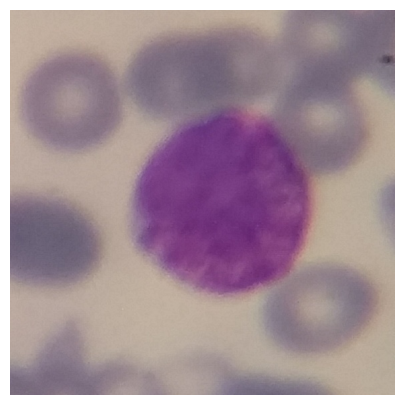

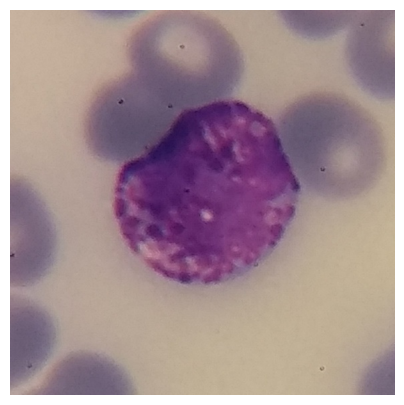

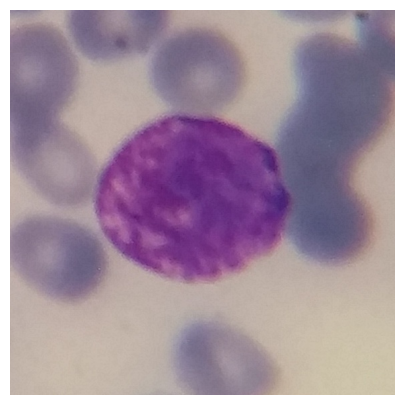

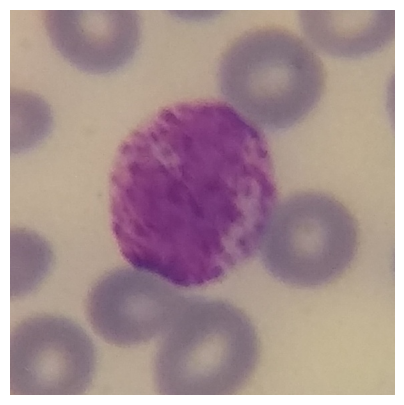

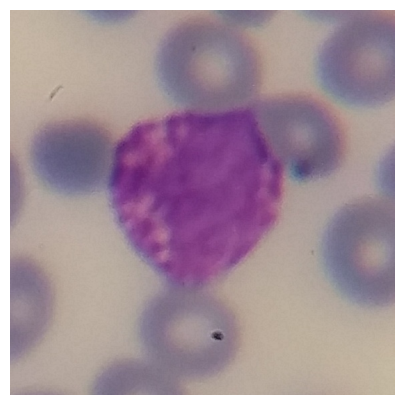

In [27]:
from pathlib import Path
from tqdm import tqdm
from fastai.vision.all import *
import torch
from sklearn.metrics import accuracy_score

# Path to your test images folder
test_folder = Path('/content/white_blood_cells/Test')  # Replace with your actual test folder

# Get all image files in the test folder (including subfolders for each class)
test_images = list(test_folder.glob('**/*.jpg'))  # Adjust the extension if necessary

# Initialize lists to store results
results = []
predictions = []
true_labels = []

# Run predictions on each image in the test folder with a progress bar
for img_path in tqdm(test_images, desc="Predicting", unit="image"):
    img = PILImage.create(img_path)  # Load the image
    pred_class, pred_idx, probs = model.predict(img)  # Predict the class and probabilities
    results.append((img_path.name, pred_class, probs[pred_idx].item()))  # Save the filename, predicted class, and confidence

    # Collect predictions and true labels for accuracy calculation
    predictions.append(pred_class)
    true_labels.append(img_path.parent.name)  # True label is the name of the parent folder

# Print results for each image
print("\nPrediction Results:")
for result in results:
    print(f"Image: {result[0]}, Predicted: {result[1]}, Confidence: {result[2]:.4f}")

# Calculate accuracy by comparing predicted labels with true labels (folder names)
accuracy = accuracy_score(true_labels, predictions)
print(f'\nAccuracy: {accuracy * 100:.2f}%')

# Show the first 5 predictions and their corresponding images
print("\nFirst 5 Predictions and Actual Labels:")
for i in range(min(5, len(results))):  # Show up to 5 images
    img_name, predicted_label, confidence = results[i]
    actual_label = true_labels[i]  # True label is collected from the parent folder
    print(f"Image: {img_name}, Predicted: {predicted_label}, Actual: {actual_label}, Confidence: {confidence:.4f}")

    # Show the image
    img_path = test_folder / actual_label / img_name  # Correctly form the full path
    img = PILImage.create(img_path)
    img.show()



5 Random Predictions and Actual Labels:
Image: 1573.jpg, Predicted: Basophil, Actual: Neutrophil, Confidence: 0.9974
Image: 845.jpg, Predicted: Neutrophil, Actual: Neutrophil, Confidence: 0.9755
Image: 3115.jpg, Predicted: Lymphocyte, Actual: Neutrophil, Confidence: 0.5087
Image: 1848.jpg, Predicted: Neutrophil, Actual: Neutrophil, Confidence: 0.9991
Image: 1981.jpg, Predicted: Neutrophil, Actual: Neutrophil, Confidence: 1.0000


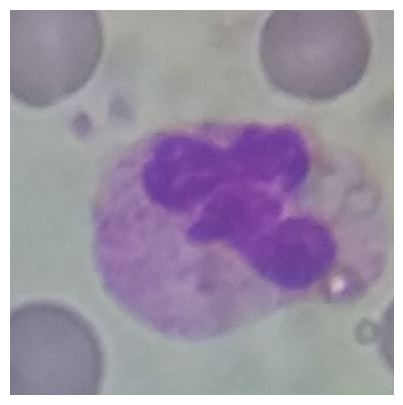

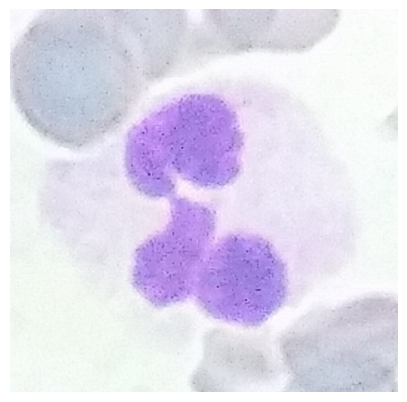

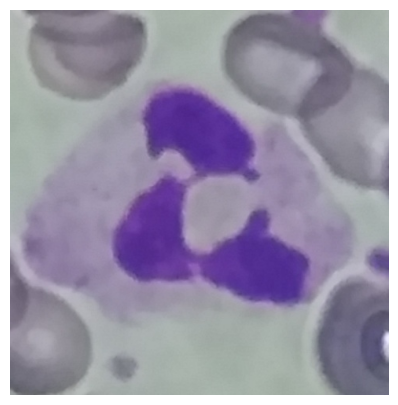

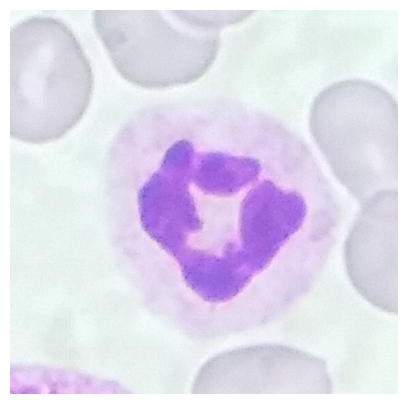

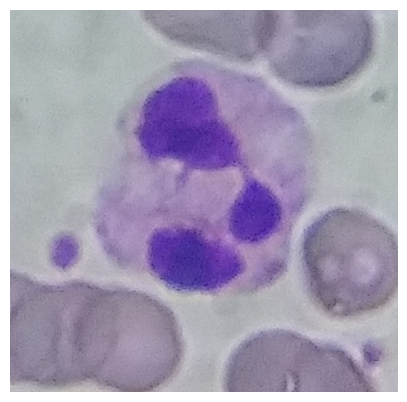

In [28]:
# Show 5 random predictions and their corresponding images
print("\n5 Random Predictions and Actual Labels:")
random_indices = random.sample(range(len(results)), 5)  # Select 5 random indices

for i in random_indices:  # Show random images
    img_name, predicted_label, confidence = results[i]
    actual_label = true_labels[i]  # True label is collected from the parent folder
    print(f"Image: {img_name}, Predicted: {predicted_label}, Actual: {actual_label}, Confidence: {confidence:.4f}")

    # Show the image
    img_path = test_folder / actual_label / img_name  # Correctly form the full path
    img = PILImage.create(img_path)
    img.show()